# Problem Statement

## Business Understanding

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

## Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Business Risk

* Predicting a higher sale price for a house would not attact the customers which would lead to a loss to the company
* Predicting a lower sale price for a house would lead to reduces profit margin for the company

## Requirement:

* Which variable are significant in predicting the sale price of the house?
* How well those variabe describe the sale price of the house?

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

import statsmodels.api as sm  

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
housing = pd.read_csv("train.csv")

## Data Understanding

In [3]:
#Lets look at the total number of rows and columns
housing.shape

(1460, 81)

In [4]:
#Lets look if the dataset has any null values
#Also lets have a look at the data type of the columns
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Lets get some more information about the dataset using describe() methods
#We can see the count, mean, standard deviation, min, max and different quantile of the int and float columns
housing.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

## Data Cleaning
There are various types of quality issues when it comes to data, and that’s why data cleaning is one of the
most time-consuming steps of data analysis.

In [6]:
#Lets go through each column and understand the dtype and number of null values
for col in housing.columns:
    if housing[col].isnull().mean()*100 > 0:
        print("Name : ",col)
        print("Type : ",housing[col].dtype)
        print("Number of null values : ",round(housing[col].isnull().mean()*100,2),"%")
        print("-----------------------------------------------")

Name :  LotFrontage
Type :  float64
Number of null values :  17.74 %
-----------------------------------------------
Name :  Alley
Type :  object
Number of null values :  93.77 %
-----------------------------------------------
Name :  MasVnrType
Type :  object
Number of null values :  0.55 %
-----------------------------------------------
Name :  MasVnrArea
Type :  float64
Number of null values :  0.55 %
-----------------------------------------------
Name :  BsmtQual
Type :  object
Number of null values :  2.53 %
-----------------------------------------------
Name :  BsmtCond
Type :  object
Number of null values :  2.53 %
-----------------------------------------------
Name :  BsmtExposure
Type :  object
Number of null values :  2.6 %
-----------------------------------------------
Name :  BsmtFinType1
Type :  object
Number of null values :  2.53 %
-----------------------------------------------
Name :  BsmtFinType2
Type :  object
Number of null values :  2.6 %
----------------------

Using the data dictionary we can see that the NA for certain columns does not mean missing data and has some significance

lets replace the NA with the proper values

In [7]:
housing.Alley = housing.Alley.fillna("No Alley")

In [8]:
housing.BsmtQual = housing.BsmtQual.fillna("No Basement")

In [9]:
housing.BsmtCond = housing.BsmtCond.fillna("No Basement")

In [10]:
housing.BsmtExposure = housing.BsmtExposure.fillna("No Basement")

In [11]:
housing.BsmtFinType1 = housing.BsmtFinType1.fillna("No Basement")

In [12]:
housing.BsmtFinType2 = housing.BsmtFinType2.fillna("No Basement")

In [13]:
housing.FireplaceQu = housing.FireplaceQu.fillna("No Fireplace")

In [14]:
housing.GarageType = housing.GarageType.fillna("No Garage")

In [15]:
housing.GarageFinish = housing.GarageFinish.fillna("No Garage")

In [16]:
housing.GarageQual = housing.GarageQual.fillna("No Garage")

In [17]:
housing.GarageCond = housing.GarageCond.fillna("No Garage")

In [18]:
housing.GarageYrBlt = housing.GarageYrBlt.fillna(0)

In [19]:
housing.PoolQC = housing.PoolQC.fillna("No Pool")

In [20]:
housing.Fence = housing.Fence.fillna("No Fence")

In [21]:
housing.MiscFeature = housing.MiscFeature.fillna("None")

In [22]:
#Lets go through each column and understand the dtype and number of null values left
for col in housing.columns:
    if housing[col].isnull().mean()*100 > 0:
        print("Name : ",col)
        print("Type : ",housing[col].dtype)
        print("Number of null values : ",round(housing[col].isnull().mean()*100,2),"%")
        print(housing[col].value_counts().head())
        print("-----------------------------------------------")

Name :  LotFrontage
Type :  float64
Number of null values :  17.74 %
60.0    143
70.0     70
80.0     69
50.0     57
75.0     53
Name: LotFrontage, dtype: int64
-----------------------------------------------
Name :  MasVnrType
Type :  object
Number of null values :  0.55 %
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
-----------------------------------------------
Name :  MasVnrArea
Type :  float64
Number of null values :  0.55 %
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
Name: MasVnrArea, dtype: int64
-----------------------------------------------
Name :  Electrical
Type :  object
Number of null values :  0.07 %
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
-----------------------------------------------


Lets impute the above columns with median and mode

In [23]:
housing.LotFrontage = housing.LotFrontage.fillna(housing.LotFrontage.median())
housing.MasVnrType = housing.MasVnrType.fillna(housing.Electrical.mode()[0])
housing.MasVnrArea = housing.MasVnrArea.fillna(housing.MasVnrArea.median())
housing.Electrical = housing.Electrical.fillna(housing.Electrical.mode()[0])

lets confirm if thier are any NA values now

In [24]:
housing.isna().sum().sum()

0

In [25]:
#lets look at the dtypes for the columns
for col in housing.columns:
    print(col,"-------->",housing[col].dtype)

Id --------> int64
MSSubClass --------> int64
MSZoning --------> object
LotFrontage --------> float64
LotArea --------> int64
Street --------> object
Alley --------> object
LotShape --------> object
LandContour --------> object
Utilities --------> object
LotConfig --------> object
LandSlope --------> object
Neighborhood --------> object
Condition1 --------> object
Condition2 --------> object
BldgType --------> object
HouseStyle --------> object
OverallQual --------> int64
OverallCond --------> int64
YearBuilt --------> int64
YearRemodAdd --------> int64
RoofStyle --------> object
RoofMatl --------> object
Exterior1st --------> object
Exterior2nd --------> object
MasVnrType --------> object
MasVnrArea --------> float64
ExterQual --------> object
ExterCond --------> object
Foundation --------> object
BsmtQual --------> object
BsmtCond --------> object
BsmtExposure --------> object
BsmtFinType1 --------> object
BsmtFinSF1 --------> int64
BsmtFinType2 --------> object
BsmtFinSF2 --------> 

In [26]:
#Also the Id columns is not useful for the analysis and prediction of the target variable
#Hence dropping Id
print(len(housing.Id.unique()))
housing.drop("Id",axis=1,inplace=True)

1460


In [27]:
#lets check if we can convert the float columns to integers
for col in housing.columns:
    if housing[col].dtype == np.float64:
        print("Name : ",col)
        print("Type : ",housing[col].dtype)
        print(housing[col].value_counts().head())
        print("-----------------------------------------------")

Name :  LotFrontage
Type :  float64
69.0    270
60.0    143
70.0     70
80.0     69
50.0     57
Name: LotFrontage, dtype: int64
-----------------------------------------------
Name :  MasVnrArea
Type :  float64
0.0      869
180.0      8
72.0       8
108.0      8
120.0      7
Name: MasVnrArea, dtype: int64
-----------------------------------------------
Name :  GarageYrBlt
Type :  float64
0.0       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
Name: GarageYrBlt, dtype: int64
-----------------------------------------------


In [28]:
#Converting the column to integer
housing.LotFrontage = housing.LotFrontage.apply(lambda x: int(x))
housing.LotFrontage.value_counts().head()

69    270
60    143
70     70
80     69
50     57
Name: LotFrontage, dtype: int64

In [29]:
#Converting the column to integer
housing.MasVnrArea = housing.MasVnrArea.apply(lambda x: int(x))
housing.MasVnrArea.value_counts().head()

0      869
180      8
72       8
108      8
120      7
Name: MasVnrArea, dtype: int64

In [30]:
#Converting the column to integer
housing.GarageYrBlt = housing.GarageYrBlt.apply(lambda x: int(x))
housing.GarageYrBlt.value_counts().head()

0       81
2005    65
2006    59
2004    53
2003    50
Name: GarageYrBlt, dtype: int64

We can see YearBuilt and YearRemodAdd columns can be converted to age of the building and age of remodeling

In [31]:
housing["AgeBuilt"] = housing.YrSold - housing.YearBuilt

In [32]:
housing["AgeRemod"] = housing.YrSold - housing.YearRemodAdd

In [33]:
#lets drop the original columns
housing.drop("YearBuilt",axis=1,inplace=True)
housing.drop("YearRemodAdd",axis=1,inplace=True)

In [34]:
#lets drop the columns which have more than 90% same data
for col in housing.columns:
    if (housing[col].value_counts().values[0]/len(housing[col]))*100 > 90 :
        print("Droping ",col)
        housing.drop(col,axis=1,inplace=True)

Droping  Street
Droping  Alley
Droping  Utilities
Droping  LandSlope
Droping  Condition2
Droping  RoofMatl
Droping  Heating
Droping  CentralAir
Droping  Electrical
Droping  LowQualFinSF
Droping  BsmtHalfBath
Droping  KitchenAbvGr
Droping  Functional
Droping  GarageCond
Droping  PavedDrive
Droping  3SsnPorch
Droping  ScreenPorch
Droping  PoolArea
Droping  PoolQC
Droping  MiscFeature
Droping  MiscVal


In [35]:
#Lets have look at the string columns for any conversion
for col in housing.columns:
    if housing[col].dtype == object:
        print("Name : ",col)
        print("Type : ",housing[col].dtype)
        print("Unique Count :",housing[col].value_counts().count())
        print(housing[col].value_counts().head())
        print("-----------------------------------------------")

Name :  MSZoning
Type :  object
Unique Count : 5
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
-----------------------------------------------
Name :  LotShape
Type :  object
Unique Count : 4
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
-----------------------------------------------
Name :  LandContour
Type :  object
Unique Count : 4
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
-----------------------------------------------
Name :  LotConfig
Type :  object
Unique Count : 5
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
-----------------------------------------------
Name :  Neighborhood
Type :  object
Unique Count : 25
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Name: Neighborhood, dtype: int64
-----------------------------------------------
Name :  Condition1
Type : 

## Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [36]:
#lets get the continuous variables from the list
for col in housing.columns:
    if housing[col].nunique() > 35 and (housing[col].dtype == np.int64 or housing[col].dtype == np.float64):
        print('"',col,'"',end=",",sep="")
        #print("Name :",col,"- >", df[col].nunique(),"- >", df[col].dtype)

"LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","GarageYrBlt","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","SalePrice","AgeBuilt","AgeRemod",

In [37]:
#lets get the categorical variables from the list
for col in housing.columns:
    if housing[col].nunique() <= 35 :
        print('"',col,'"',end=",",sep="")
        #print("Name :",col,"- >", df[col].nunique())

"MSSubClass","MSZoning","LotShape","LandContour","LotConfig","Neighborhood","Condition1","BldgType","HouseStyle","OverallQual","OverallCond","RoofStyle","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","HeatingQC","BsmtFullBath","FullBath","HalfBath","BedroomAbvGr","KitchenQual","TotRmsAbvGrd","Fireplaces","FireplaceQu","GarageType","GarageFinish","GarageCars","GarageQual","Fence","MoSold","YrSold","SaleType","SaleCondition",

In [38]:
#lets get the ones missied out in both
for col in housing.columns:
    if housing[col].nunique() > 35 and housing[col].nunique()!=housing.shape[0] and (housing[col].dtype == object):
        print('"',col,'"',end=",",sep="")
        #print("Name :",col,"- >", df[col].nunique(),"- >", df[col].dtype)

In [39]:
cont_cols = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","GarageYrBlt","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","SalePrice","AgeBuilt","AgeRemod"]
cat_cols = ["MSSubClass","MSZoning","LotShape","LandContour","LotConfig","Neighborhood","Condition1","BldgType","HouseStyle","OverallQual","OverallCond","RoofStyle","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","HeatingQC","BsmtFullBath","FullBath","HalfBath","BedroomAbvGr","KitchenQual","TotRmsAbvGrd","Fireplaces","FireplaceQu","GarageType","GarageFinish","GarageCars","GarageQual","Fence","MoSold","YrSold","SaleType","SaleCondition"]

In [40]:
len(housing.columns)

59

In [41]:
len(cat_cols)

41

In [42]:
len(cont_cols)

18

In [43]:
#lets see the categorical columns
for col in cat_cols:
    print("Name : ",col)
    print("Unique Count :",housing[col].value_counts().count())
    print(housing[col].value_counts().head())
    print("------------------------------------------------")

Name :  MSSubClass
Unique Count : 15
20     536
60     299
50     144
120     87
30      69
Name: MSSubClass, dtype: int64
------------------------------------------------
Name :  MSZoning
Unique Count : 5
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
------------------------------------------------
Name :  LotShape
Unique Count : 4
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
------------------------------------------------
Name :  LandContour
Unique Count : 4
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
------------------------------------------------
Name :  LotConfig
Unique Count : 5
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
------------------------------------------------
Name :  Neighborhood
Unique Count : 25
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Name: 

In [44]:
#lets look at the Continuous columns
for col in cont_cols:
    print("Name : ",col)
    print("Unique Count :",housing[col].value_counts().count())
    print(housing[col].value_counts().head())
    print("------------------------------------------------")

Name :  LotFrontage
Unique Count : 110
69    270
60    143
70     70
80     69
50     57
Name: LotFrontage, dtype: int64
------------------------------------------------
Name :  LotArea
Unique Count : 1073
7200    25
9600    24
6000    17
9000    14
8400    14
Name: LotArea, dtype: int64
------------------------------------------------
Name :  MasVnrArea
Unique Count : 327
0      869
180      8
72       8
108      8
120      7
Name: MasVnrArea, dtype: int64
------------------------------------------------
Name :  BsmtFinSF1
Unique Count : 637
0      467
24      12
16       9
686      5
662      5
Name: BsmtFinSF1, dtype: int64
------------------------------------------------
Name :  BsmtFinSF2
Unique Count : 144
0      1293
180       5
374       3
551       2
147       2
Name: BsmtFinSF2, dtype: int64
------------------------------------------------
Name :  BsmtUnfSF
Unique Count : 780
0      118
728      9
384      8
600      7
300      7
Name: BsmtUnfSF, dtype: int64
----------------

## Univariate Analysis

In [45]:
def plot_box_and_dist(df,col):
    sns.set_theme(color_codes=True)
    plt.figure(figsize=(30,10))
    plt.subplot(1,2,1)
    sns.boxplot(df[col])
    plt.title("Boxplot for "+col)
    plt.subplot(1,2,2)
    sns.distplot(df[col])#distribution plot
    plt.title("Density Histogram for "+col)
    plt.show()
    print(df[col].describe())#Data metrics for the column selected
    print()
    print("******************************************************************************************")

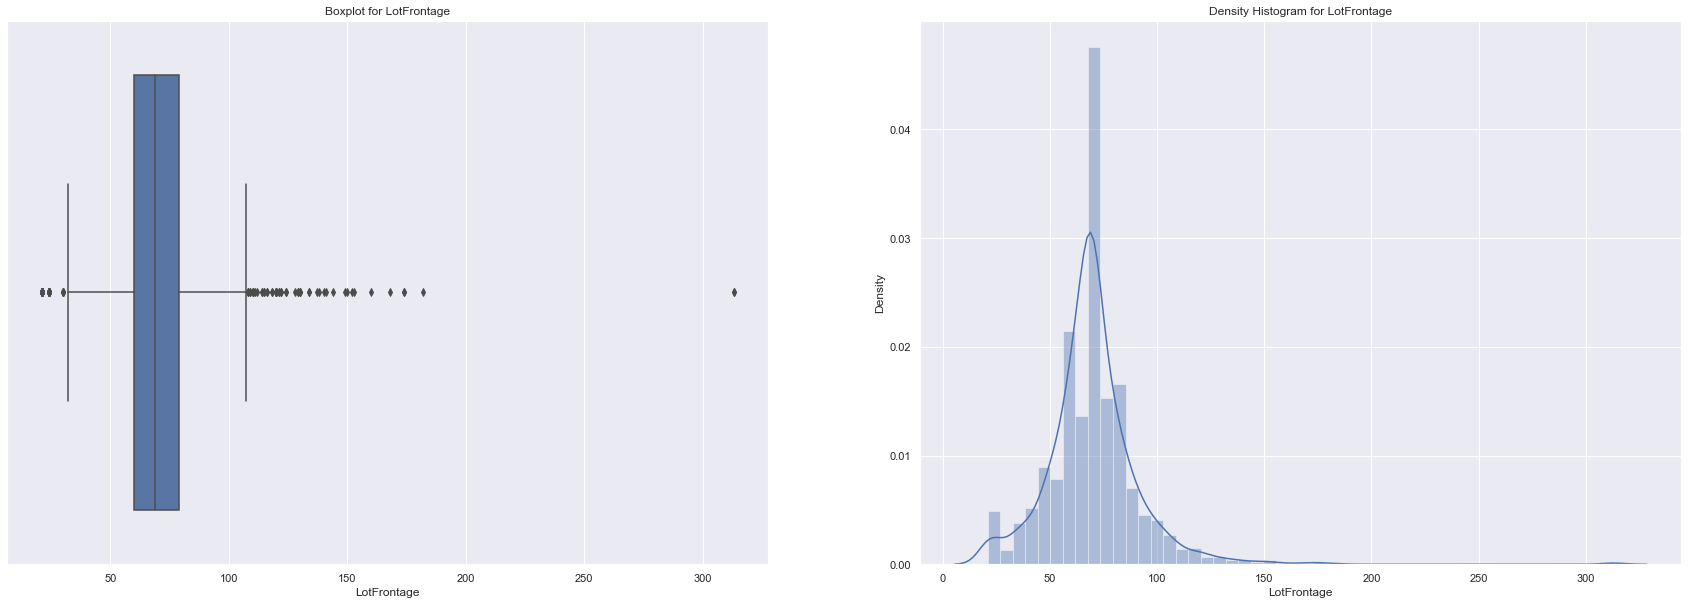

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

******************************************************************************************


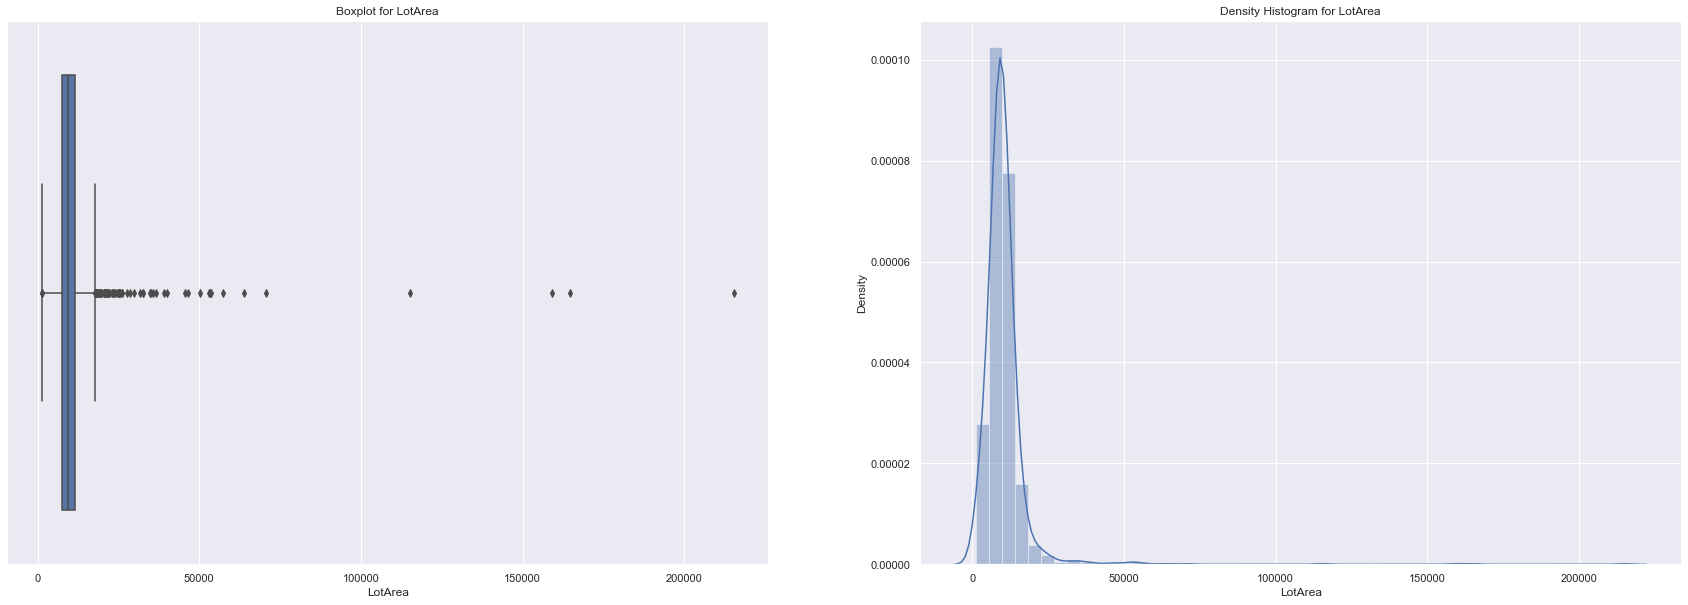

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

******************************************************************************************


count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

******************************************************************************************


count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

******************************************************************************************


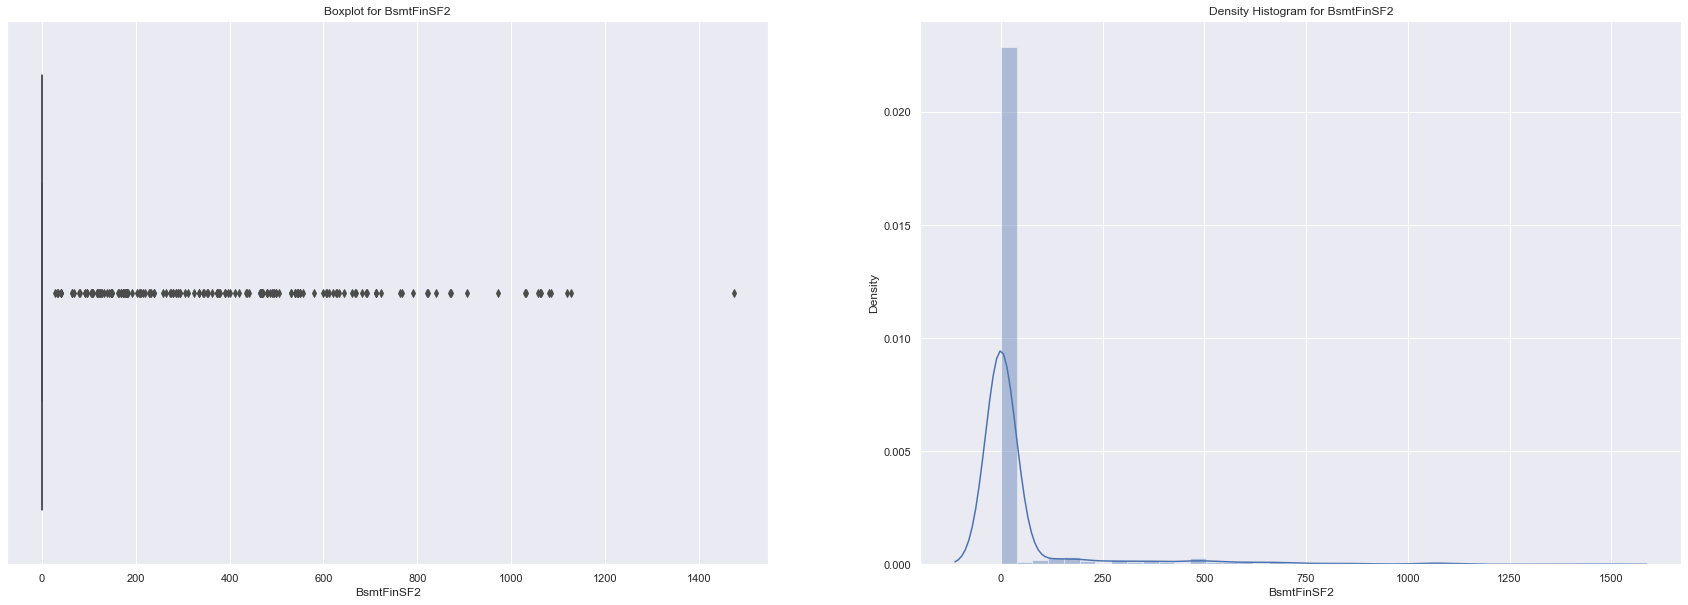

count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

******************************************************************************************


count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

******************************************************************************************


count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

******************************************************************************************


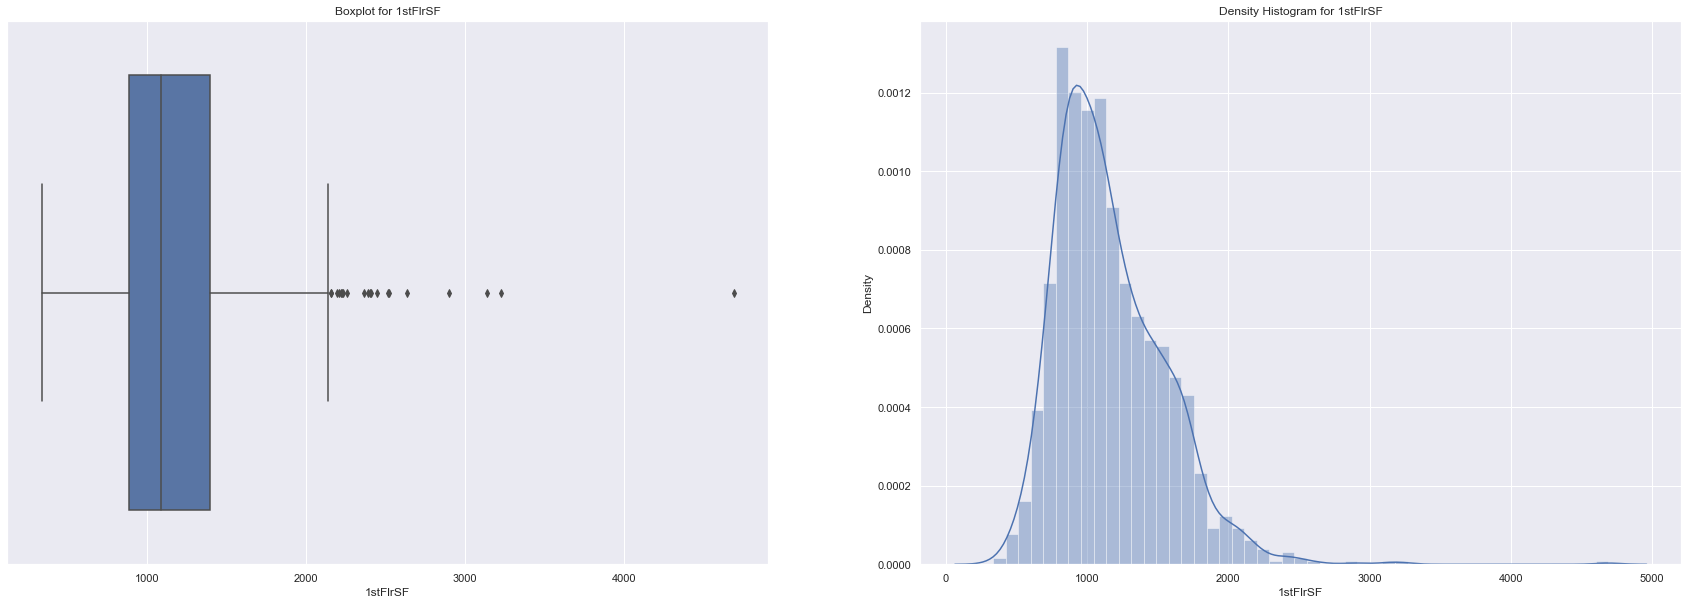

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

******************************************************************************************


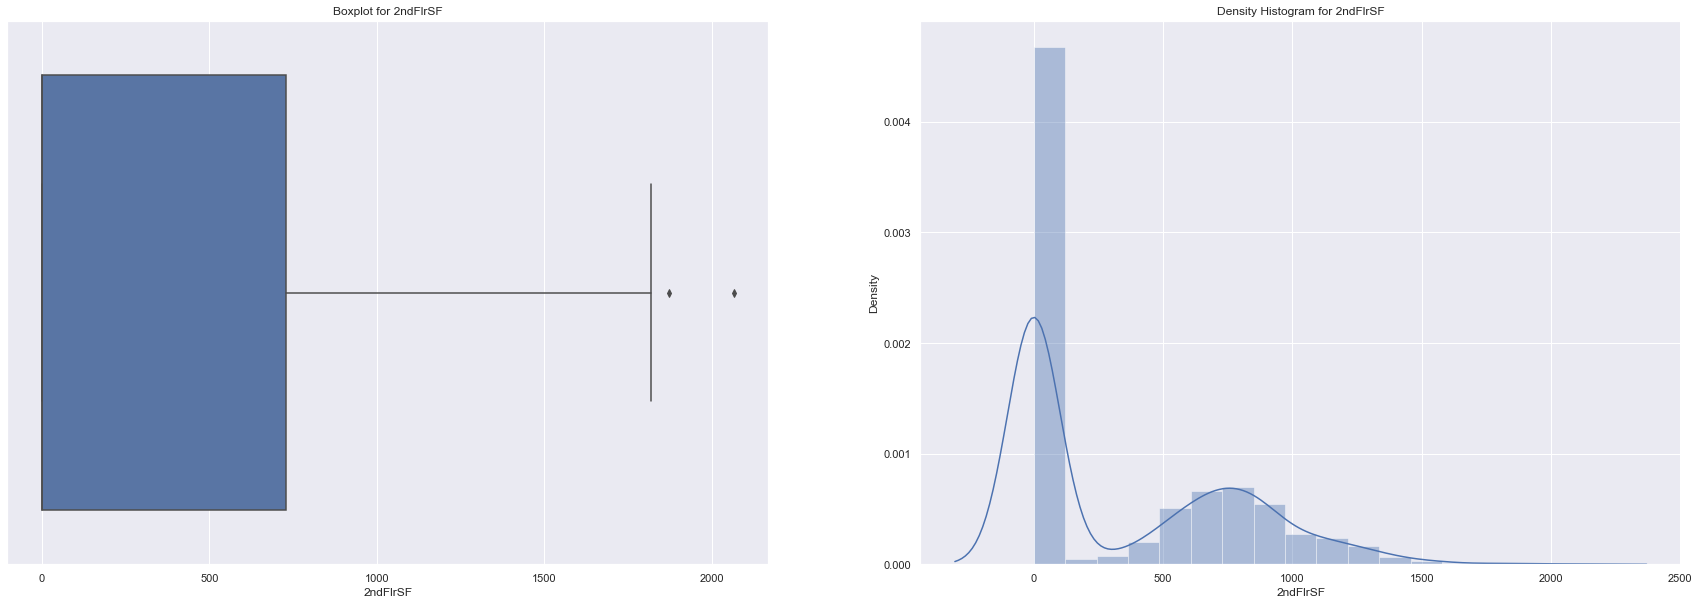

count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

******************************************************************************************


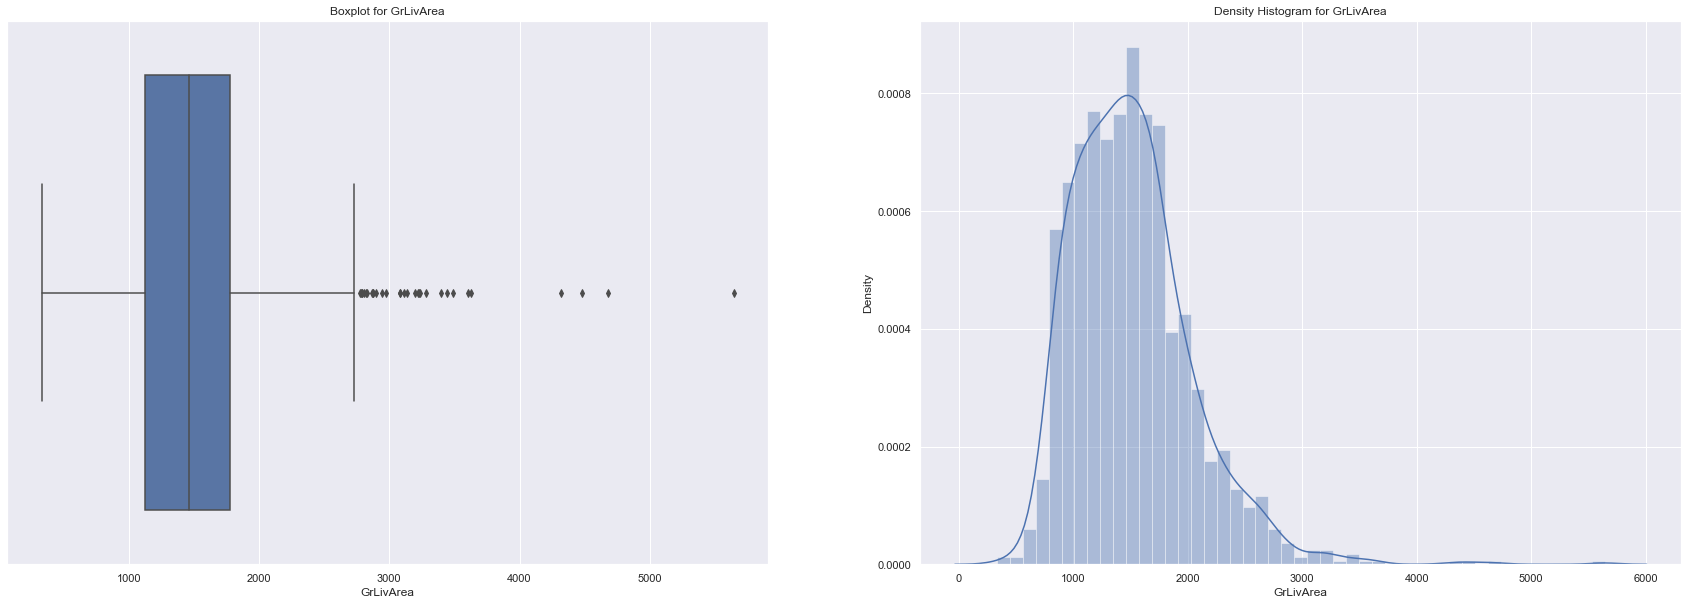

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

******************************************************************************************


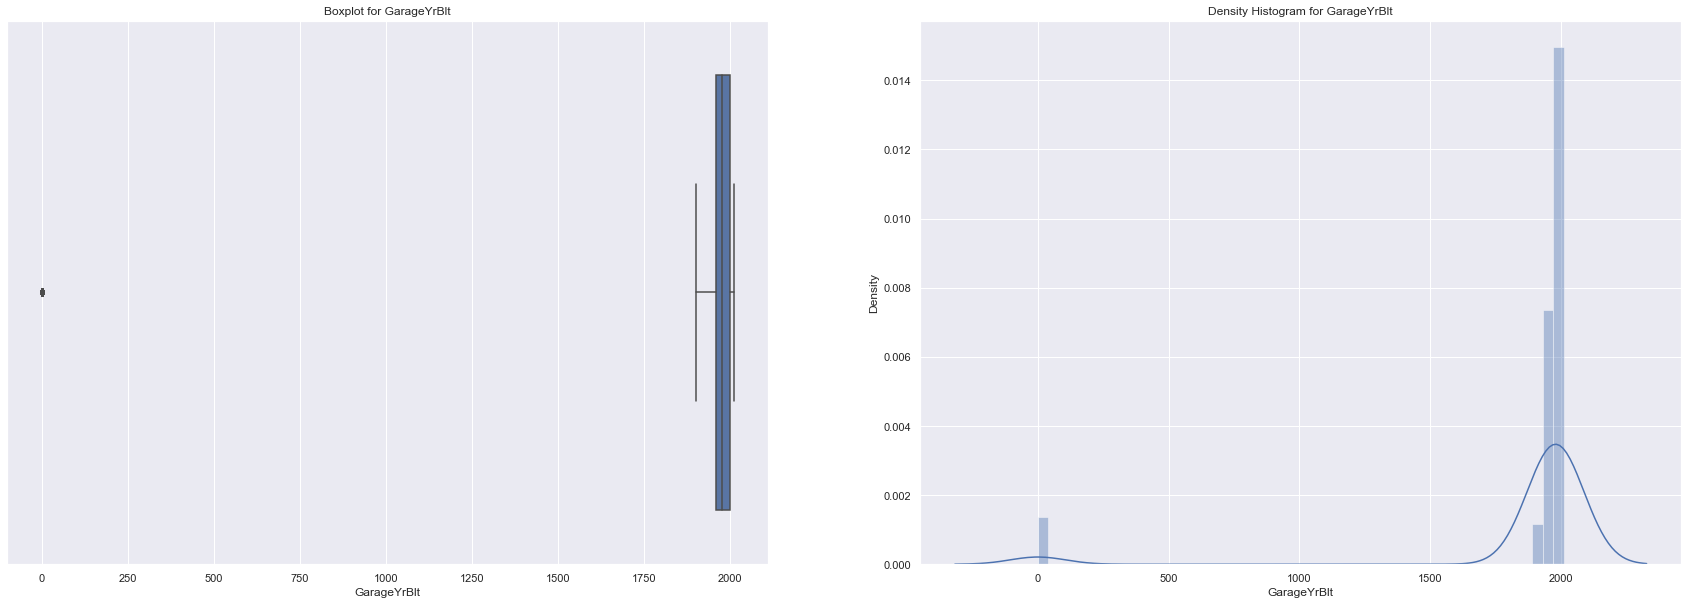

count    1460.000000
mean     1868.739726
std       453.697295
min         0.000000
25%      1958.000000
50%      1977.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

******************************************************************************************


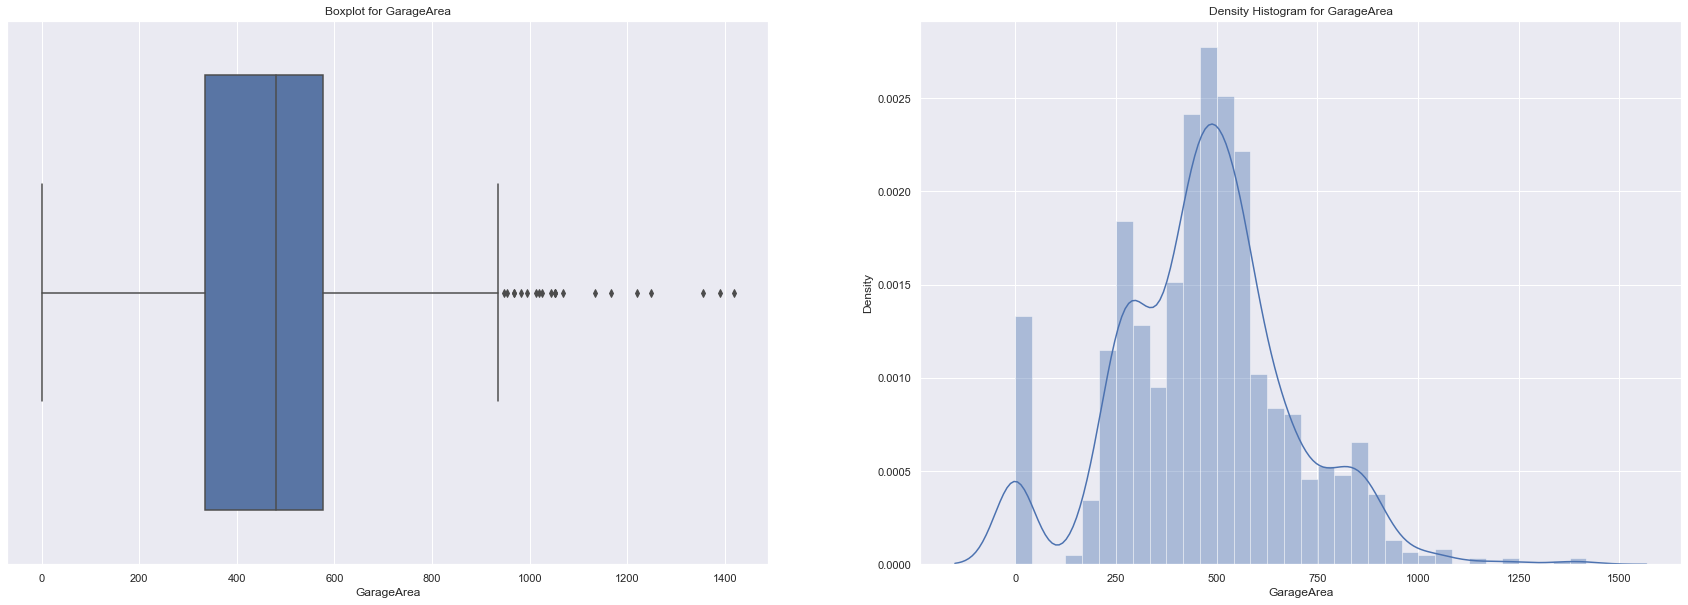

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

******************************************************************************************


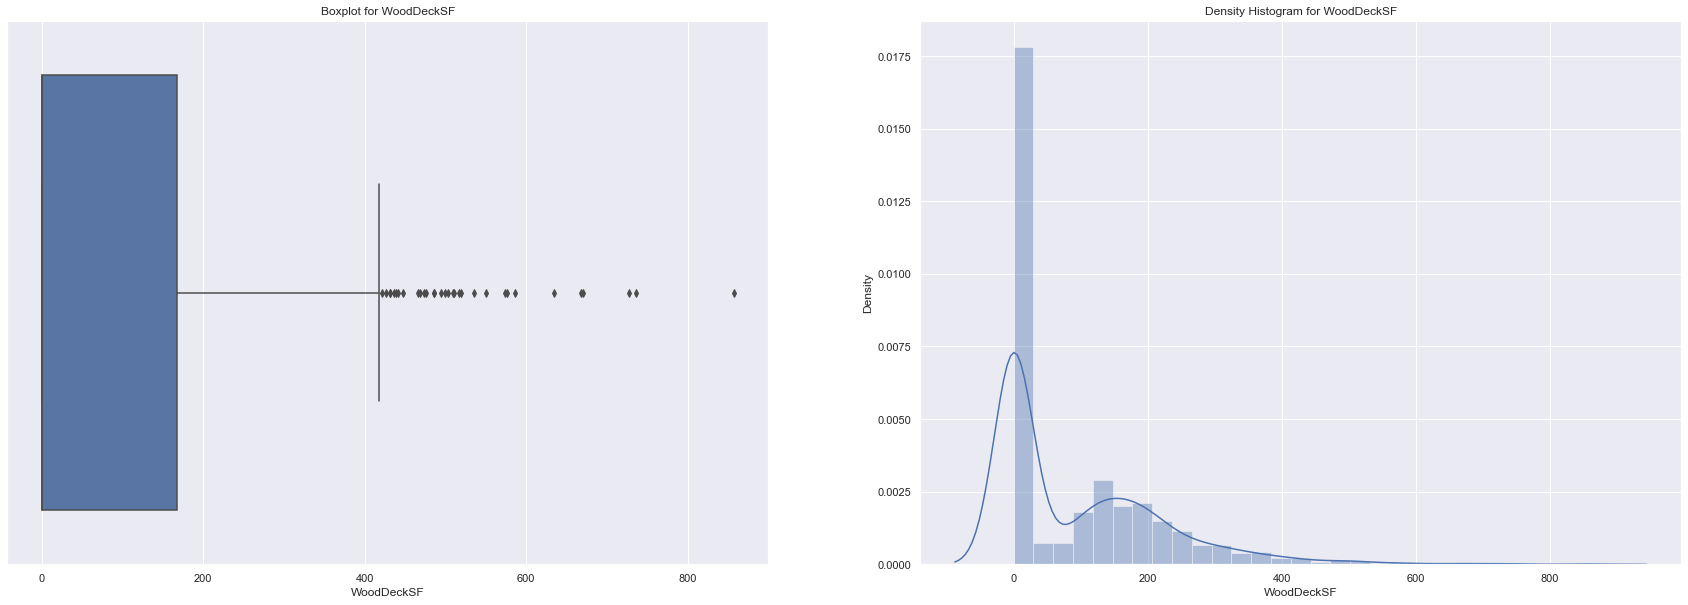

count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64

******************************************************************************************


count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64

******************************************************************************************


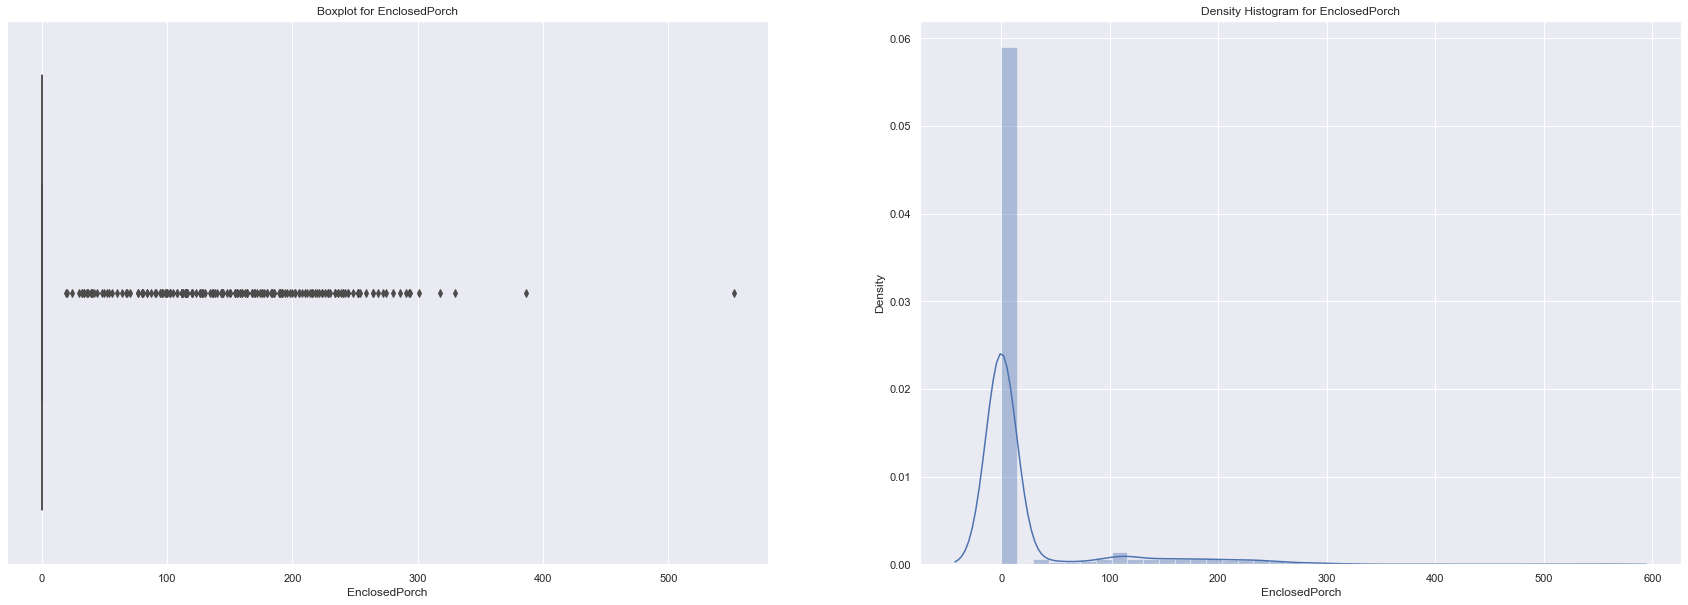

count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64

******************************************************************************************


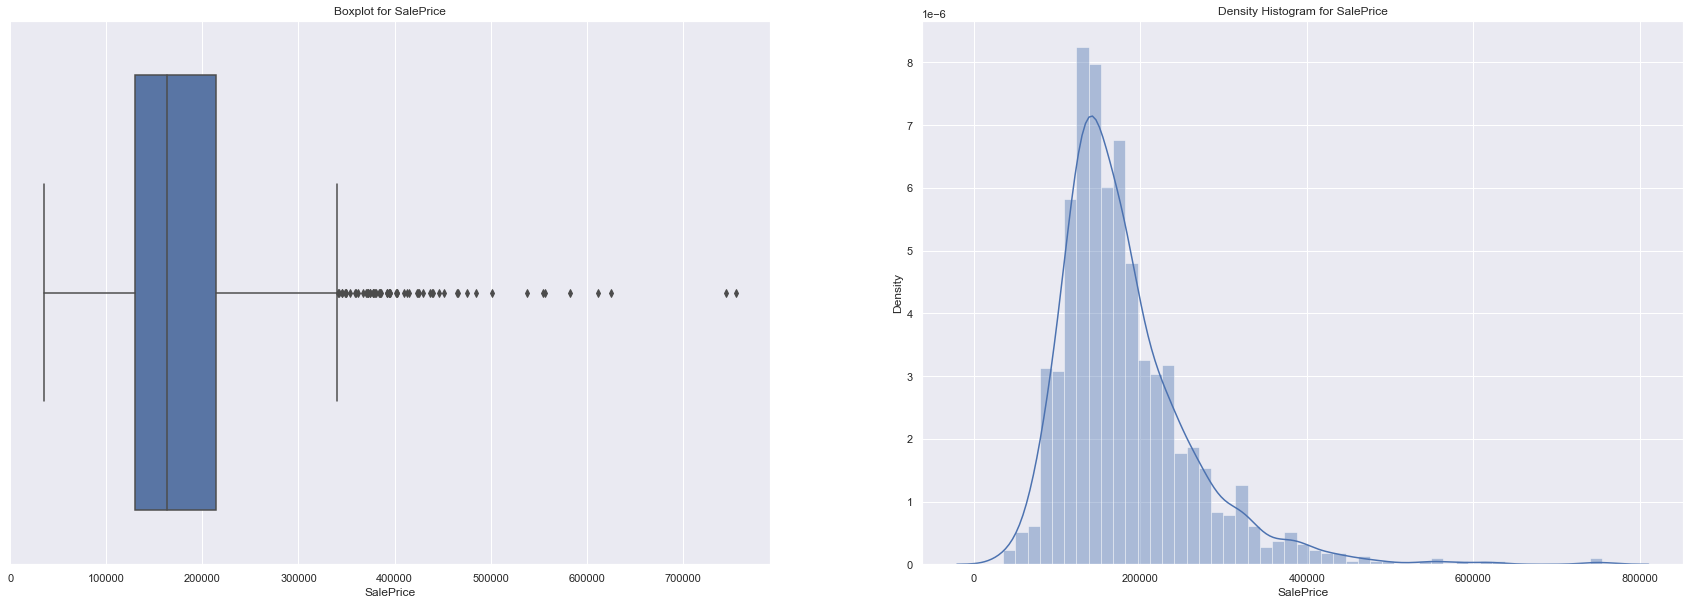

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

******************************************************************************************


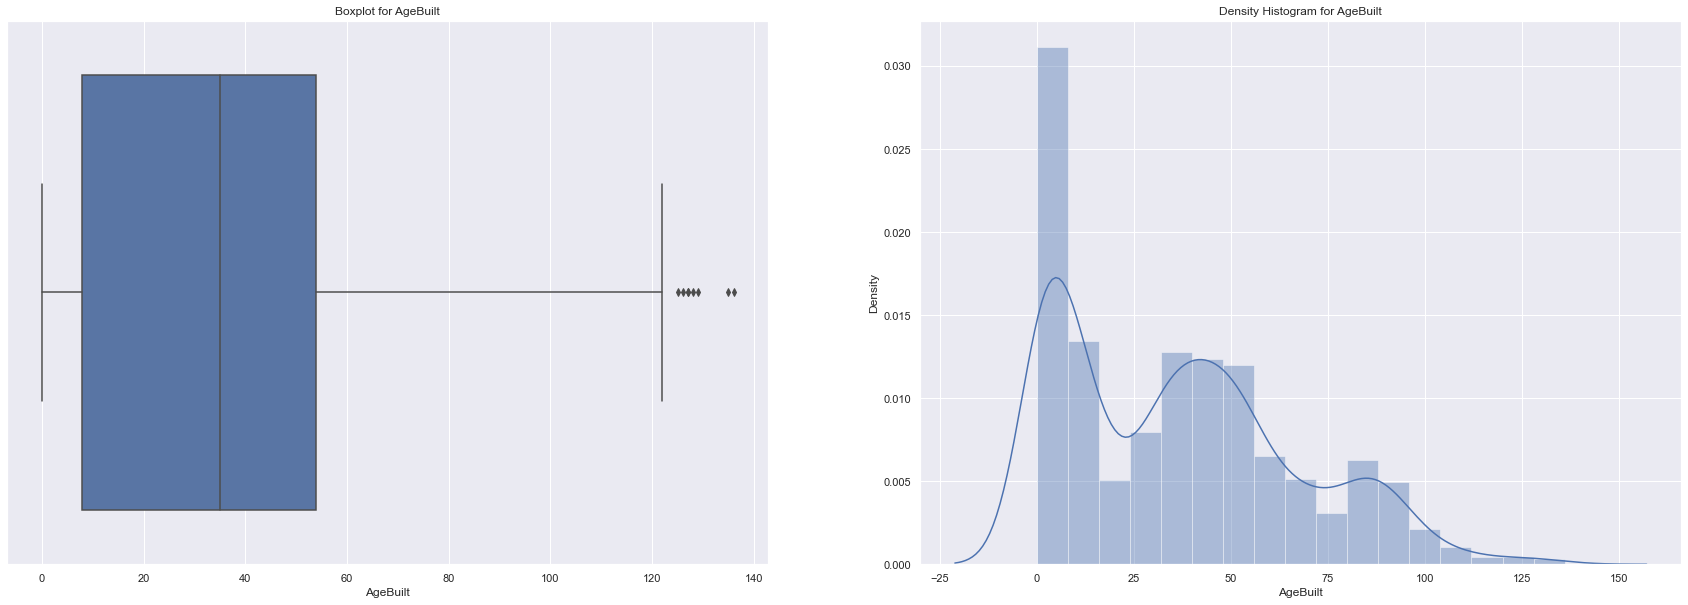

count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: AgeBuilt, dtype: float64

******************************************************************************************


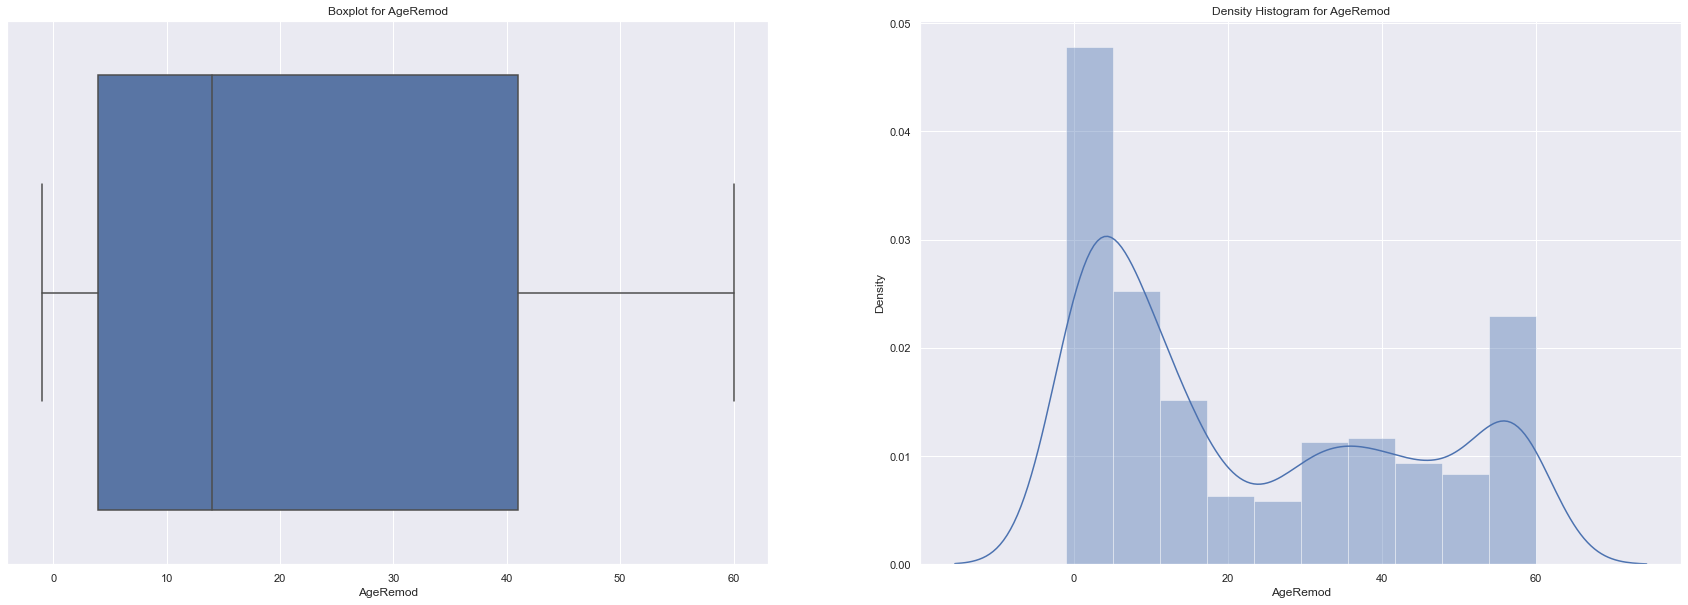

count    1460.000000
mean       22.950000
std        20.640653
min        -1.000000
25%         4.000000
50%        14.000000
75%        41.000000
max        60.000000
Name: AgeRemod, dtype: float64

******************************************************************************************


In [46]:
for col in cont_cols:
    plot_box_and_dist(housing,col)

In [47]:
print("Findings")
#Univariate Analysis on Continuous Variable:
for col in cont_cols:
    print(col,"Mean = ",round(housing[col].mean(),2),"Median = ",housing[col].median())

Findings
LotFrontage Mean =  69.86 Median =  69.0
LotArea Mean =  10516.83 Median =  9478.5
MasVnrArea Mean =  103.12 Median =  0.0
BsmtFinSF1 Mean =  443.64 Median =  383.5
BsmtFinSF2 Mean =  46.55 Median =  0.0
BsmtUnfSF Mean =  567.24 Median =  477.5
TotalBsmtSF Mean =  1057.43 Median =  991.5
1stFlrSF Mean =  1162.63 Median =  1087.0
2ndFlrSF Mean =  346.99 Median =  0.0
GrLivArea Mean =  1515.46 Median =  1464.0
GarageYrBlt Mean =  1868.74 Median =  1977.0
GarageArea Mean =  472.98 Median =  480.0
WoodDeckSF Mean =  94.24 Median =  0.0
OpenPorchSF Mean =  46.66 Median =  25.0
EnclosedPorch Mean =  21.95 Median =  0.0
SalePrice Mean =  180921.2 Median =  163000.0
AgeBuilt Mean =  36.55 Median =  35.0
AgeRemod Mean =  22.95 Median =  14.0


In [48]:
def plot_count(df,col):
    plt.figure(figsize=(15,5))
    sns.countplot(df[col],order=sorted(df[col].unique()))
    plt.title("Countplot for "+col)
    plt.xticks(rotation=90)
    plt.show()
    print(df[col].value_counts())
    print("*****************************************************************************************")

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
*****************************************************************************************


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
*****************************************************************************************


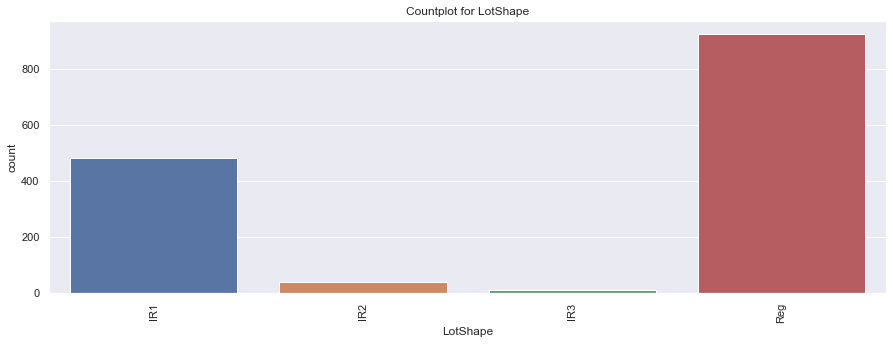

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
*****************************************************************************************


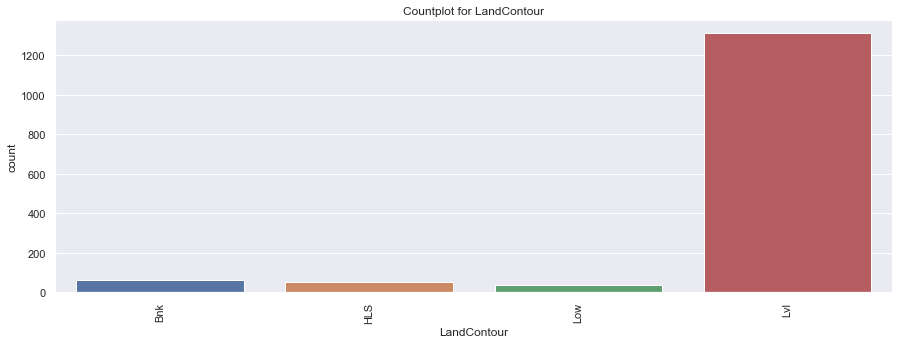

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
*****************************************************************************************


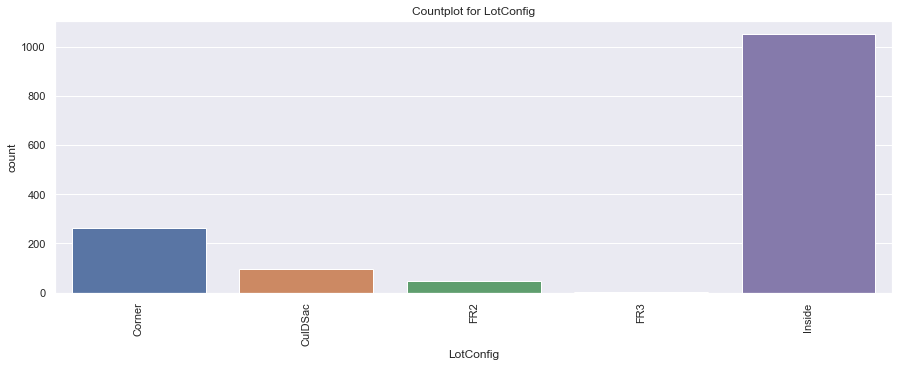

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
*****************************************************************************************


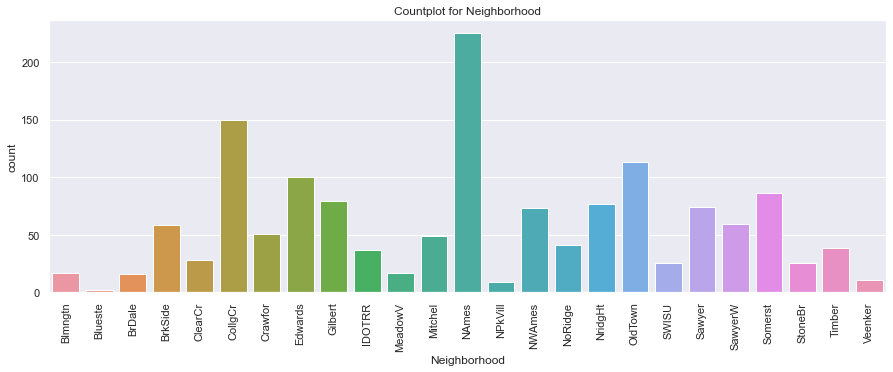

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
*****************************************************************************************


Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
*****************************************************************************************


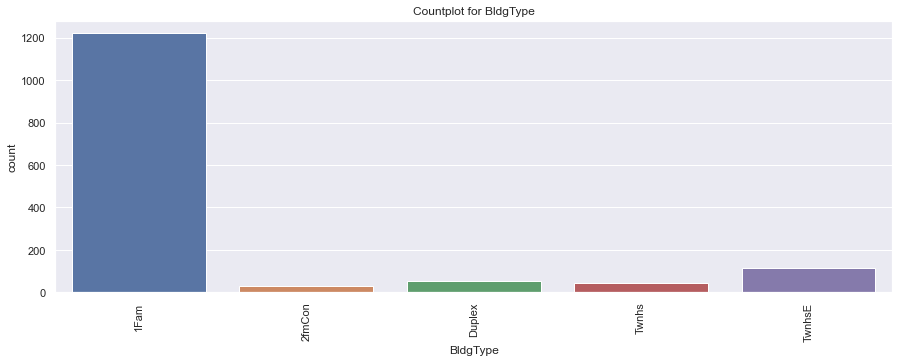

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
*****************************************************************************************


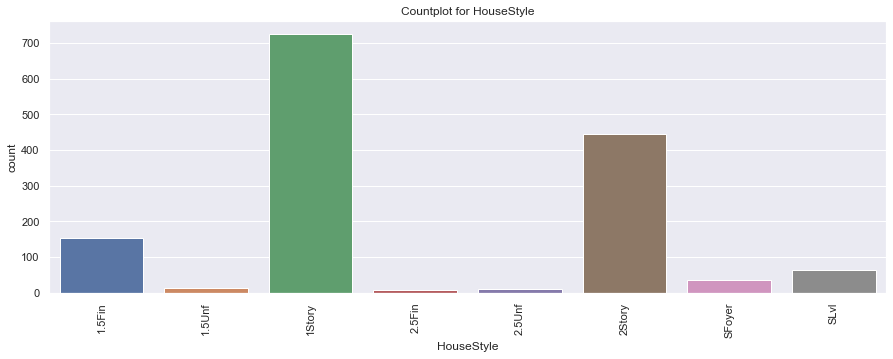

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
*****************************************************************************************


5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
*****************************************************************************************


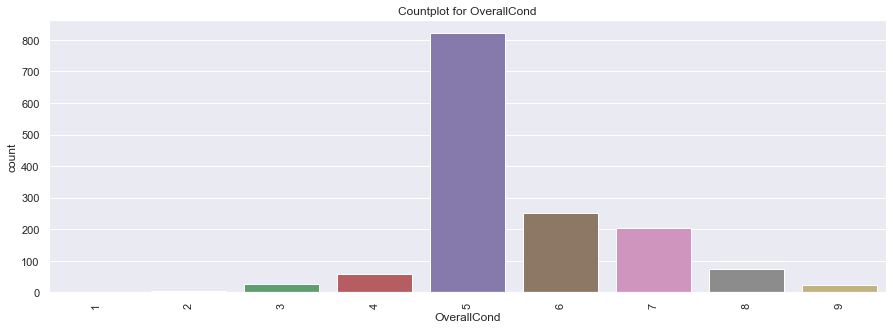

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
*****************************************************************************************


Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
*****************************************************************************************


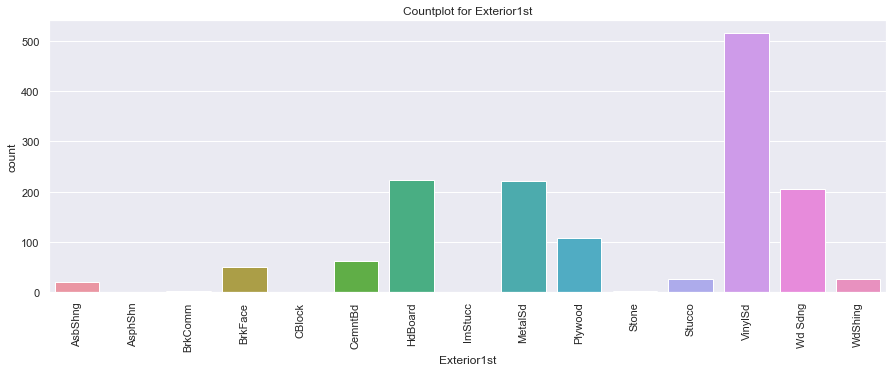

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64
*****************************************************************************************


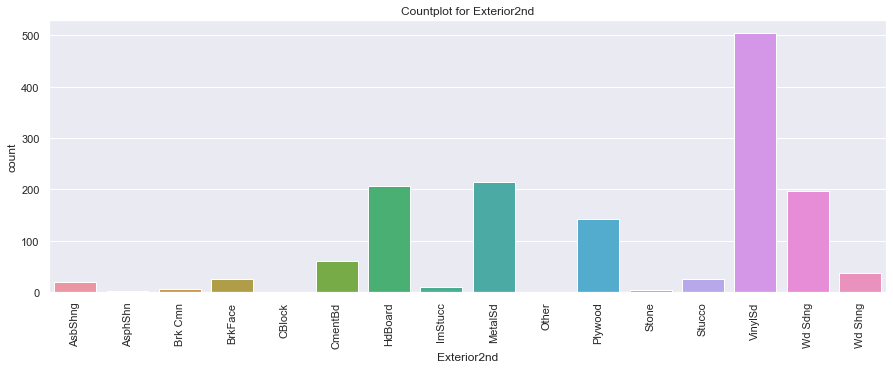

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64
*****************************************************************************************


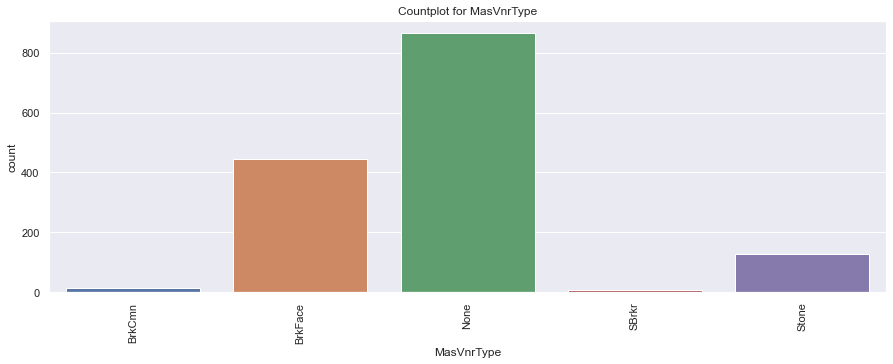

None       864
BrkFace    445
Stone      128
BrkCmn      15
SBrkr        8
Name: MasVnrType, dtype: int64
*****************************************************************************************


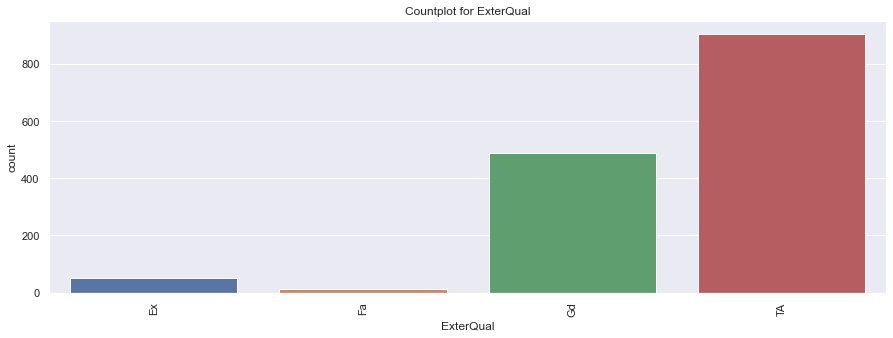

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
*****************************************************************************************


TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
*****************************************************************************************


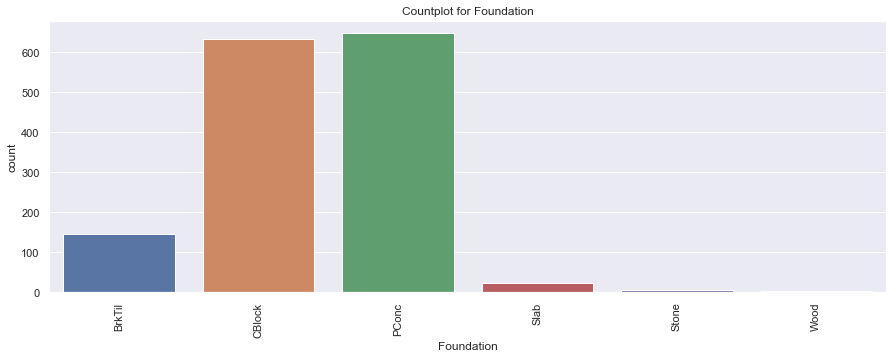

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
*****************************************************************************************


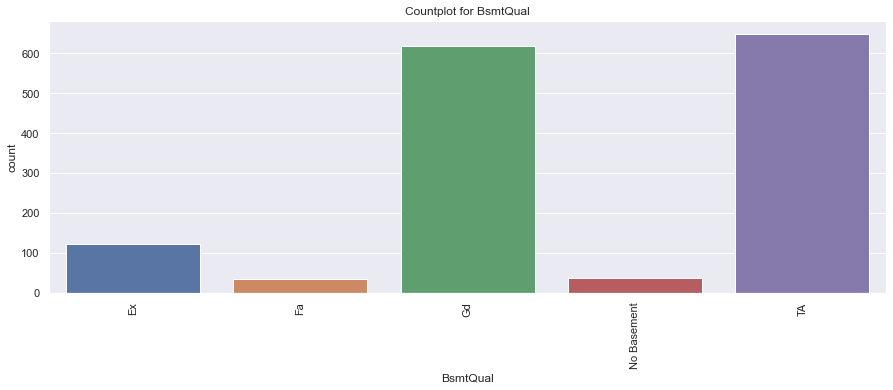

TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64
*****************************************************************************************


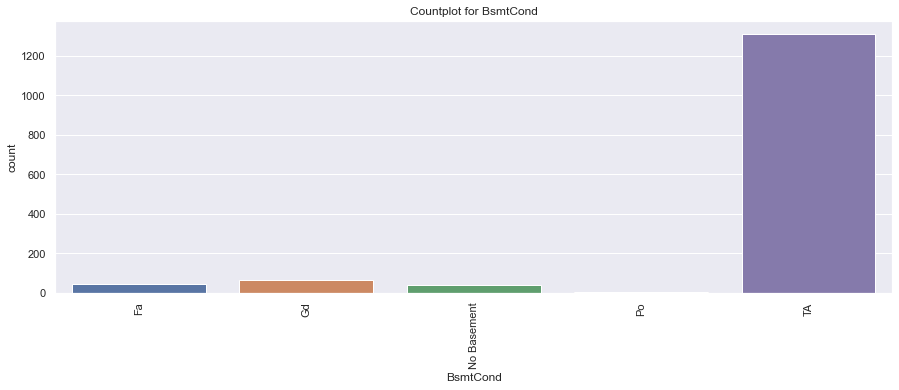

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64
*****************************************************************************************


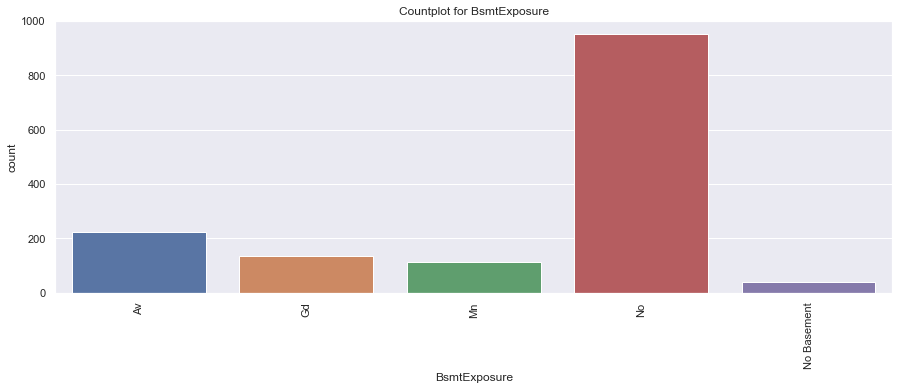

No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64
*****************************************************************************************


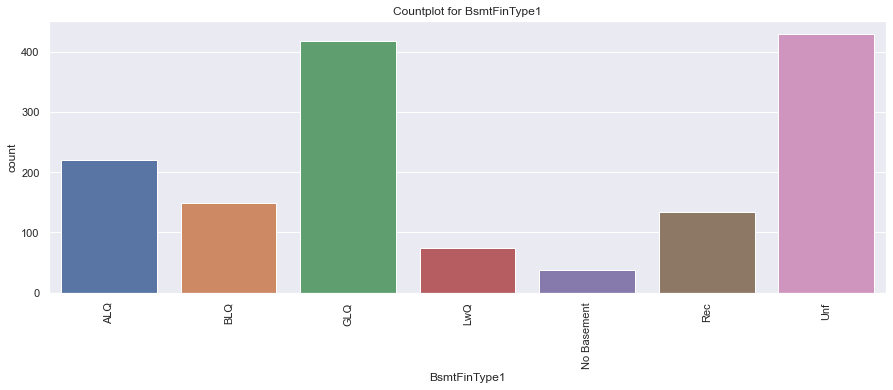

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64
*****************************************************************************************


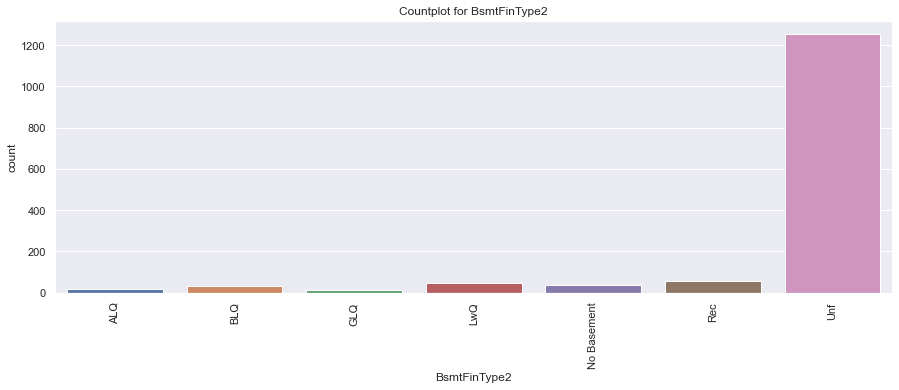

Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64
*****************************************************************************************


Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
*****************************************************************************************


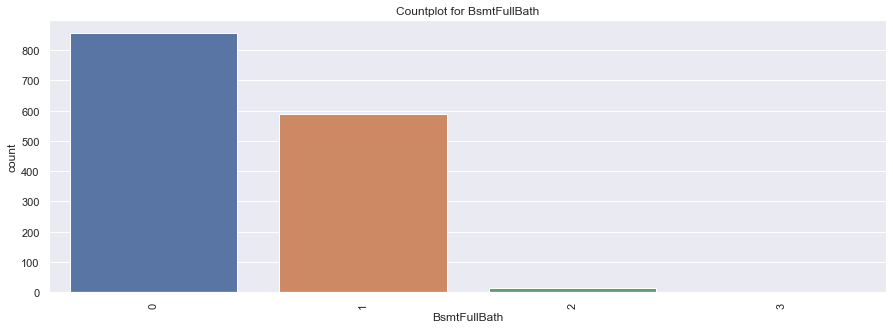

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64
*****************************************************************************************


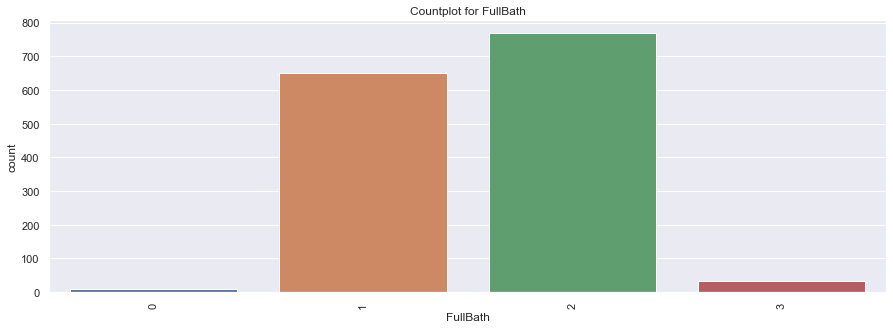

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64
*****************************************************************************************


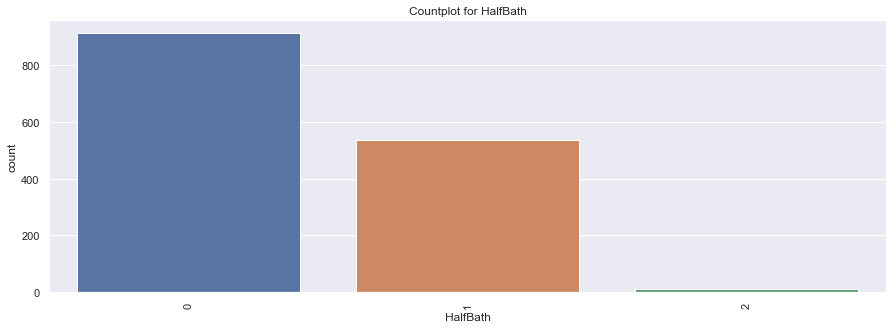

0    913
1    535
2     12
Name: HalfBath, dtype: int64
*****************************************************************************************


3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64
*****************************************************************************************


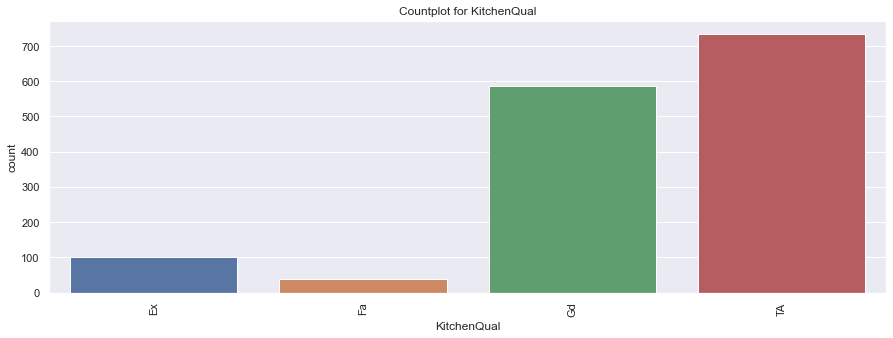

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
*****************************************************************************************


6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64
*****************************************************************************************


0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64
*****************************************************************************************


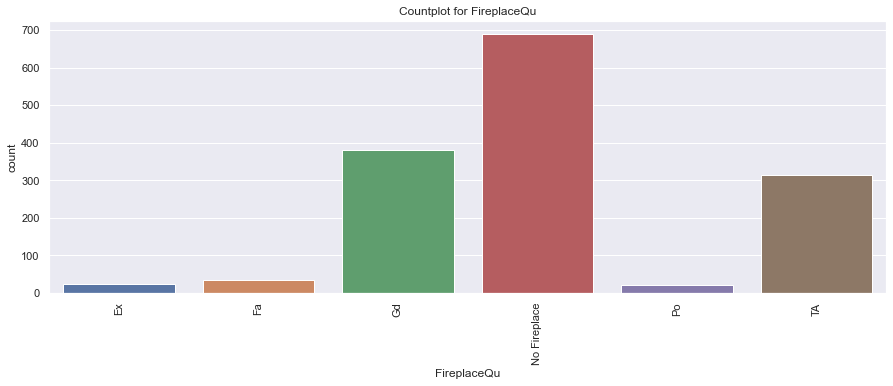

No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64
*****************************************************************************************


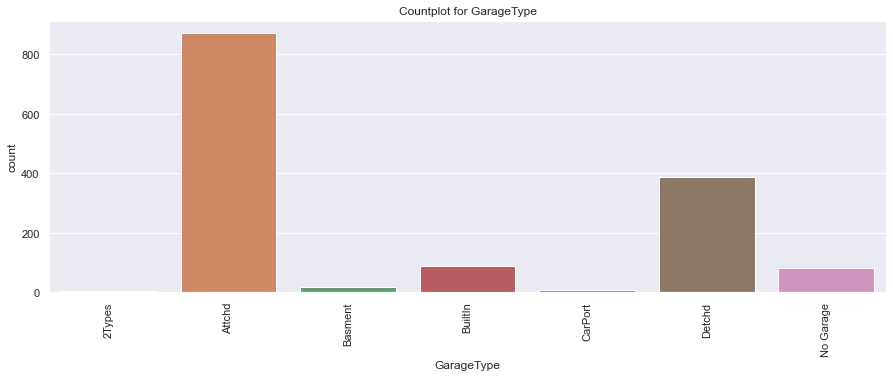

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64
*****************************************************************************************


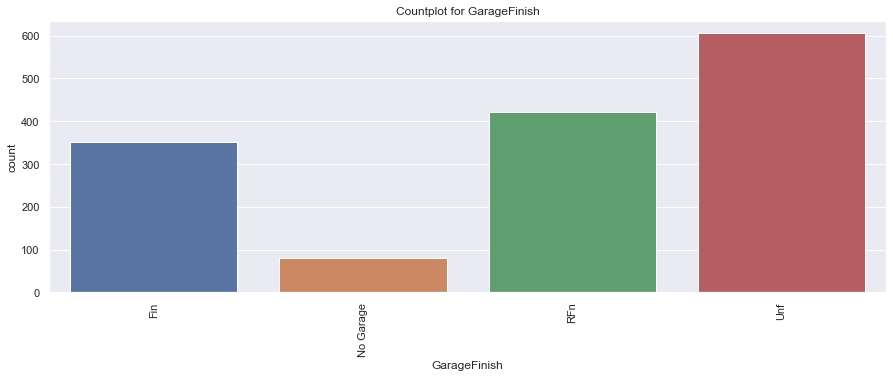

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64
*****************************************************************************************


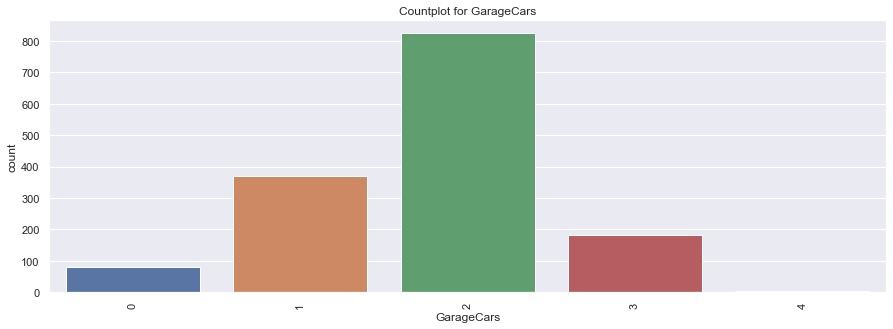

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64
*****************************************************************************************


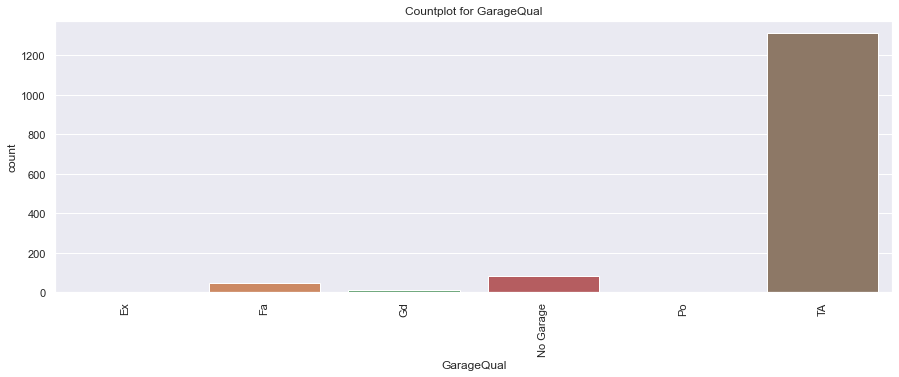

TA           1311
No Garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: GarageQual, dtype: int64
*****************************************************************************************


No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64
*****************************************************************************************


6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64
*****************************************************************************************


2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64
*****************************************************************************************


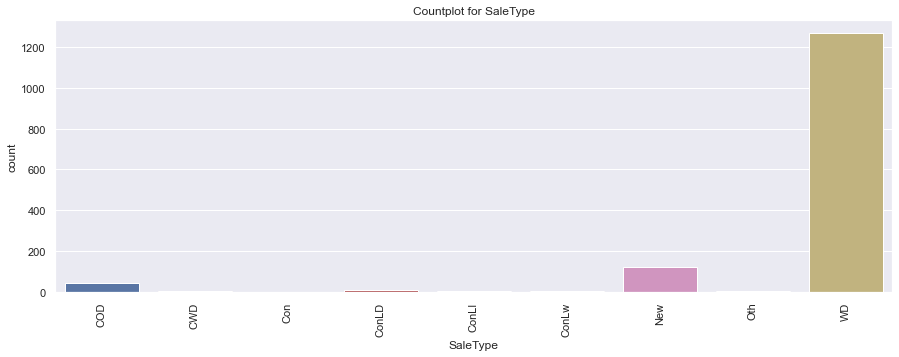

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
*****************************************************************************************


Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
*****************************************************************************************


In [49]:
for col in cat_cols:
    plot_count(housing,col)

In [50]:
print("Findings")
#Univariate Analysis on Categorical Variable:
df2 = pd.DataFrame()
for i,col in enumerate(cat_cols):
    df2[col] = [housing[col].mode()[0]]
df2.T

Findings


0
MSSubClass               20
MSZoning                 RL
LotShape                Reg
LandContour             Lvl
LotConfig            Inside
Neighborhood          NAmes
Condition1             Norm
BldgType               1Fam
HouseStyle           1Story
OverallQual               5
OverallCond               5
RoofStyle             Gable
Exterior1st         VinylSd
Exterior2nd         VinylSd
MasVnrType             None
ExterQual                TA
ExterCond                TA
Foundation            PConc
BsmtQual                 TA
BsmtCond                 TA
BsmtExposure             No
BsmtFinType1            Unf
BsmtFinType2            Unf
HeatingQC                Ex
BsmtFullBath              0
FullBath                  2
HalfBath                  0
BedroomAbvGr              3
KitchenQual              TA
TotRmsAbvGrd              6
Fireplaces                0
FireplaceQu    No Fireplace
GarageType           Attchd
GarageFinish            Unf
GarageCars                2
GarageQual               TA
Fence              No Fence
MoSold                    6
YrSold                 2009
SaleType                 WD
SaleCondition        Normal

## Bivariate Analysis

In [51]:
def plot_scatter_cont(df,cols):
    sns.set_theme(color_codes=True)
    plt.figure(figsize=(20,50))
    for i,col in enumerate(cols):
        plt.subplot(len(cols)/3,3,i+1)
        sns.regplot(x=df[col],y=df["SalePrice"])#Box Plot
        plt.title("Boxplot for SalePrice and "+col)
        plt.xticks(rotation=90)
    plt.show()

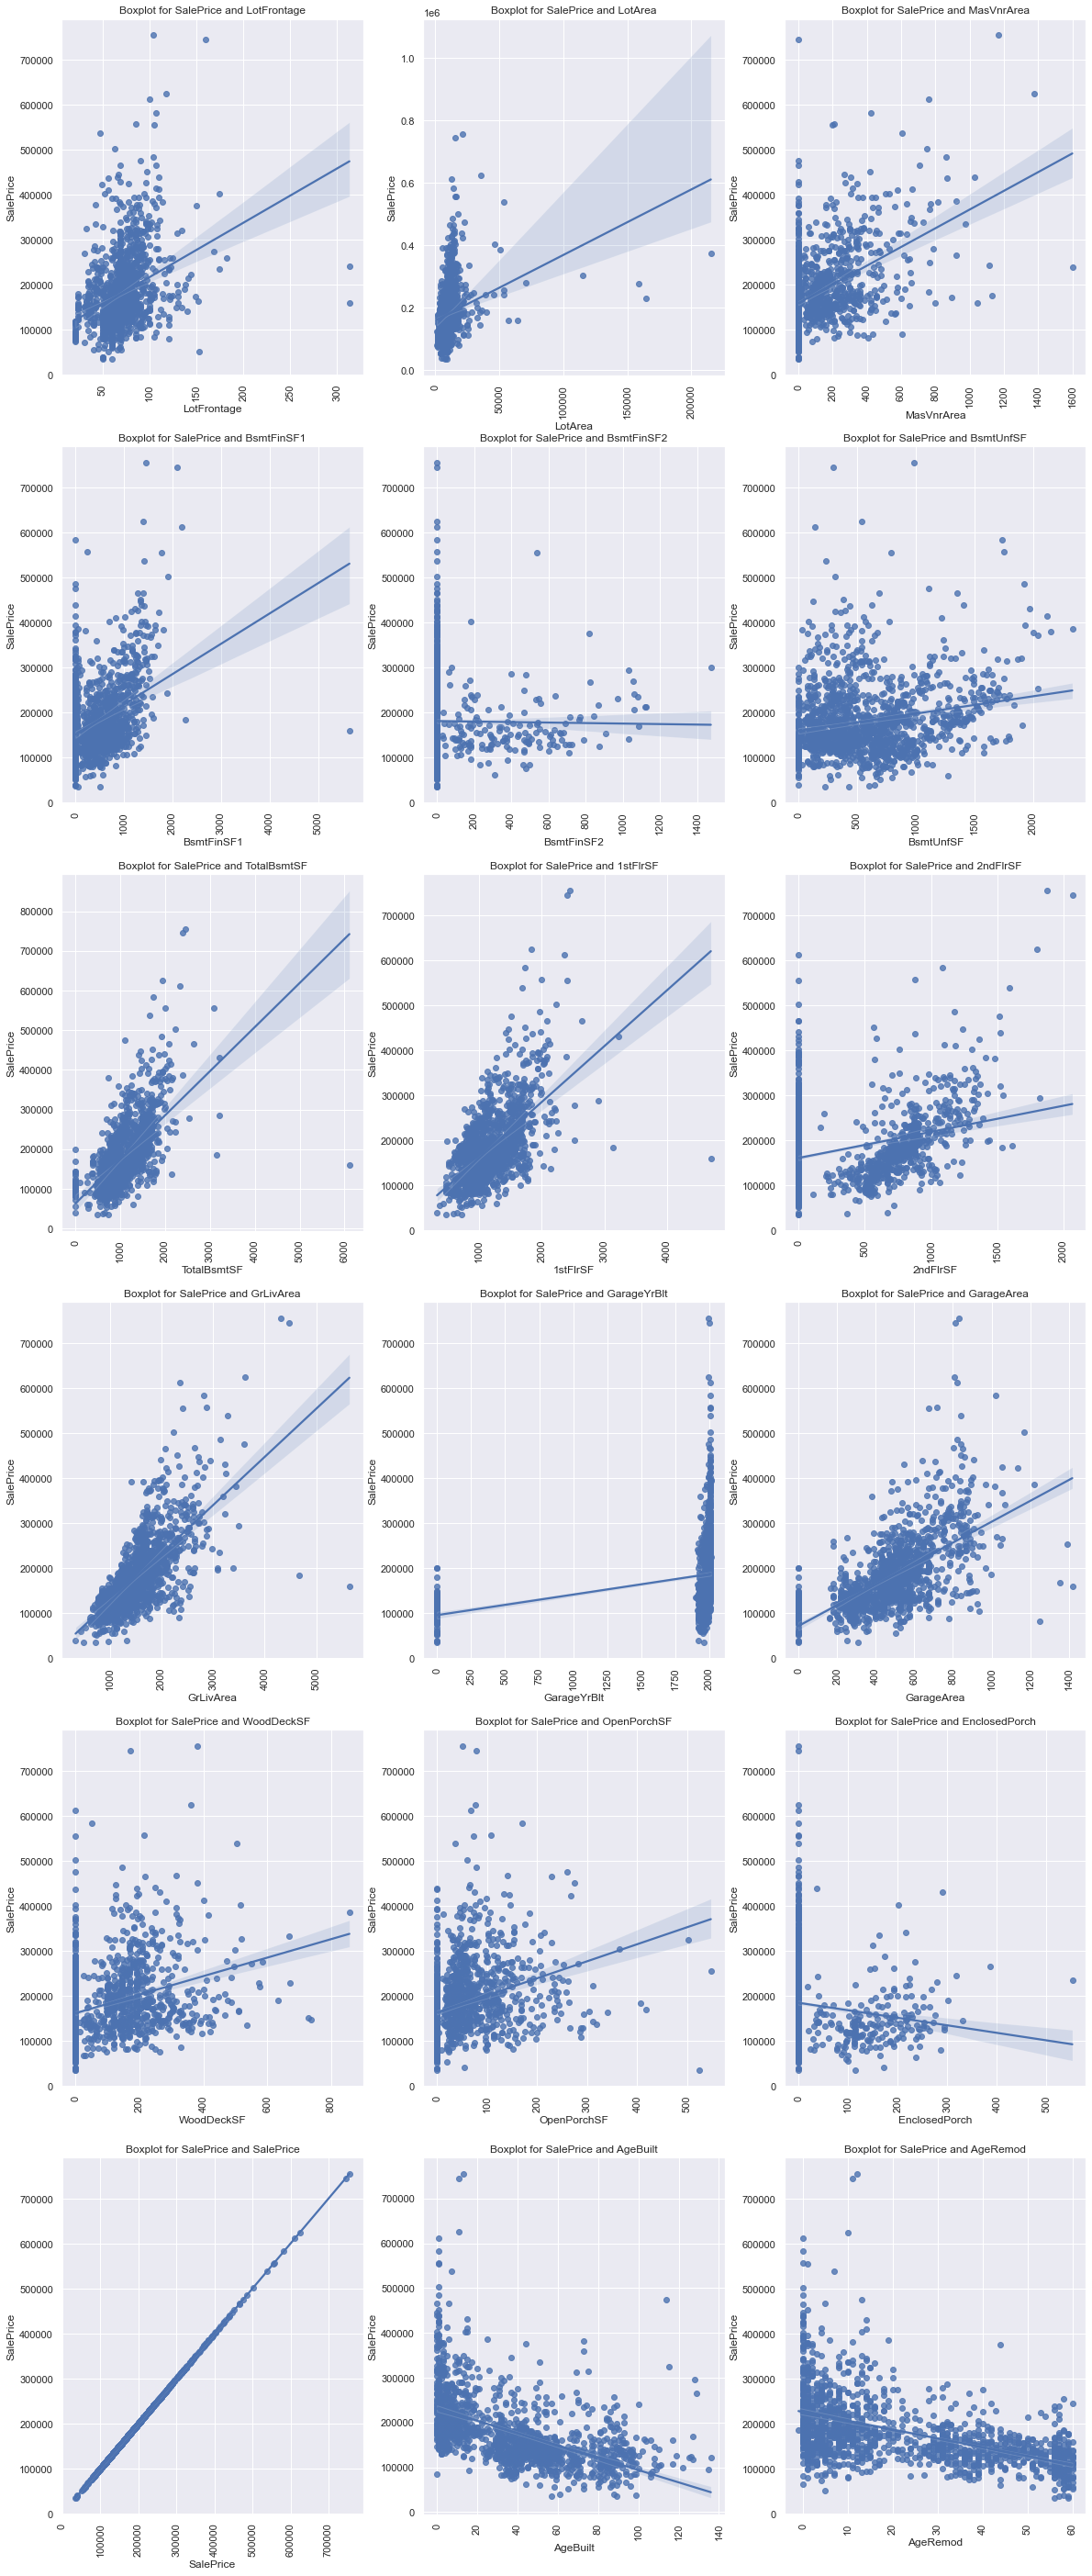

In [52]:
plot_scatter_cont(housing,cont_cols)

### Findings
Bivariate Analysis on Continuous columns

Below are the List of features which have linear relationsip with the target feature
* TotalBsmtSF
* 1stFlrSF
* 2ndFlrSF
* GrLivArea
* GarageArea
* AgeBuild
* AgeRemod

In [53]:
def plot_box_cat(df,col):
    plt.figure(figsize=(10,10))
    sns.boxplot(x=df[col],y=df["SalePrice"])#Box Plot
    plt.title("Boxplot for SalePrice and "+col)
    plt.xticks(rotation=90)
    plt.show()
    print("*****************************************************************************************")

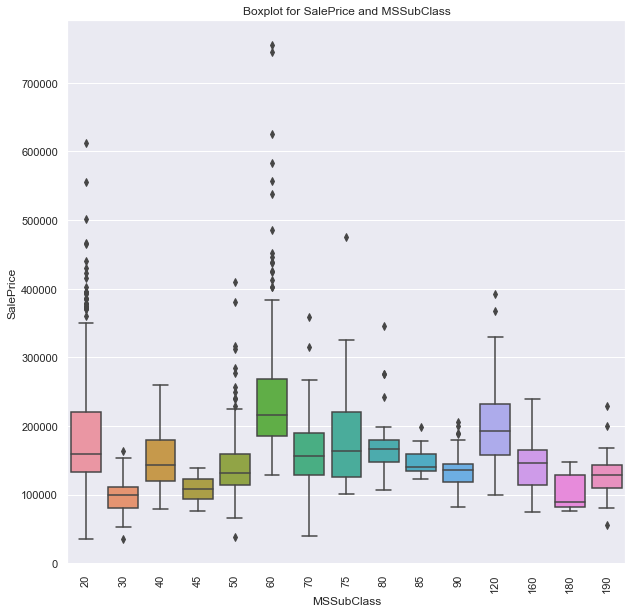

*****************************************************************************************


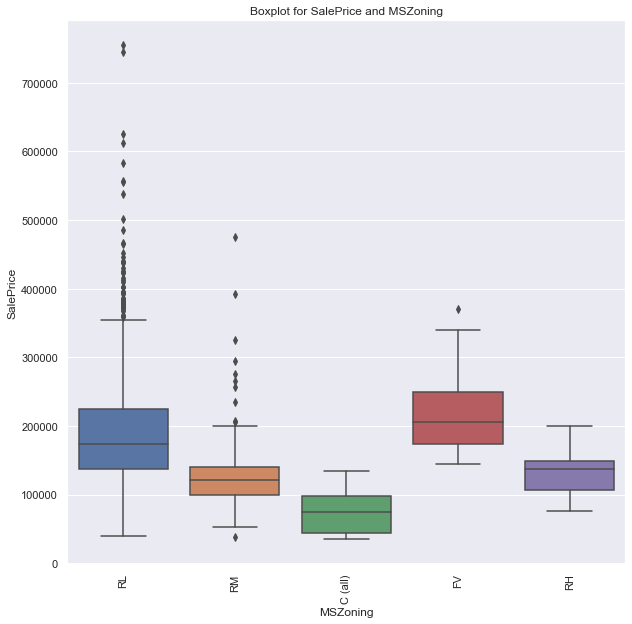

*****************************************************************************************


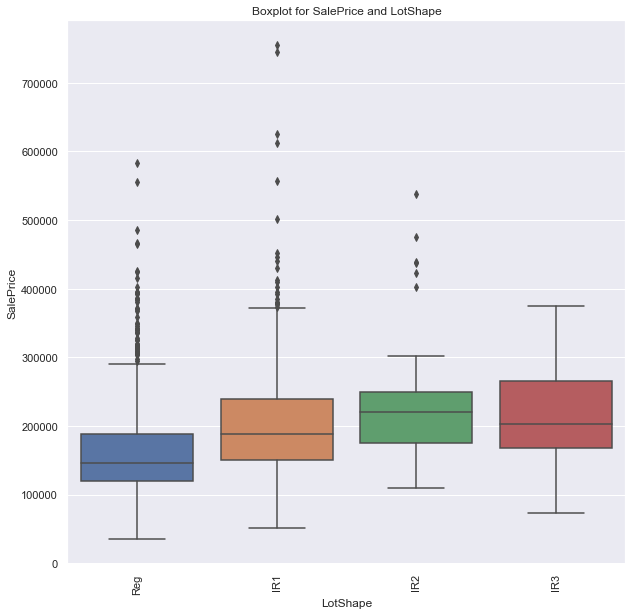

*****************************************************************************************


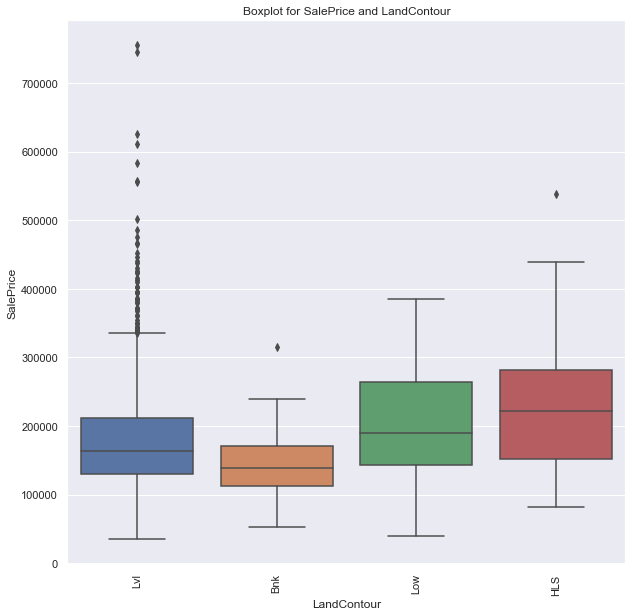

*****************************************************************************************


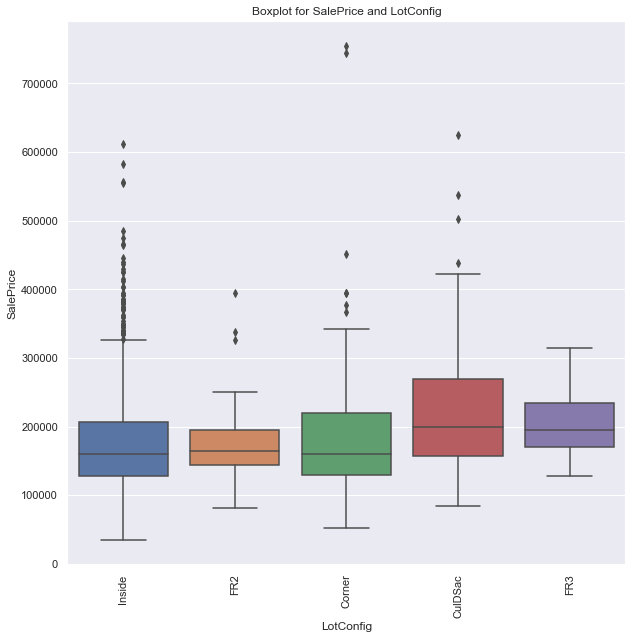

*****************************************************************************************


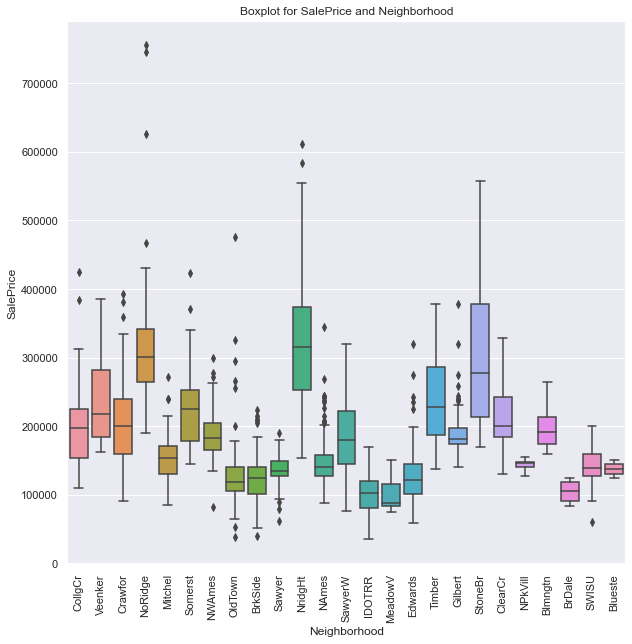

*****************************************************************************************


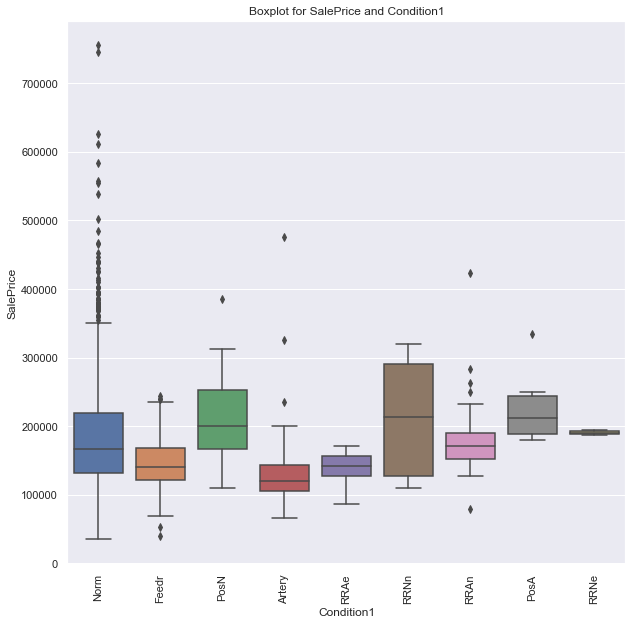

*****************************************************************************************


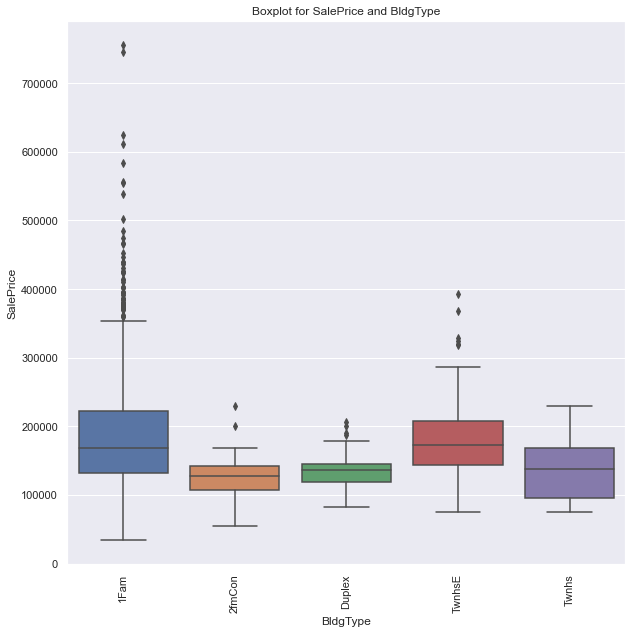

*****************************************************************************************


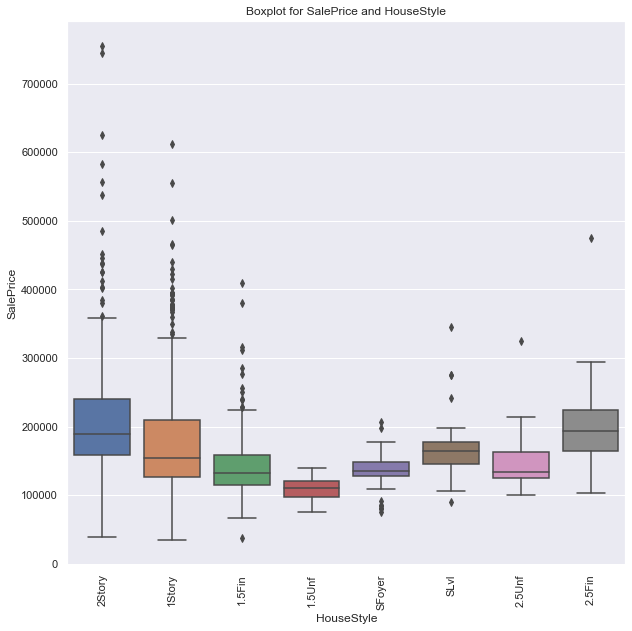

*****************************************************************************************


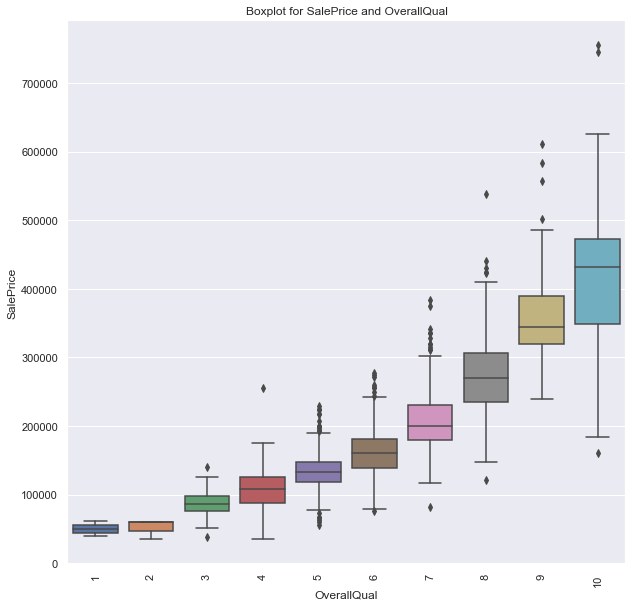

*****************************************************************************************


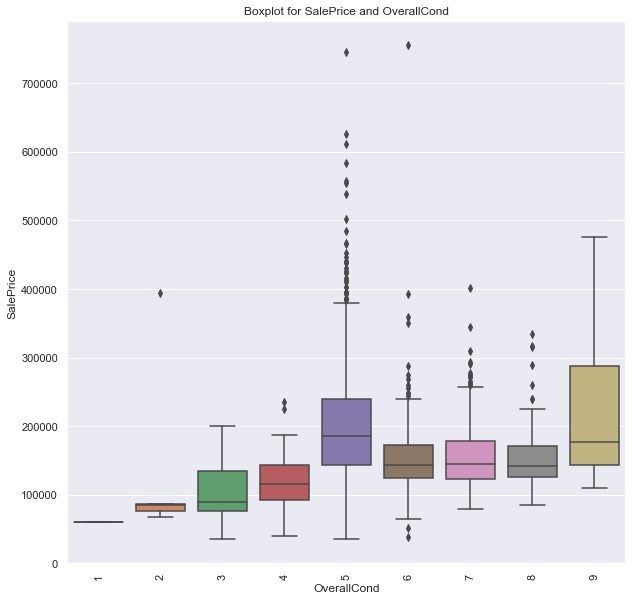

*****************************************************************************************


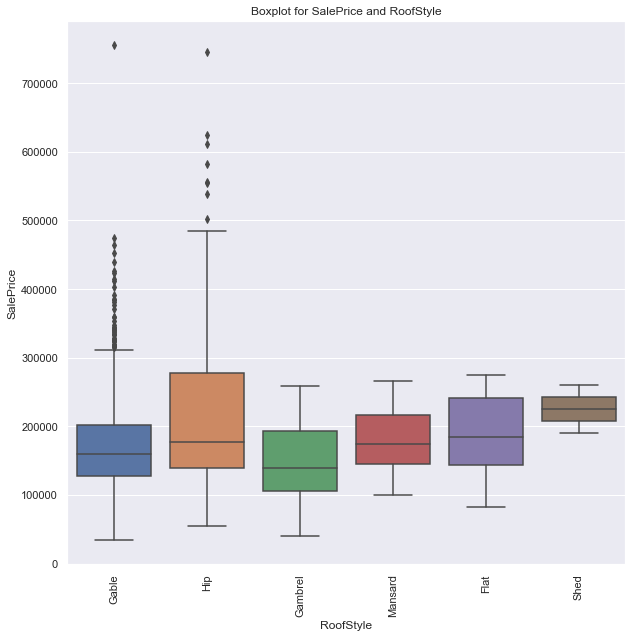

*****************************************************************************************


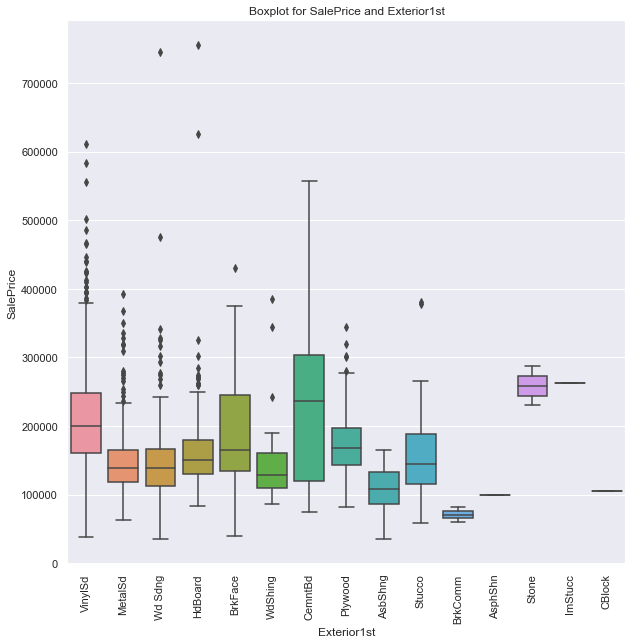

*****************************************************************************************


*****************************************************************************************


*****************************************************************************************


*****************************************************************************************


*****************************************************************************************


*****************************************************************************************


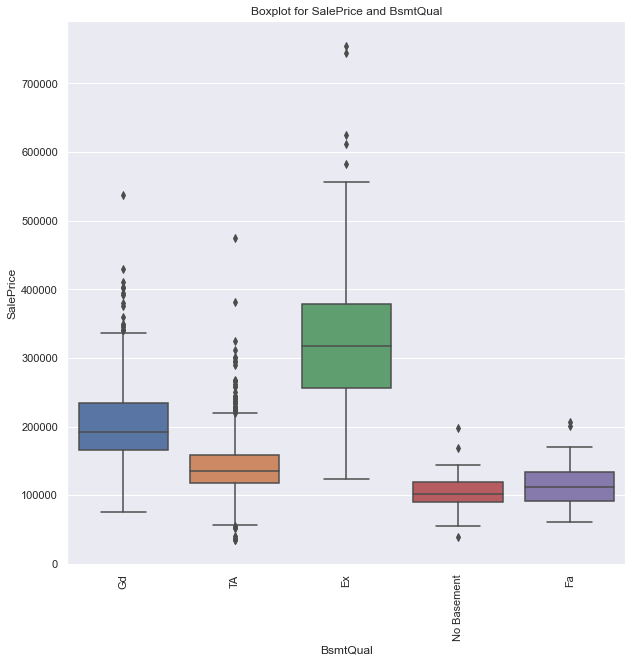

*****************************************************************************************


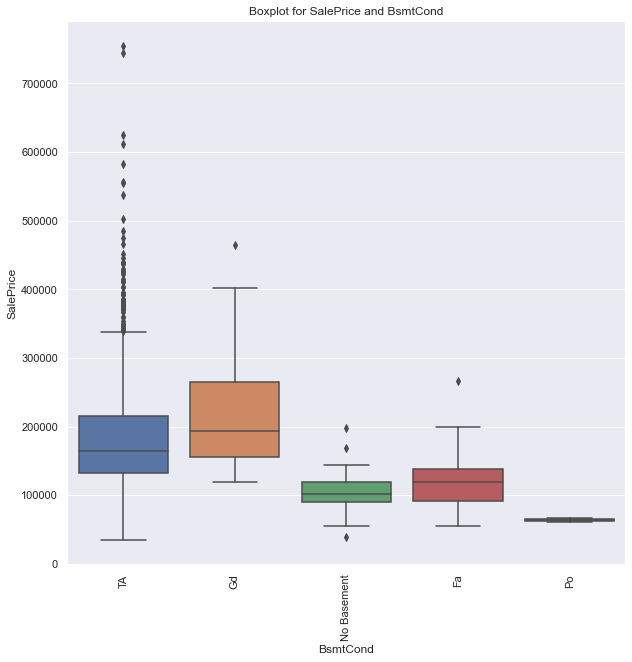

*****************************************************************************************


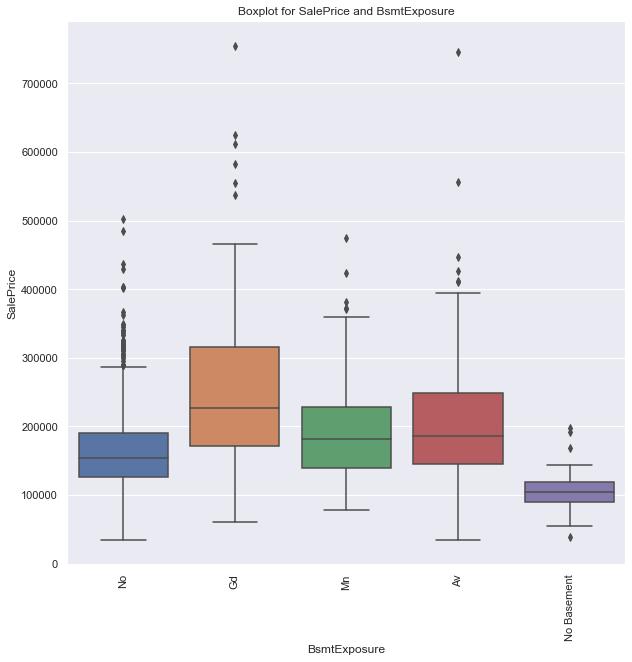

*****************************************************************************************


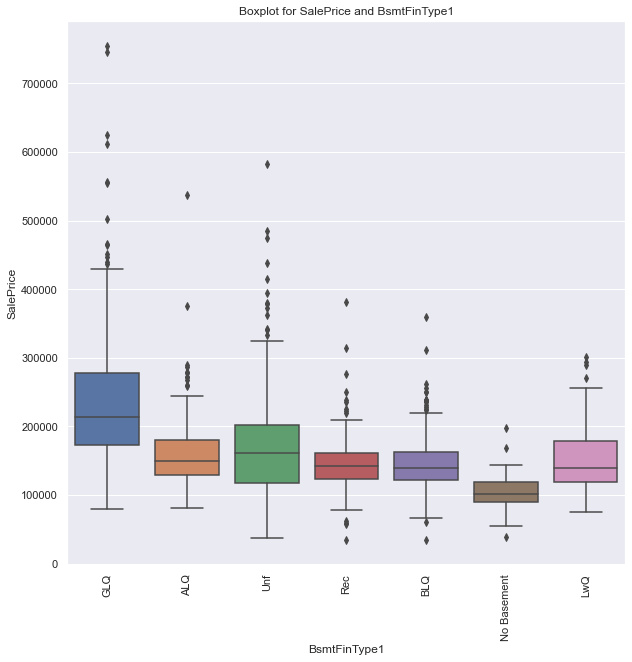

*****************************************************************************************


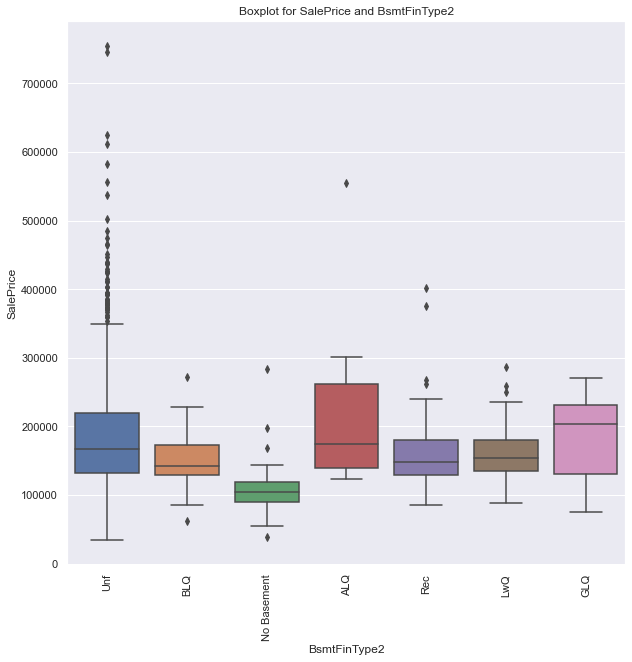

*****************************************************************************************


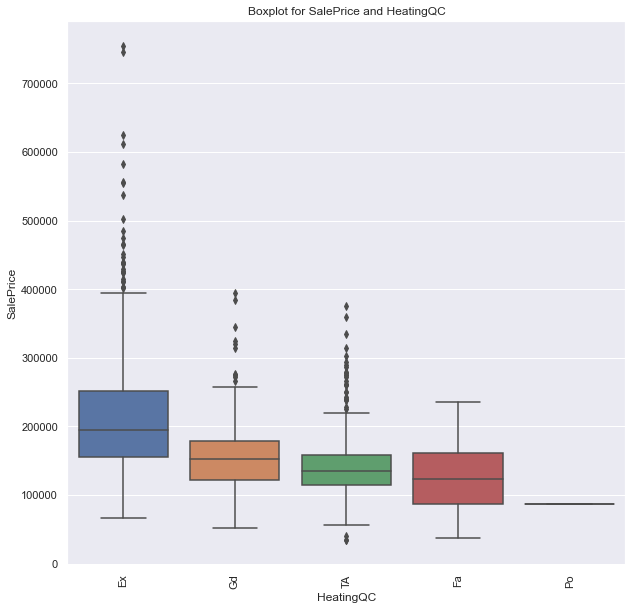

*****************************************************************************************


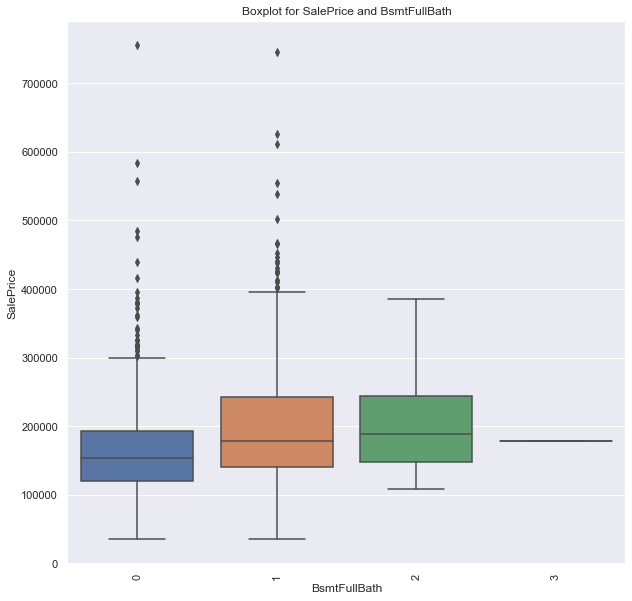

*****************************************************************************************


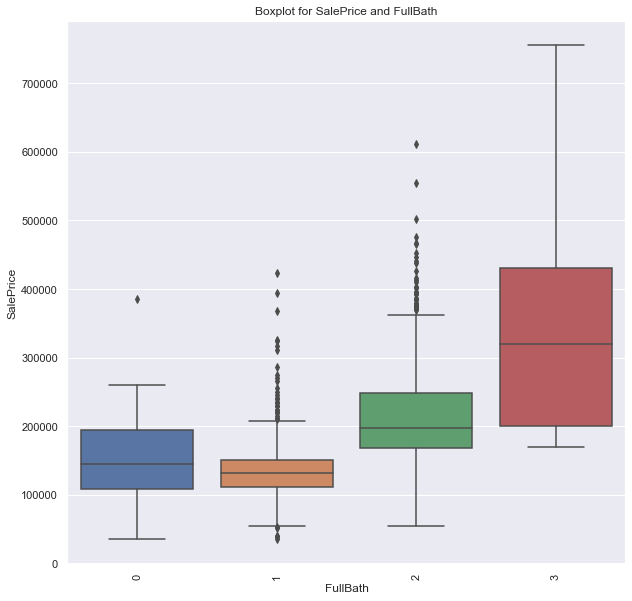

*****************************************************************************************


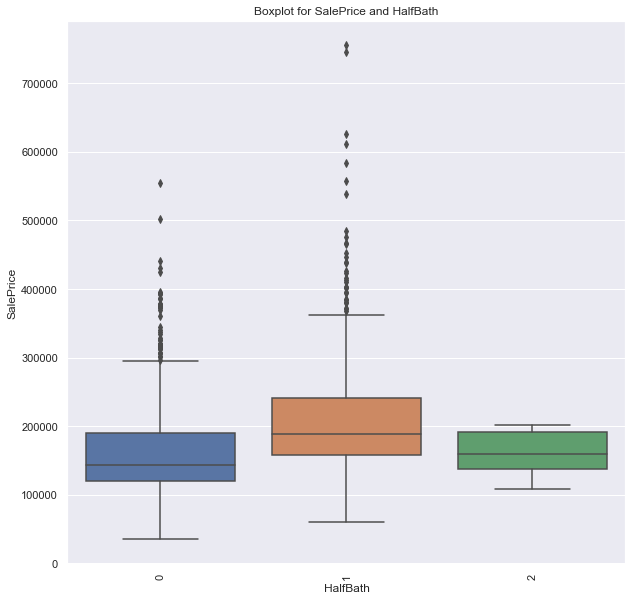

*****************************************************************************************


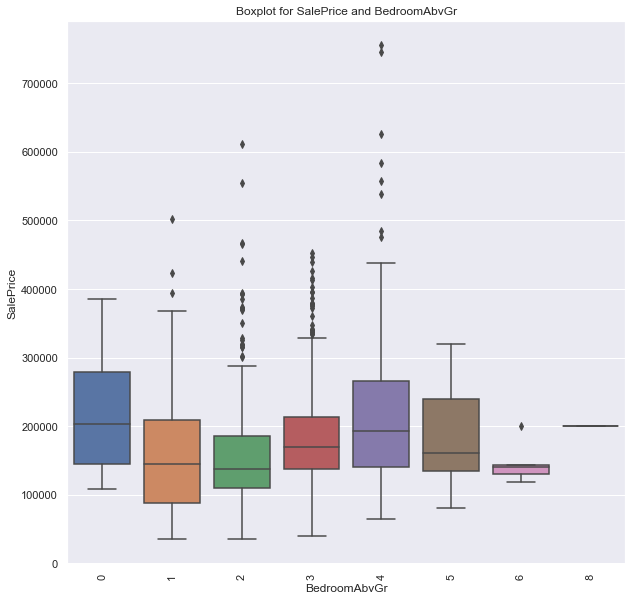

*****************************************************************************************


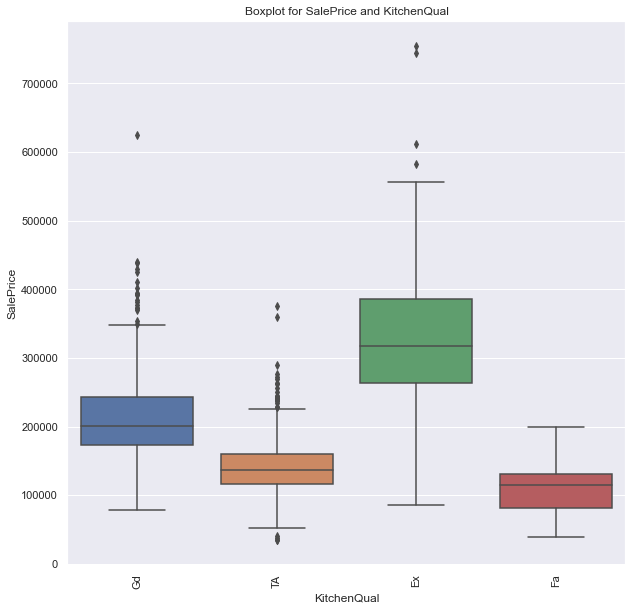

*****************************************************************************************


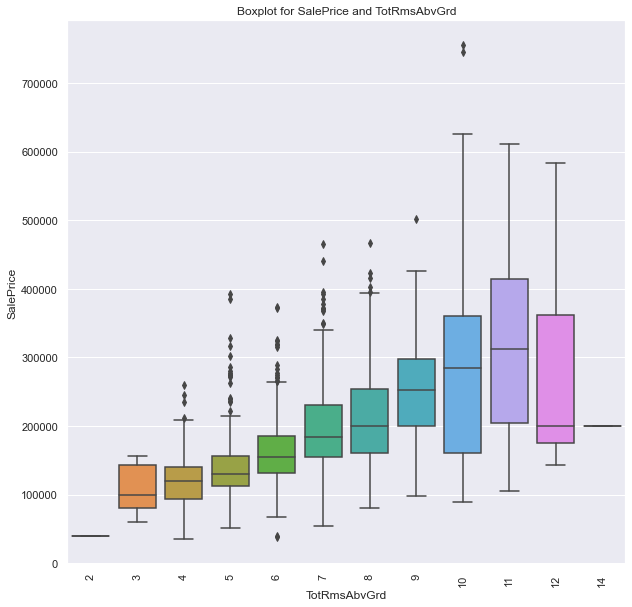

*****************************************************************************************


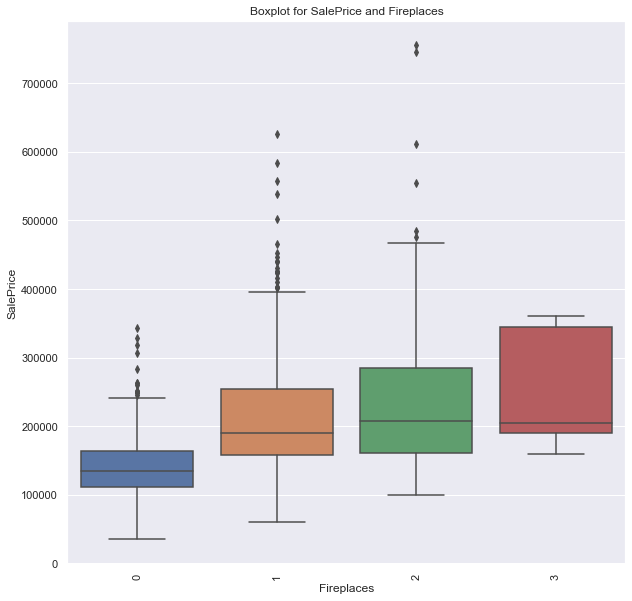

*****************************************************************************************


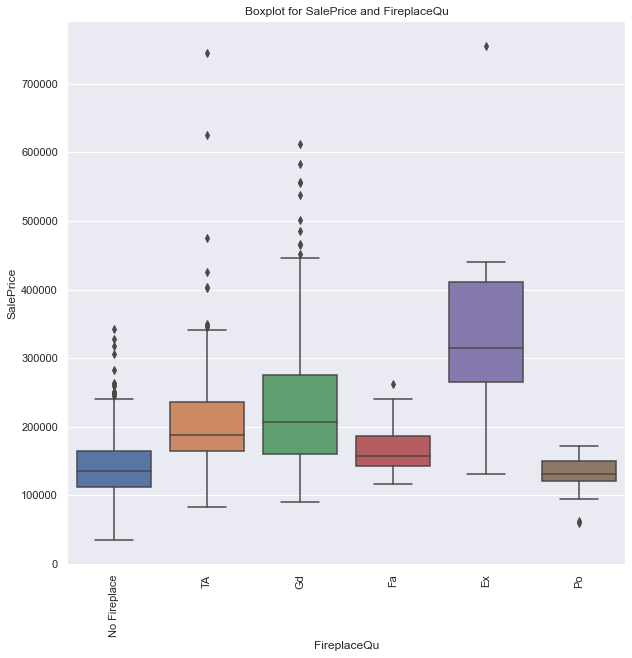

*****************************************************************************************


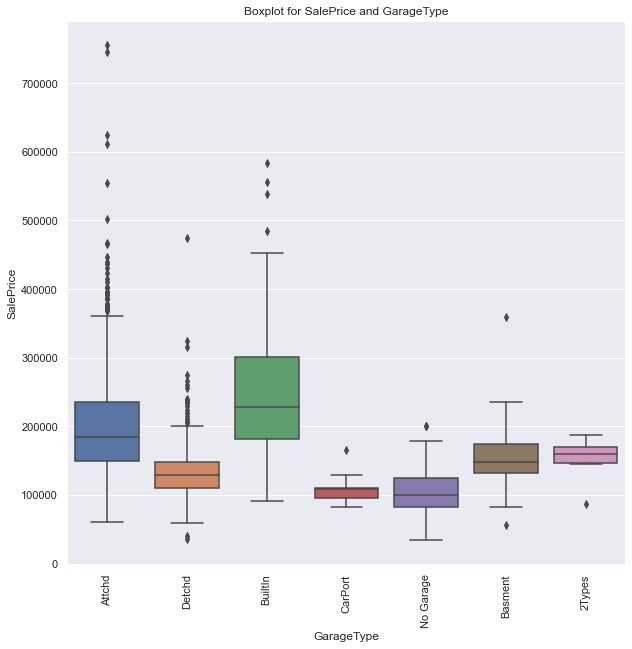

*****************************************************************************************


*****************************************************************************************


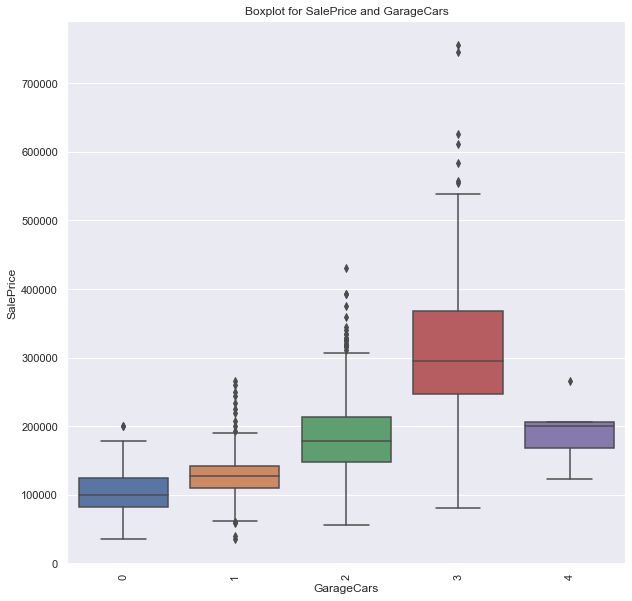

*****************************************************************************************


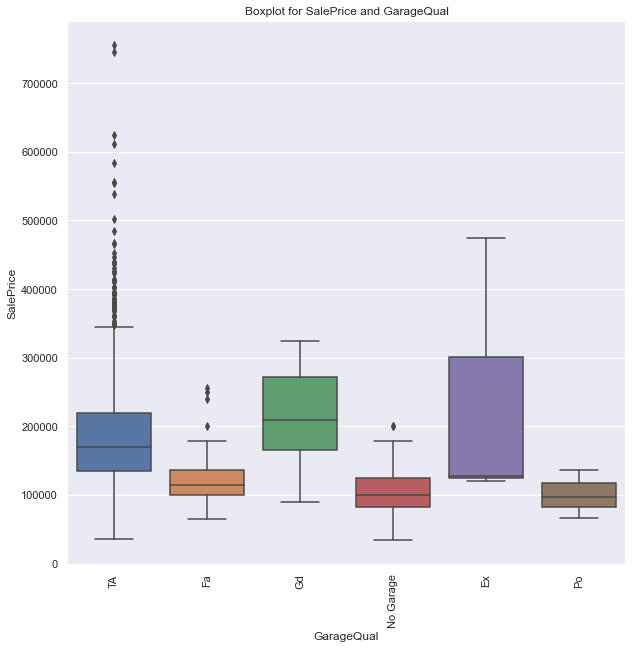

*****************************************************************************************


*****************************************************************************************


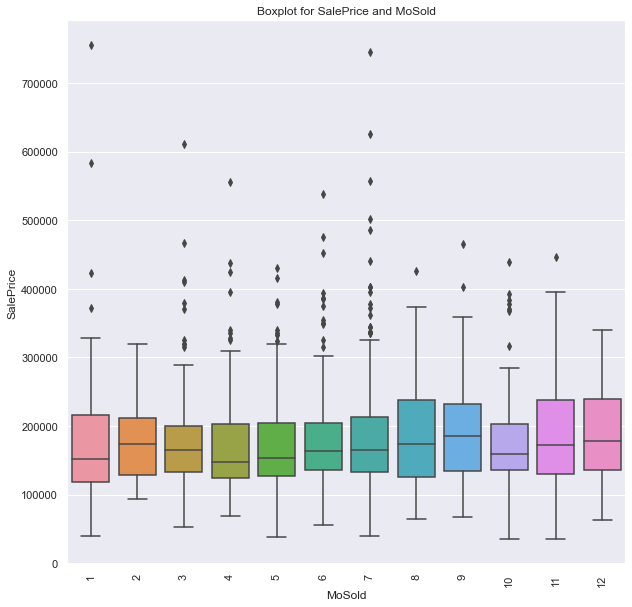

*****************************************************************************************


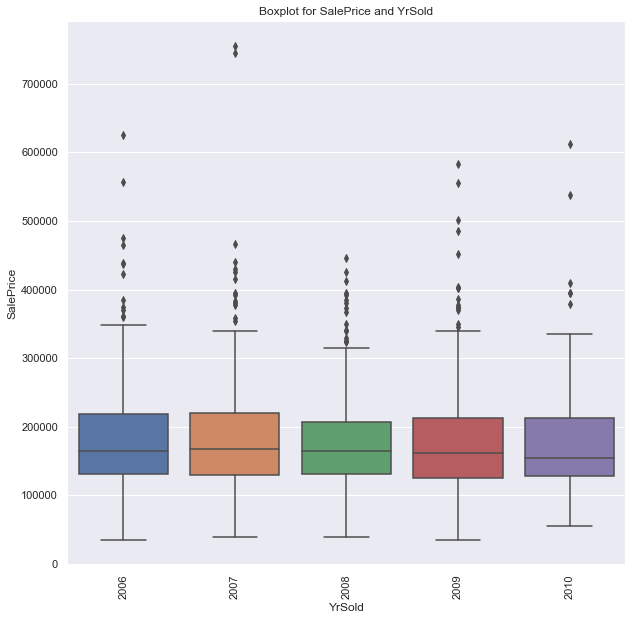

*****************************************************************************************


*****************************************************************************************


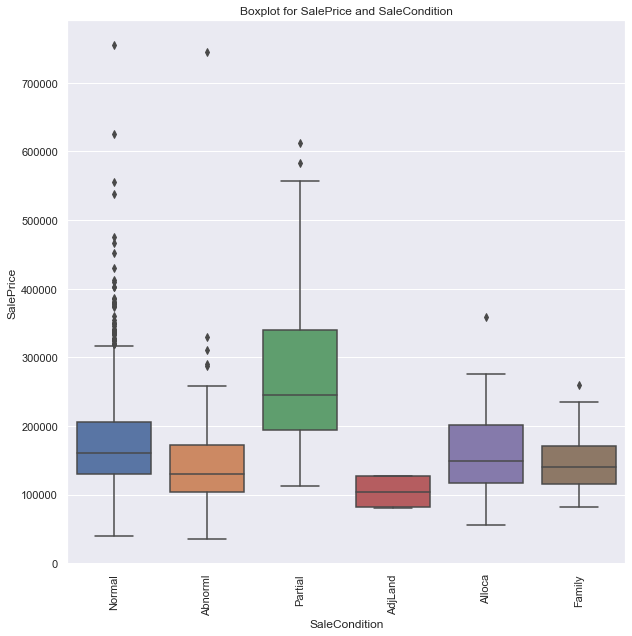

*****************************************************************************************


In [54]:
for col in cat_cols:
    plot_box_cat(housing,col)

### Findings
Bivariate Analysis on Categorical columns

* MSSubClass - 20, 50, 75, 120 have higher SalePrice than other MSSubClass
* MSZoning - RL and FV have higher SalePrice than other MSZoning
* LotShape - IR2 and IR1 have slightly higher avarage SalesPrice than other LotShape
* LandContour - HLS has slightly higher avarage SalesPrice than other LandContour
* LotConfig - CulDSac has slightly higher avarage SalesPrice than other LotConfig
* Neighborhood - NoRidge, NridgHt, Timber and StoneBr have higher SalePrice than other Neighborhood
* Condiction1 - PosN and RRNn have slightly higher SalePrice than other Condiction1 
* BldgType - 1Fam and TwnhsE have slightly higher SalePrice than other BldgType 
* HouseStyle - 2Story, 1Story and 2.5Fin have higher SalePrice than other HouseStyle
* OverallQual - As the OverallQual increases the the SalePrice increases steeply
* OverallCond - As the OverallCond increases the the SalePrice increases
* RoofStyle - No effect of RoofStyle on the SalePrice
* Exterior1st - VinylSd, CemntBd and Stone have higher SalePrice than other Exterior1st
* Exterior2nd - VinylSd, CemntBd and ImStucc have higher SalePrice than other Exterior2nd
* MasVnrType - Stone and SBrkr have higher avarage SalesPrice than other MasVnrType
* ExterQual - Ex has significant higher SalePrice than other ExterQual
* ExterCond - No effect of ExterCond on the SalePrice
* Foundation - PConc has higher avarage SalesPrice than other Foundation
* BsmtQual - Ex and Gd have significant higher SalePrice than other BsmtQual
* BsmtCond - TA and Gd have higher SalePrice than other BsmtCond
* BsmtExposure - Gd has higher SalePrice than other BsmtExposure
* BsmtFinType1 - GL Q has higher SalePrice than other BsmtFinType1
* BsmtFinType2 - GL Q has higher SalePrice than other BsmtFinType2
* HeatingQC  - As HeatingQC becomes poor the SalePrice decreases 
* BsmtFullBath - No effect of BsmtFullBath on the SalePrice
* FullBath - 2 and 3 ave significant higher SalePrice than other FullBath
* HalfBath - 1 has slightly higher avarage SalePrice than other HalfBath
* BedroomAbvGr - 0 and 4 have slightly higher avarage SalePrice than other BedroomAbvGr
* KitchenQual - Ex has significant higher SalePrice than other KitchenQual
* TotRmsAbvGrd - As the TotRmsAbvGrd increases the the SalePrice increases
* FirePlaces - As the FirePlaces increases the the SalePrice increases
* FireplaceQu - Ex has significant higher SalePrice than other FireplaceQu
* GarageType - Attchd and BuiltIn have higher SalePrice than other GarageType
* GarageFinish - Fin has higher SalePrice than other GarageFinish
* GarageCars - As the GarageCars increases the the SalePrice increases except for 4
* GarageQual - Gd and Ex have higher SalePrice than other GarageQual
* Fence - No effect of Fence on the SalePrice
* MoSold - No effect of MoSold on the SalePrice
* YrSold - No effect of YrSold on the SalePrice
* SaleType - New, CWD and Con have higher SalePrice than other SaleType
* SaleCondition - Partial has significant higher SalePrice than other SaleCondition

In [55]:
def plot_box_conti(df,col):
    plt.figure(figsize=(10,10))
    bin = pd.cut(df[col], 10)
    sns.boxplot(x=bin,y=df["SalePrice"])#Box Plot
    plt.title("Boxplot for defaulted and "+col)
    plt.xticks(rotation=90)
    plt.show()
    print("*****************************************************************************************")

*****************************************************************************************


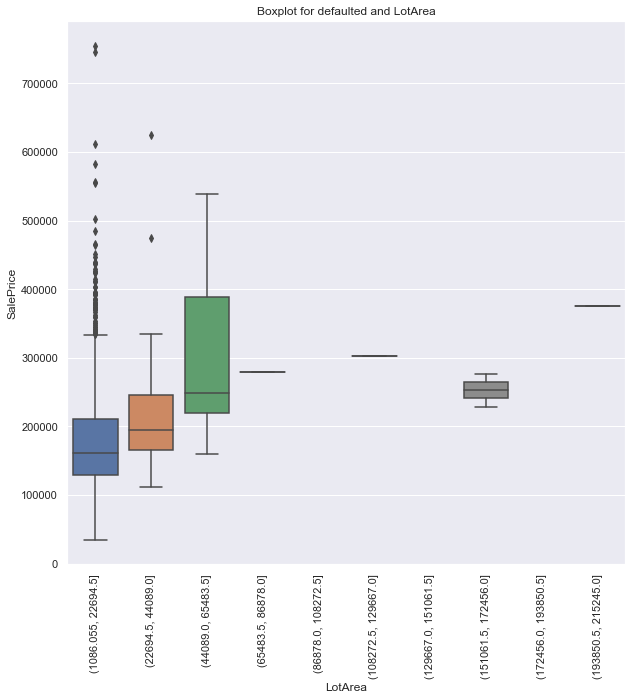

*****************************************************************************************


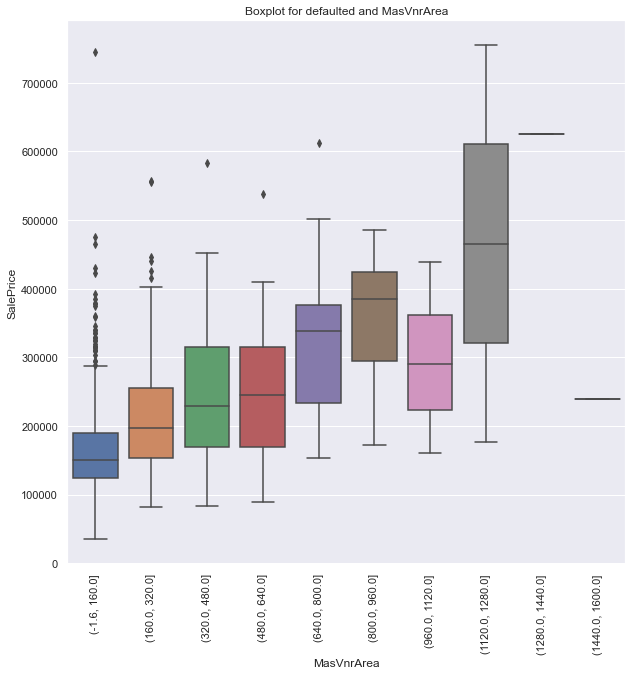

*****************************************************************************************


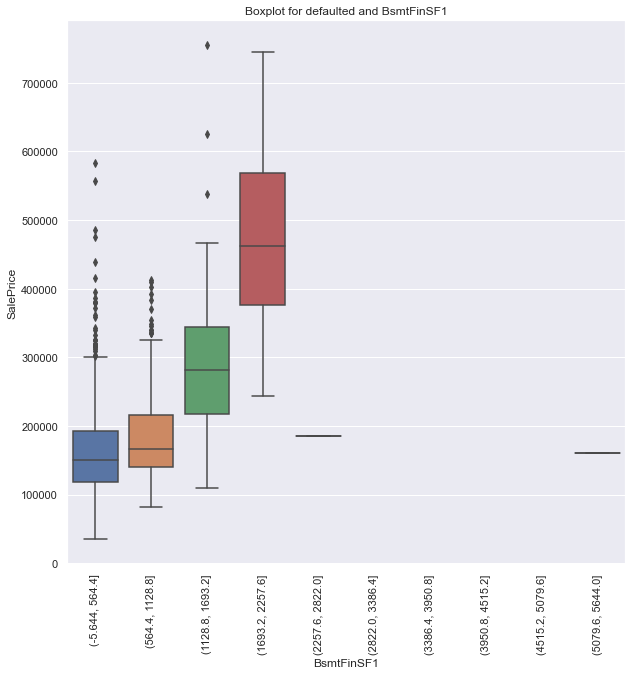

*****************************************************************************************


*****************************************************************************************


*****************************************************************************************


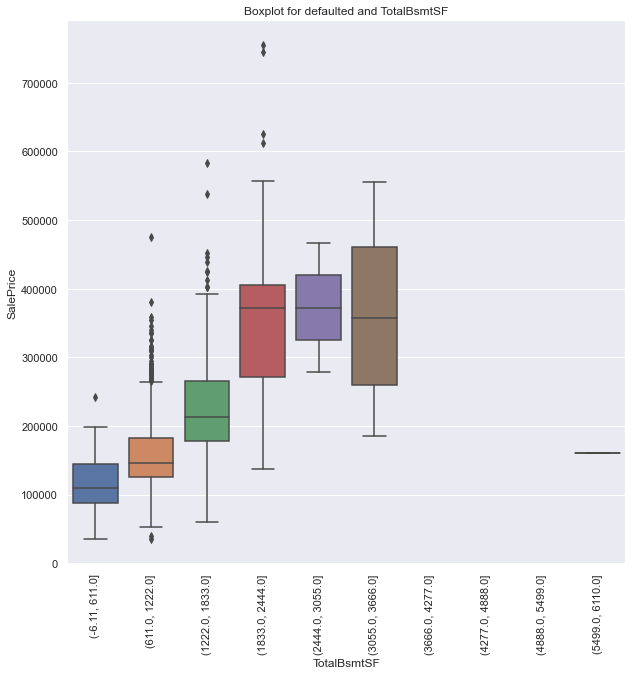

*****************************************************************************************


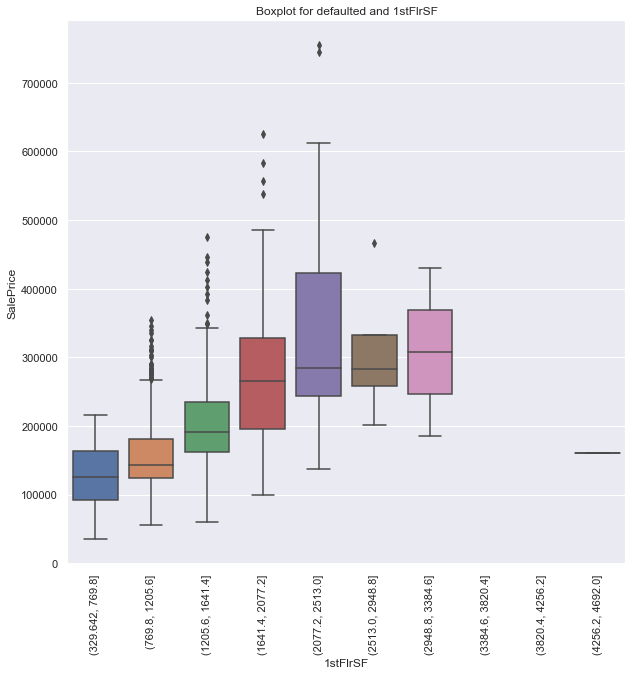

*****************************************************************************************


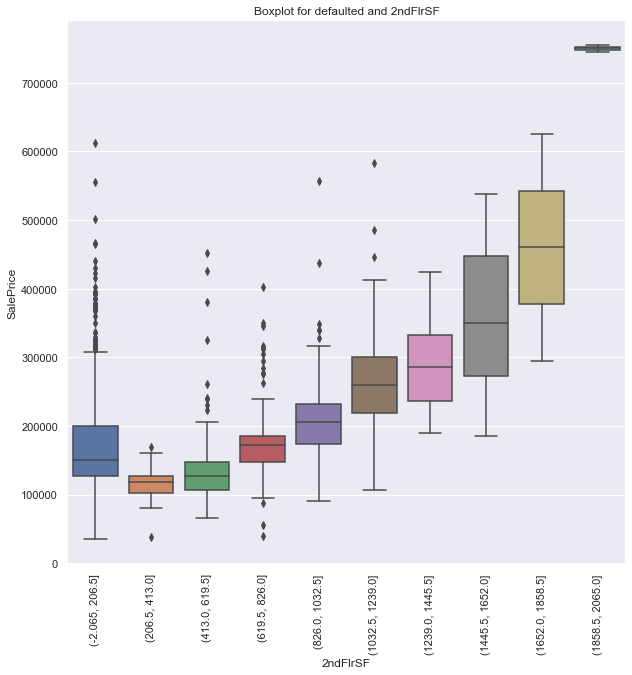

*****************************************************************************************


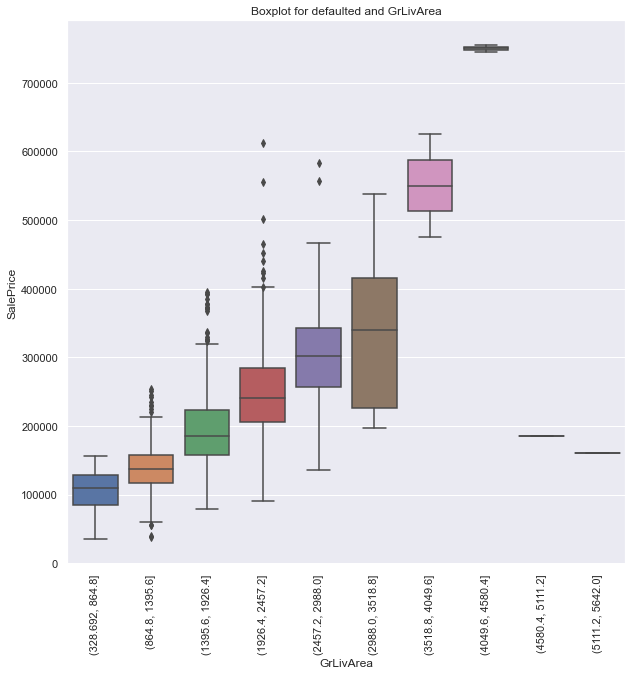

*****************************************************************************************


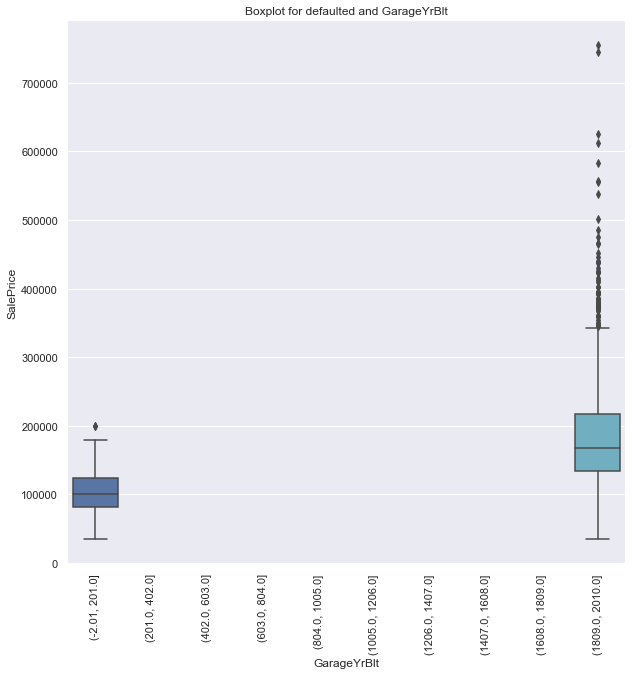

*****************************************************************************************


*****************************************************************************************


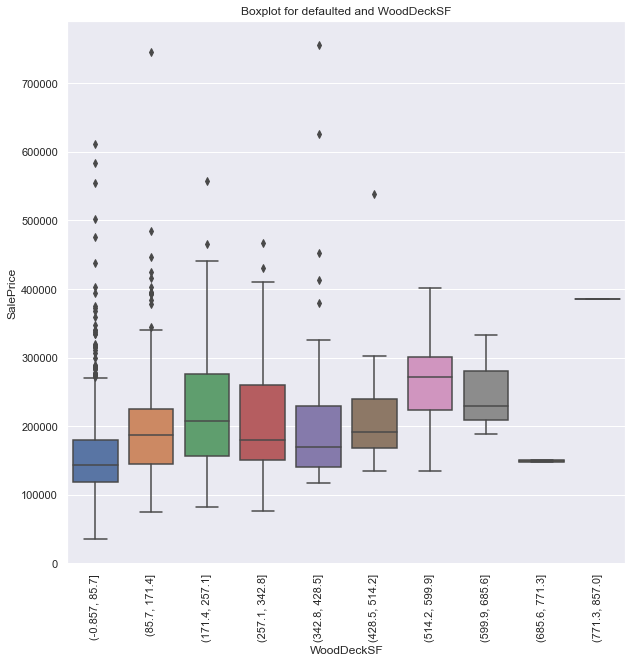

*****************************************************************************************


*****************************************************************************************


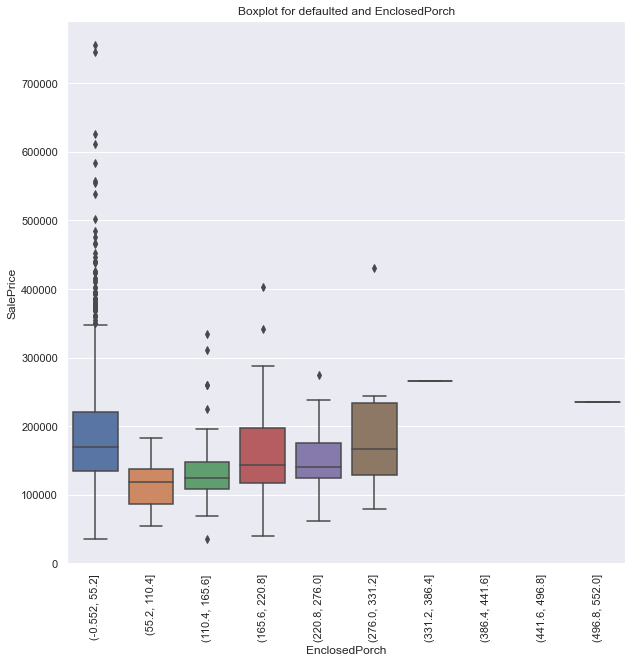

*****************************************************************************************


*****************************************************************************************


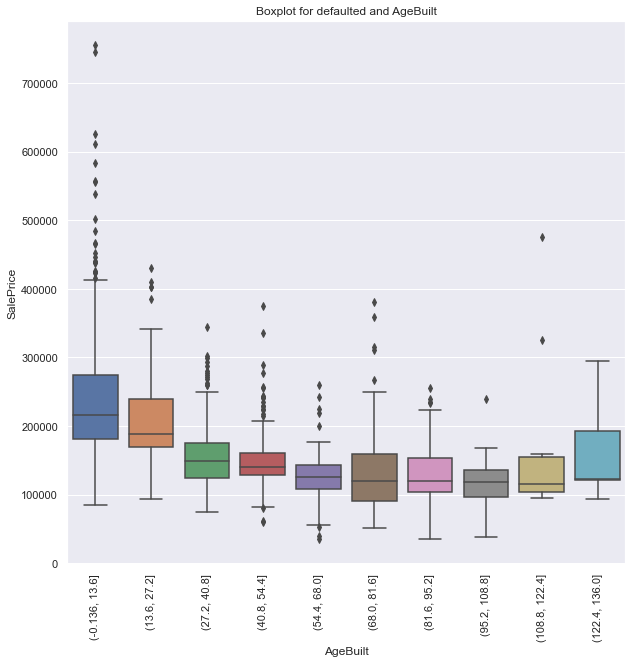

*****************************************************************************************


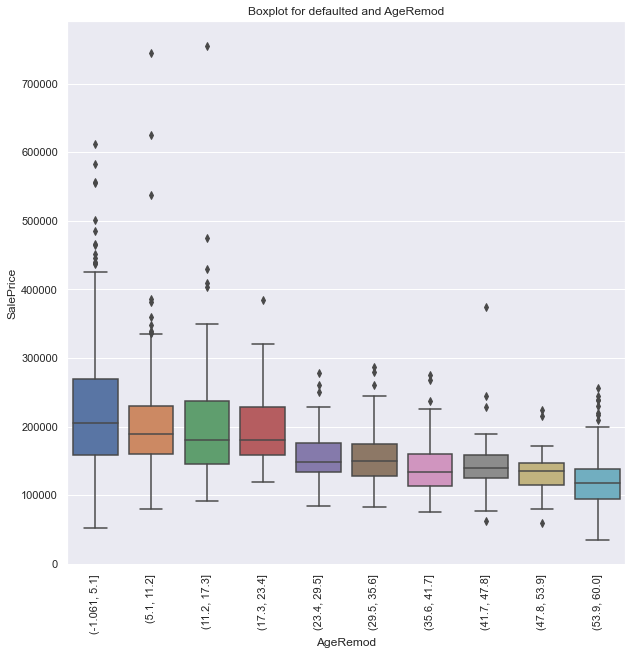

*****************************************************************************************


In [56]:
for col in cont_cols:
    if housing[col].dtype == object:
        plot_box_cat(housing,col)
    else:
        plot_box_conti(housing,col)

* LotFrontage - As LotFrontage in increases from [20.7 to 196.2] the SalePrice **increases**
* LotArea - As LotArea in increases from [1086 to 65483] the SalePrice **increases**
* MasVnrArea - As MasVnrArea in increases from [0 to 1280] the SalePrice **increases**
* BsmtFinSF1 - As BsmtFinSF1 in increases from [0 to 2257] the SalePrice **increases**
* BsmtFinSF2 - As BsmtFinSF2 in increases thier is not much effect on SalePrice
* BsmtUnfSF - As BsmtUnfSF in increases from [1168 to 2336] the SalePrice **increases**
* TotalBsmtSF - As TotalBsmtSF in increases from [0 to 3666] the SalePrice **increases**
* 1stFlrSF - As 1stFlrSF in increases from [329.64 to 3384] the SalePrice **increases**
* 2ndFlrSF - As 2ndFlrSF in increases from [206.5 to 1858] the SalePrice **increases**
* GrLivArea - As GrLivArea in increases from [328 to 4480] the SalePrice **increases**
* GarageYrBlt - As GarageYrBlt in increases thier is not much effect on SalePrice
* GarageArea - As GarageArea in increases from [0 to 1276] the SalePrice **increases**
* WoodDeckSF - As WoodDeckSF in increases from [0 to 685] the SalePrice **increases**
* OpenPorchSF - As OpenPorchSF in increases thier is not much effect on SalePrice
* EnclosedPorch - As EnclosedPorch in increases thier is not much effect on SalePrice
* AgeBuilt - As AgeBuilt in increases from [0 to 81] the SalePrice **decreases** and from [81 to 136] the SalePrice slightly **increases**
* AgeRemod - As AgeRemod in increases from [0 to 60] the SalePrice **decreases**

## Correlation Matrix

In [57]:
abs(housing.corr()['SalePrice']).sort_values()

BsmtFinSF2       0.011378
YrSold           0.028923
MoSold           0.046432
OverallCond      0.077856
MSSubClass       0.084284
EnclosedPorch    0.128578
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
GarageYrBlt      0.261366
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.334771
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.472614
AgeRemod         0.509079
AgeBuilt         0.523350
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

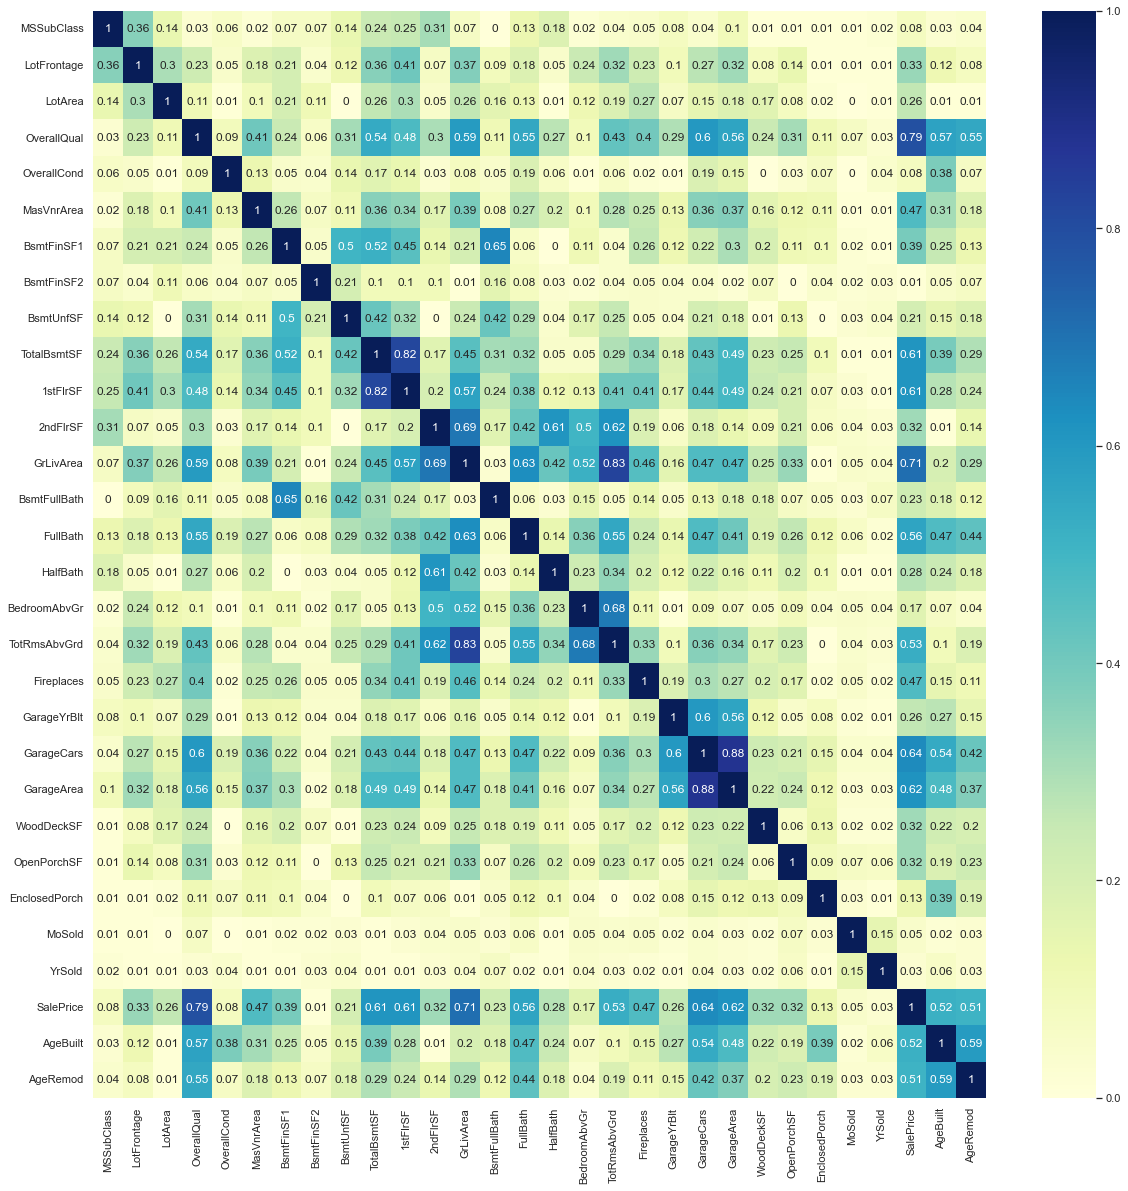

In [58]:
plt.figure(figsize=(20,20))
sns.heatmap(data=abs(round(housing.corr(),2)),annot=True,cmap="YlGnBu")

***GarageArea, GrLivArea, TotalBsmtSF and BsmtFullBath** have high correlation with other variables and hence dropping these variables 

In [59]:
housing.drop("GarageArea",axis=1,inplace=True)

In [60]:
housing.drop("GrLivArea",axis=1,inplace=True)

In [61]:
housing.drop("TotalBsmtSF",axis=1,inplace=True)

In [62]:
housing.drop("BsmtFullBath",axis=1,inplace=True)

In [63]:
cont_cols = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","1stFlrSF","2ndFlrSF","GarageYrBlt","WoodDeckSF","OpenPorchSF","EnclosedPorch","SalePrice","AgeBuilt","AgeRemod"]
cat_cols = ["MSSubClass","MSZoning","LotShape","LandContour","LotConfig","Neighborhood","Condition1","BldgType","HouseStyle","OverallQual","OverallCond","RoofStyle","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","HeatingQC","FullBath","HalfBath","BedroomAbvGr","KitchenQual","TotRmsAbvGrd","Fireplaces","FireplaceQu","GarageType","GarageFinish","GarageCars","GarageQual","Fence","MoSold","YrSold","SaleType","SaleCondition"]

## Outlier Removal

In [64]:
def remove_outliers_df(dataframe,cols):
    outlier_df = dataframe
    for col in cols:
        Q1 = np.percentile(dataframe[col], 25,interpolation = 'midpoint')#First Quartile 25%
        Q3 = np.percentile(dataframe[col], 75,interpolation = 'midpoint')#Third Quartile 75%
        IQR = Q3 - Q1#Inter Quartile range
        #print(col,Q1,Q3,IQR)
        if IQR > 0:
            outlier_df = dataframe[(dataframe[col] > (Q1-1.5*IQR)) & (dataframe[col] < (Q3+1.5*IQR))]#Standard folmular
            print("Removing outliers for",col)
    return outlier_df

def remove_outliers_series(series):
    outlier_series = series
    Q1 = np.percentile(series, 25,interpolation = 'midpoint')#First Quartile 25%
    Q3 = np.percentile(series, 75,interpolation = 'midpoint')#Third Quartile 75%
    IQR = Q3 - Q1#Inter Quartile range
    #print(col,Q1,Q3,IQR)
    if IQR > 0:
        outlier_series = series[(series > (Q1-1.5*IQR)) & (series < (Q3+1.5*IQR))]#Standard folmular
        print("Removing outliers for",col)
    return outlier_series

In [65]:
#kepping the outliers as we have too little data
#housing = remove_outliers_df(housing,cont_cols)

In [66]:
housing

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0             60       RL           65     8450      Reg         Lvl   
1             20       RL           80     9600      Reg         Lvl   
2             60       RL           68    11250      IR1         Lvl   
3             70       RL           60     9550      IR1         Lvl   
4             60       RL           84    14260      IR1         Lvl   
...          ...      ...          ...      ...      ...         ...   
1455          60       RL           62     7917      Reg         Lvl   
1456          20       RL           85    13175      Reg         Lvl   
1457          70       RL           66     9042      Reg         Lvl   
1458          20       RL           68     9717      Reg         Lvl   
1459          20       RL           75     9937      Reg         Lvl   

     LotConfig Neighborhood Condition1 BldgType  ... OpenPorchSF  \
0       Inside      CollgCr       Norm     1Fam  ...          61   
1          FR2      Veenker      Feedr     1Fam  ...           0   
2       Inside      CollgCr       Norm     1Fam  ...          42   
3       Corner      Crawfor       Norm     1Fam  ...          35   
4          FR2      NoRidge       Norm     1Fam  ...          84   
...        ...          ...        ...      ...  ...         ...   
1455    Inside      Gilbert       Norm     1Fam  ...          40   
1456    Inside       NWAmes       Norm     1Fam  ...           0   
1457    Inside      Crawfor       Norm     1Fam  ...          60   
1458    Inside        NAmes       Norm     1Fam  ...           0   
1459    Inside      Edwards       Norm     1Fam  ...          68   

      EnclosedPorch     Fence MoSold YrSold SaleType SaleCondition  SalePrice  \
0                 0  No Fence      2   2008       WD        Normal     208500   
1                 0  No Fence      5   2007       WD        Normal     181500   
2                 0  No Fence      9   2008       WD        Normal     223500   
3               272  No Fence      2   2006       WD       Abnorml     140000   
4                 0  No Fence     12   2008       WD        Normal     250000   
...             ...       ...    ...    ...      ...           ...        ...   
1455              0  No Fence      8   2007       WD        Normal     175000   
1456              0     MnPrv      2   2010       WD        Normal     210000   
1457              0     GdPrv      5   2010       WD        Normal     266500   
1458            112  No Fence      4   2010       WD        Normal     142125   
1459              0  No Fence      6   2008       WD        Normal     147500   

     AgeBuilt AgeRemod  
0           5        5  
1          31       31  
2           7        6  
3          91       36  
4           8        8  
...       ...      ...  
1455        8        7  
1456       32       22  
1457       69        4  
1458       60       14  
1459       43       43  

[1460 rows x 55 columns]

In [67]:
# subset all categorical variables
housing[cat_cols].head()

MSSubClass MSZoning LotShape LandContour LotConfig Neighborhood Condition1  \
0          60       RL      Reg         Lvl    Inside      CollgCr       Norm   
1          20       RL      Reg         Lvl       FR2      Veenker      Feedr   
2          60       RL      IR1         Lvl    Inside      CollgCr       Norm   
3          70       RL      IR1         Lvl    Corner      Crawfor       Norm   
4          60       RL      IR1         Lvl       FR2      NoRidge       Norm   

  BldgType HouseStyle  OverallQual  ...   FireplaceQu GarageType GarageFinish  \
0     1Fam     2Story            7  ...  No Fireplace     Attchd          RFn   
1     1Fam     1Story            6  ...            TA     Attchd          RFn   
2     1Fam     2Story            7  ...            TA     Attchd          RFn   
3     1Fam     2Story            7  ...            Gd     Detchd          Unf   
4     1Fam     2Story            8  ...            TA     Attchd          RFn   

  GarageCars GarageQual     Fence MoSold YrSold SaleType SaleCondition  
0          2         TA  No Fence      2   2008       WD        Normal  
1          2         TA  No Fence      5   2007       WD        Normal  
2          2         TA  No Fence      9   2008       WD        Normal  
3          3         TA  No Fence      2   2006       WD       Abnorml  
4          3         TA  No Fence     12   2008       WD        Normal  

[5 rows x 40 columns]

In [68]:
# convert into dummies - one hot encoding
housing = pd.get_dummies(housing,columns=cat_cols, drop_first=True)

In [69]:
print(housing.columns)

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GarageYrBlt', 'WoodDeckSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=265)


In [70]:
housing.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0           65     8450         196         706           0        150   
1           80     9600           0         978           0        284   
2           68    11250         162         486           0        434   
3           60     9550           0         216           0        540   
4           84    14260         350         655           0        490   

   1stFlrSF  2ndFlrSF  GarageYrBlt  WoodDeckSF  ...  SaleType_ConLI  \
0       856       854         2003           0  ...               0   
1      1262         0         1976         298  ...               0   
2       920       866         2001           0  ...               0   
3       961       756         1998           0  ...               0   
4      1145      1053         2000         192  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 265 columns]

In [71]:
# split into X and y
X = housing.drop("SalePrice",axis=1)
y = housing.SalePrice

In [72]:
X.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0           65     8450         196         706           0        150   
1           80     9600           0         978           0        284   
2           68    11250         162         486           0        434   
3           60     9550           0         216           0        540   
4           84    14260         350         655           0        490   

   1stFlrSF  2ndFlrSF  GarageYrBlt  WoodDeckSF  ...  SaleType_ConLI  \
0       856       854         2003           0  ...               0   
1      1262         0         1976         298  ...               0   
2       920       866         2001           0  ...               0   
3       961       756         1998           0  ...               0   
4      1145      1053         2000         192  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 264 columns]

In [73]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

## Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [74]:
# split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Initial linear regression model with all variables and without scalling

In [75]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [76]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

165204.63485758603
[-1.36511436e+02  4.46380940e-01  7.47725563e+00 -4.29586799e+00
  6.37303280e+00 -8.02296271e+00  5.12476641e+01  6.18454257e+01
 -5.90163799e+01  1.06912646e+01  4.39379454e+00  1.05390918e+01
 -2.28235913e+02 -1.11328167e+02 -3.32337926e+03 -1.49210461e+04
 -6.34571179e+02 -6.47828543e+03 -1.41461503e+04 -9.00812249e+03
 -9.73436829e+03  3.93338682e+03 -1.53087729e+04 -1.08399210e+04
 -1.99700290e+04 -3.20107854e+04 -1.57787036e+04 -1.11647835e+04
  2.49361124e+04  2.87563462e+04  3.25453069e+04  3.10946032e+04
  1.82620300e+03 -7.83444088e+03  2.95736413e+03  1.50789321e+04
  1.92466444e+04  1.75170880e+04  7.65904950e+03 -1.18195848e+04
 -8.51105569e+03 -2.18148701e+03  7.04332196e+03  9.60714296e+03
  1.20408637e+04  2.44517581e+04  1.55327535e+04  4.45927049e+04
 -6.02251942e+03  1.84313231e+04  5.87851096e+03  7.00216217e+02
  2.74553456e+03  9.32677440e+03  1.83746579e+04  1.03912460e+04
  5.15450580e+04  4.01363894e+04  1.80847123e+03  1.30647259e+04
  8.91

In [77]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9163704216081965
0.8382765959741089
533615150445.354
455851785378.68677
522639716.4009344
1040757500.8645817


## Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use StandardScaler

In [78]:
for col in X_train.columns:
    if X_train[col].max() > 1 or X_train[col].min() <0:
        print(col,"----",X_train[col].min(),'||',X_train[col].max())

LotFrontage ---- 21 || 313
LotArea ---- 1477 || 215245
MasVnrArea ---- 0 || 1600
BsmtFinSF1 ---- 0 || 5644
BsmtFinSF2 ---- 0 || 1474
BsmtUnfSF ---- 0 || 2336
1stFlrSF ---- 372 || 4692
2ndFlrSF ---- 0 || 2065
GarageYrBlt ---- 0 || 2010
WoodDeckSF ---- 0 || 857
OpenPorchSF ---- 0 || 523
EnclosedPorch ---- 0 || 552
AgeBuilt ---- 0 || 136
AgeRemod ---- -1 || 60


In [79]:
for col in X_train.columns:
    if X_train[col].max() > 1 or X_train[col].min() <0:
        print('"',col,'",',end="",sep="")

"LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","1stFlrSF","2ndFlrSF","GarageYrBlt","WoodDeckSF","OpenPorchSF","EnclosedPorch","AgeBuilt","AgeRemod",

In [80]:
scalerCol = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","1stFlrSF","2ndFlrSF","GarageYrBlt","WoodDeckSF","OpenPorchSF","EnclosedPorch","AgeBuilt","AgeRemod"]

In [81]:
scalerX = StandardScaler()
scalery = StandardScaler()

In [82]:
# scaling the features - necessary before using Ridge or Lasso
# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
X_train[scalerCol] = scalerX.fit_transform(X_train[scalerCol])

In [83]:
y_train

210      98000
318     260000
239     113000
986     117000
1416    122500
         ...  
1009    102000
802     189000
53      385000
350     318061
79      110000
Name: SalePrice, Length: 1021, dtype: int64

In [84]:
y_train = pd.DataFrame(y_train)

In [85]:
y_train

SalePrice
210       98000
318      260000
239      113000
986      117000
1416     122500
...         ...
1009     102000
802      189000
53       385000
350      318061
79       110000

[1021 rows x 1 columns]

In [86]:
y_train.SalePrice = scalery.fit_transform(y_train)

In [87]:
y_train = y_train.SalePrice

In [88]:
y_train

210    -1.042855
318     1.006390
239    -0.853110
986    -0.802511
1416   -0.732938
          ...   
1009   -0.992256
802     0.108264
53      2.587597
350     1.740841
79     -0.891059
Name: SalePrice, Length: 1021, dtype: float64

In [89]:
X_test[scalerCol] = scalerX.transform(X_test[scalerCol])

In [90]:
y_test = pd.DataFrame(y_test)

In [91]:
y_test.SalePrice = scalery.transform(y_test)

In [92]:
y_test = y_test.SalePrice

In [93]:
X_train

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
210     -0.115302 -0.473765   -0.558025    0.043512   -0.293313  -0.374367   
318      0.926898 -0.056845    0.809137    1.160345   -0.293313  -0.454644   
239     -0.794998 -0.169324   -0.558025   -0.761296   -0.293313   0.171964   
986     -0.477806 -0.502297   -0.558025   -0.963574   -0.293313  -0.175904   
1416    -0.432493  0.082905   -0.558025   -0.963574   -0.293313   0.475233   
...           ...       ...         ...         ...         ...        ...   
1009    -0.432493 -0.435334   -0.558025   -0.963574   -0.293313   0.990346   
802     -0.296554 -0.221924   -0.558025    0.430853   -0.293313  -1.079023   
53      -0.069989  3.861098   -0.558025    2.931352   -0.293313  -1.186059   
350     -0.069989 -0.258706    1.375227   -0.963574   -0.293313   2.910309   
79      -0.432493 -0.004439   -0.558025   -0.963574   -0.293313  -0.276251   

      1stFlrSF  2ndFlrSF  GarageYrBlt  WoodDeckSF  ...  SaleType_ConLI  \
210  -0.765065 -0.787597    -4.069183   -0.743160  ...               0   
318   0.511914  2.140556     0.276109    1.989482  ...               0   
239  -0.930972  0.795996     0.180177   -0.743160  ...               0   
986  -0.420683  0.669584     0.182357    2.423490  ...               0   
1416  0.195183  1.611926     0.228143   -0.743160  ...               0   
...        ...       ...          ...         ...  ...             ...   
1009 -0.403087 -0.787597    -4.069183   -0.743160  ...               0   
802  -1.106933  0.885633     0.302273   -0.453821  ...               0   
53    1.693370 -0.787597     0.249946    6.144704  ...               0   
350   1.761241 -0.787597     0.306633    0.944648  ...               0   
79   -1.222565  0.471923     0.217242   -0.148408  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
210                0             0             0            1   
318                0             0             0            1   
239                0             0             0            1   
986                0             0             0            1   
1416               0             0             0            1   
...              ...           ...           ...          ...   
1009               0             0             0            1   
802                0             0             0            1   
53                 0             0             0            1   
350                0             1             0            0   
79                 0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
210                       0                     0                     0   
318                       0                     0                     0   
239                       0                     0                     0   
986                       0                     0                     0   
1416                      0                     0                     0   
...                     ...                   ...                   ...   
1009                      0                     0                     0   
802                       0                     0                     0   
53                        0                     0                     0   
350                       0                     0                     0   
79                        0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
210                      1                      0  
318                      1                      0  
239                      1                      0  
986                      1                      0  
1416                     1                      0  
...                    ...                    ...  
1009                     1                      0  
802                      1                      0  
53                       1    

In [94]:
X_test

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1436    -0.432493 -0.144189   -0.558025    0.361992   -0.293313  -0.704396   
57       0.881585  0.112505   -0.558025   -0.963574   -0.293313   0.660317   
780     -0.296554 -0.253368   -0.355087   -0.963574   -0.293313   1.500998   
382      0.428455 -0.120412   -0.558025   -0.963574   -0.293313   0.836481   
1170     0.292515 -0.058786   -0.558025    0.159714   -0.293313   0.022559   
...           ...       ...         ...         ...         ...        ...   
509      0.473768 -0.085959    0.146918    1.168952   -0.293313  -1.145920   
555     -0.523119 -0.398455   -0.558025   -0.963574   -0.293313   0.956897   
399     -0.205928 -0.229106   -0.023977    0.783763   -0.293313  -0.633038   
545     -0.024676  0.325235    0.392580    1.192623    0.889608  -1.257417   
266      0.020637  0.069997   -0.558025    0.572878   -0.293313  -1.061183   

      1stFlrSF  2ndFlrSF  GarageYrBlt  WoodDeckSF  ...  SaleType_ConLI  \
1436 -0.765065 -0.787597     0.234684   -0.743160  ...               0   
57   -0.775120  1.189021     0.300092   -0.743160  ...               0   
780   0.212779 -0.787597     0.280470    1.025020  ...               0   
382  -0.576535  1.184425     0.304453    0.414194  ...               0   
1170 -0.126576 -0.787597     0.241225    0.888388  ...               0   
...        ...       ...          ...         ...  ...             ...   
509  -0.320133 -0.787597     0.201980    1.057169  ...               0   
555  -0.302537 -0.787597     0.121310   -0.743160  ...               0   
399  -0.141658  0.219099     0.306633   -0.743160  ...               0   
545   0.524482  1.064908     0.265208   -0.743160  ...               0   
266  -0.920917  0.841964     0.284830    0.020372  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1436               0             0             0            1   
57                 0             0             0            1   
780                0             0             0            1   
382                0             0             0            1   
1170               0             0             0            1   
...              ...           ...           ...          ...   
509                0             0             0            1   
555                0             0             0            1   
399                0             0             0            1   
545                0             0             0            1   
266                0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1436                      0                     0                     0   
57                        0                     0                     0   
780                       0                     0                     0   
382                       0                     0                     0   
1170                      0                     0                     0   
...                     ...                   ...                   ...   
509                       0                     0                     0   
555                       0                     0                     0   
399                       0                     0                     0   
545                       0                     0                     0   
266                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
1436                     1                      0  
57                       1                      0  
780                      1                      0  
382                      1                      0  
1170                     1                      0  
...                    ...                    ...  
509                      1                      0  
555                      1                      0  
399                      1    

In [95]:
y_train

210    -1.042855
318     1.006390
239    -0.853110
986    -0.802511
1416   -0.732938
          ...   
1009   -0.992256
802     0.108264
53      2.587597
350     1.740841
79     -0.891059
Name: SalePrice, Length: 1021, dtype: float64

In [96]:
y_test

1436   -0.758237
57      0.203137
780    -0.056181
382     0.418181
1170   -0.119430
          ...   
509    -0.707639
555    -0.853110
399     0.766046
545     0.614250
266     0.057665
Name: SalePrice, Length: 438, dtype: float64

## 3. Model Building and Evaluation

## Linear Regression

Let's now try predicting car prices, a dataset using linear regression.

In [97]:
#lets create a custom method to create a linear regresion model which prints the statistics and the VIF values and returns the model
def linearRegression(X_train,y_train):
    # Adding a constant variable 
    X_train_rfe = sm.add_constant(X_train)

    #Running the linear model
    lm = sm.OLS(y_train,X_train_rfe).fit()

    #Let's see the summary of our linear model
    print(lm.summary())
    
    print("*********************************************************\n")
    return X_train_rfe,lm

In [98]:
# Uncomment the below code to see the r2 scores for different models using RFE feature elimination
# Instantiate
#lm = LinearRegression()
# Fit a line
#lm.fit(X_train, y_train)

#for i in range(10,len(X_train.columns),10):
#    rfe = RFE(lm,i)# running RFE
#    rfe = rfe.fit(X_train, y_train)
#    col = X_train.columns[rfe.support_]
#    X_train_rfe = X_train[col]
#    rfelm = LinearRegression()
#    rfelm.fit(X_train_rfe, y_train)
#    y_pred_train_rfe = rfelm.predict(X_train_rfe)
#    print(i,'--',r2_score(y_train, y_pred_train_rfe))

* 10 -- 0.719288262691425
* 20 -- 0.7296565198737197
* 30 -- 0.7515555727988679
* 40 -- 0.7739486694086604
* 50 -- 0.7779924052391525
* 60 -- 0.8124832803377754
* 70 -- 0.8395251192154338
* 80 -- 0.8592209373843074
* 90 -- 0.8670347980667817
* 100 -- 0.8877584951175751
* 110 -- 0.895755408754273
* 120 -- 0.8998544021883831
* 130 -- 0.9023771225513258
* 140 -- 0.9053777694737639
* 150 -- 0.9069294492769809
* 160 -- 0.9079224011252361
* 170 -- 0.9095241509966254
* 180 -- 0.9105653851073472
* 190 -- 0.9131931400606351
* 200 -- 0.9139741085520007
* 210 -- 0.9147858320470172
* 220 -- 0.9156015378444414
* 230 -- 0.9157627072940231
* 240 -- 0.9159243327220077
* 250 -- 0.871505436829025
* 260 -- 0.9163397610968603

We can see no significant increase in r2 values after 120 features

In [99]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

rfe = RFE(lm,120)# running RFE
rfe = rfe.fit(X_train, y_train)

In [100]:
col = X_train.columns[rfe.support_]

In [101]:
# Creating X_test dataframe with RFE selected variables
X_train = X_train[col]

In [102]:
X_train_rfe,lm = linearRegression(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     80.00
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:16:54   Log-Likelihood:                -274.01
No. Observations:                1021   AIC:                             756.0
Df Residuals:                     917   BIC:                             1269.
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [103]:
lm.params.sum()

5.4815985195693555

In [104]:
X_test_rfe = sm.add_constant(X_test[col])

In [105]:
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8998546083381512
0.8384142080679429
102.24844488674762
72.88051871511871
0.1001453916618488
0.1663938783450199


The model seems to be overfit as the r2 for the test data is less than the r2 for the training data

Lets use L1 and L2 regularizations to reduce the complexity and overfitting in the model

## Lets check for Linear Regrssion Assumptions are true or not

### Assumption of Normally Distributed Error Terms

Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

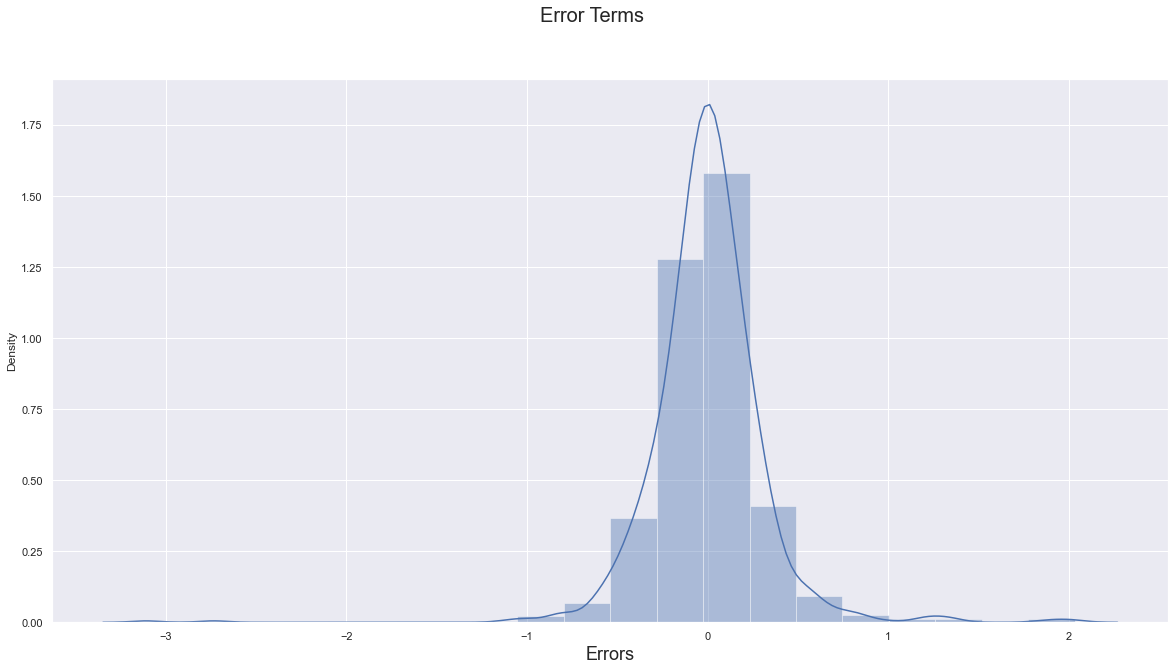

In [106]:
# Plot the histogram of the error terms
sns.set_theme(color_codes=True)
plt.figure(figsize=(20,10))
sns.distplot((y_train - y_pred_train), bins = 20)
plt.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()# X-label

### Assumption of Error Terms Being Independent

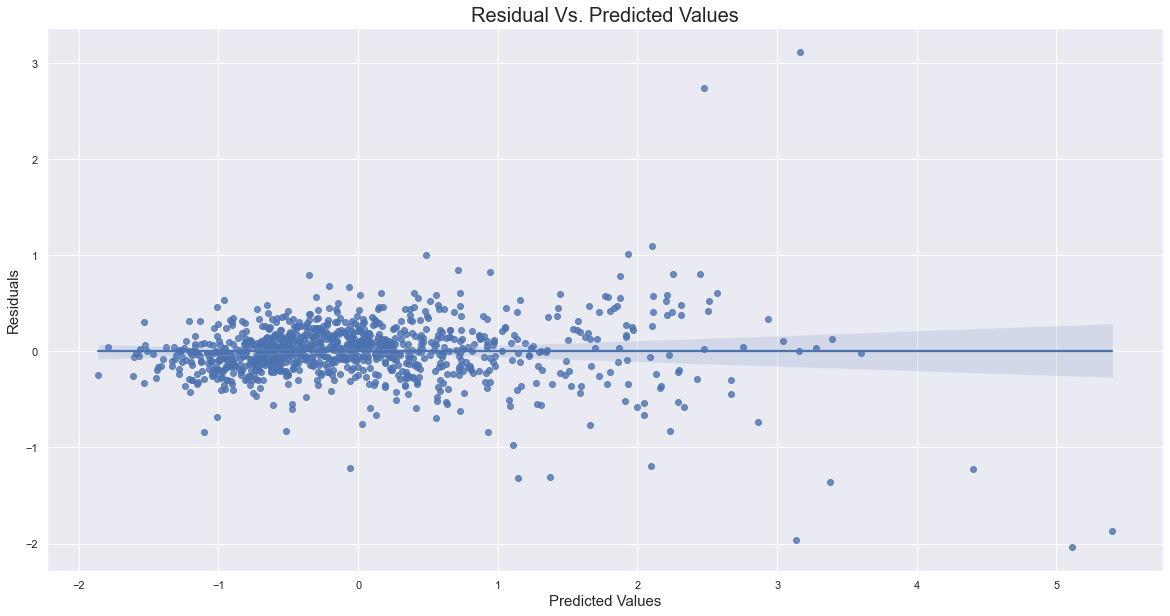

In [107]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(20,10))
sns.regplot(x=y_pred_train, y= y_pred_train - y_train)
plt.title('Residual Vs. Predicted Values', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

#### We can clearly see that as the predected values increase the residual error increases

### Homoscedasticity

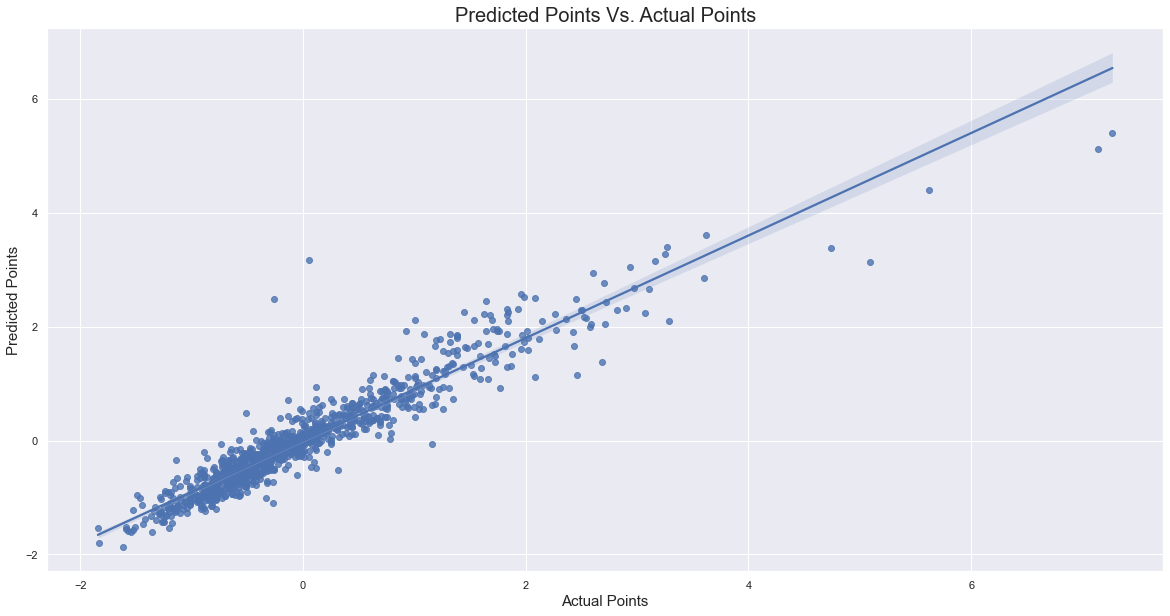

In [108]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(20,10))
sns.regplot(x=y_train, y=y_pred_train)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [109]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [110]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 5.0}


In [111]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 5.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)

Ridge(alpha=5.0)

In [112]:
print(ridge.coef_)

[ 0.          0.27593808  0.24813015  0.01308404 -0.08855966 -0.1600802
 -0.08541442  0.10795974  0.10818778  0.15579879  0.01840039  0.17453984
  0.25398886  0.20262244  0.14781293  0.16921216  0.2433413  -0.17339659
  0.13859898  0.53909751  0.3449502   0.10787393  0.313458    0.2497893
  0.16588151  0.16153568  0.1445862   0.15899486  0.11233913 -0.08541442
 -0.08855966 -0.08523522 -0.18442338 -0.23303707 -0.24049004 -0.19837975
 -0.05600034  0.18273008  0.49438407  0.46890763  0.04185555 -0.16836451
 -0.13243741 -0.03185014  0.03243383  0.09178098  0.12580082  0.18923686
 -0.0209042   0.03093562  0.00054951  0.10777558  0.07814733 -0.00794314
  0.14638706 -0.01834808 -0.04992333 -0.00794314 -0.01834808  0.
 -0.03250922 -0.23749547 -0.13117388  0.          0.08708991  0.05546401
 -0.33185724 -0.28882924 -0.13437792 -0.36751825  0.14361202 -0.13437792
 -0.14845597  0.1729642   0.28869177 -0.13437792 -0.16390483 -0.06125606
 -0.0207252   0.46546936 -0.20974177  0.0770353  -0.27743571 

In [113]:
#sum of the coefficents
ridge.coef_.sum()

2.4900634394422707

lets look at the number of feature eliminated by making the coefficents 0

In [114]:
(ridge.coef_ != 0).sum()

118

In [115]:
len(ridge.coef_)

121

In [116]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8922613068030574
0.8505322646900685
110.00120575407841
67.41487571594307
0.10773869319694261
0.1539152413606006


## Lasso Regularization

In [117]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [118]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [119]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.001)

In [120]:
lasso.coef_

array([ 0.00000000e+00,  2.74343564e-01,  2.50226041e-01,  0.00000000e+00,
       -9.08894044e-02, -1.55727629e-01, -4.58996744e-02,  0.00000000e+00,
        4.80299692e-02,  1.39163141e-01, -0.00000000e+00,  1.56223846e-01,
        2.65649215e-01,  1.97879725e-01,  1.48440292e-01,  1.68927298e-01,
        2.69987942e-01, -1.73255786e-01,  1.49621723e-01,  5.92741874e-01,
        3.52085918e-01,  1.07299795e-01,  3.93005502e-01,  2.49846860e-01,
        1.55839784e-01,  1.47432209e-01,  1.02970326e-01,  1.34260289e-01,
        0.00000000e+00, -7.46049331e-02, -4.90261822e-02, -0.00000000e+00,
       -2.64651432e-03, -5.66686097e-02, -4.70861759e-02,  0.00000000e+00,
        1.55418897e-01,  4.11654995e-01,  8.30236844e-01,  8.33928411e-01,
        0.00000000e+00, -1.75765408e-01, -1.56367585e-01, -6.68113284e-02,
        0.00000000e+00,  6.41850602e-02,  9.07704294e-02,  1.23441524e-01,
       -1.23604247e-02,  0.00000000e+00,  0.00000000e+00,  5.99678821e-02,
        0.00000000e+00, -

In [121]:
#sum of the coefficents
lasso.coef_.sum()

3.8738616932031724

lets look at the number of feature eliminated by making the coefficents 0

In [122]:
(lasso.coef_ != 0).sum()

81

In [123]:
len(lasso.coef_)

121

In [124]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8926323709303161
0.8498319184361488
109.62234928014729
67.7307549628469
0.10736762906968393
0.15463642685581486


In [125]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

round(final_metric,2).T

0                1            2           3  \
Metric             R2 Score (Train)  R2 Score (Test)  RSS (Train)  RSS (Test)   
Linear Regression               0.9             0.84       102.25       72.88   
Ridge Regression               0.89             0.85        110.0       67.41   
Lasso Regression               0.89             0.85       109.62       67.73   

                             4           5  
Metric             MSE (Train)  MSE (Test)  
Linear Regression         0.32        0.41  
Ridge Regression          0.33        0.39  
Lasso Regression          0.33        0.39

In [126]:
betas = pd.DataFrame(index=X_train_rfe.columns)

betas.rows = X.columns

betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

pd.set_option('display.max_rows', None)
betas.head(68)

Linear     Ridge     Lasso
const                -6.842972e-01  0.000000  0.000000
1stFlrSF              2.654406e-01  0.275938  0.274344
2ndFlrSF              2.365792e-01  0.248130  0.250226
MSSubClass_40        -1.879900e-01  0.013084  0.000000
MSSubClass_90        -9.925910e-02 -0.088560 -0.090889
MSSubClass_160       -2.057218e-01 -0.160080 -0.155728
MSSubClass_190       -7.987126e-02 -0.085414 -0.045900
MSZoning_FV           3.961445e-01  0.107960  0.000000
MSZoning_RH           4.933635e-01  0.108188  0.048030
MSZoning_RL           5.172145e-01  0.155799  0.139163
MSZoning_RM           3.927994e-01  0.018400 -0.000000
LandContour_HLS       2.729120e-01  0.174540  0.156224
LandContour_Low       4.335002e-01  0.253989  0.265649
LandContour_Lvl       2.954950e-01  0.202622  0.197880
Neighborhood_ClearCr  2.535886e-01  0.147813  0.148440
Neighborhood_CollgCr  2.366342e-01  0.169212  0.168927
Neighborhood_Crawfor  3.452009e-01  0.243341  0.269988
Neighborhood_Edwards -1.497284e-01 -0.173397 -0.173256
Neighborhood_Gilbert  2.107365e-01  0.138599  0.149622
Neighborhood_NoRidge  7.107972e-01  0.539098  0.592742
Neighborhood_NridgHt  3.982157e-01  0.344950  0.352086
Neighborhood_SawyerW  1.840008e-01  0.107874  0.107300
Neighborhood_Somerst  4.544612e-01  0.313458  0.393006
Neighborhood_StoneBr  3.697816e-01  0.249789  0.249847
Neighborhood_Veenker  2.483356e-01  0.165882  0.155840
Condition1_Norm       1.746700e-01  0.161536  0.147432
Condition1_PosA       2.727762e-01  0.144586  0.102970
Condition1_RRAn       2.230089e-01  0.158995  0.134260
Condition1_RRNn       3.214391e-01  0.112339  0.000000
BldgType_2fmCon      -7.987126e-02 -0.085414 -0.074605
BldgType_Duplex      -9.925910e-02 -0.088560 -0.049026
OverallQual_2        -1.048936e-01 -0.085235 -0.000000
OverallQual_3        -2.205312e-01 -0.184423 -0.002647
OverallQual_4        -2.543768e-01 -0.233037 -0.056669
OverallQual_5        -2.559887e-01 -0.240490 -0.047086
OverallQual_6        -1.995647e-01 -0.198380  0.000000
OverallQual_7        -5.271380e-02 -0.056000  0.155419
OverallQual_8         1.916587e-01  0.182730  0.411655
OverallQual_9         5.911754e-01  0.494384  0.830237
OverallQual_10        6.449683e-01  0.468908  0.833928
OverallCond_2         3.424427e-01  0.041856  0.000000
OverallCond_3        -2.085761e-01 -0.168365 -0.175765
OverallCond_4        -1.545516e-01 -0.132437 -0.156368
OverallCond_5        -7.283985e-02 -0.031850 -0.066811
OverallCond_6         1.128623e-02  0.032434  0.000000
OverallCond_7         6.775036e-02  0.091781  0.064185
OverallCond_8         9.977870e-02  0.125801  0.090770
OverallCond_9         2.544431e-01  0.189237  0.123442
RoofStyle_Gable       1.947087e-01 -0.020904 -0.012360
RoofStyle_Gambrel     2.721736e-01  0.030936  0.000000
RoofStyle_Hip         1.950337e-01  0.000550  0.000000
RoofStyle_Mansard     4.071541e-01  0.107776  0.059968
RoofStyle_Shed        6.653860e-01  0.078147  0.000000
Exterior1st_AsphShn   1.719797e-03 -0.007943 -0.000000
Exterior1st_BrkFace   1.630650e-01  0.146387  0.143775
Exterior1st_CBlock   -6.727745e-02 -0.018348 -0.000000
Exterior1st_ImStucc  -3.221018e-01 -0.049923 -0.000000
Exterior2nd_AsphShn   1.719797e-03 -0.007943 -0.000000
Exterior2nd_CBlock   -6.727745e-02 -0.018348 -0.000000
Exterior2nd_Other    -4.665234e-16  0.000000  0.000000
Exterior2nd_Stone    -1.220219e-01 -0.032509 -0.000000
Exterior2nd_Stucco   -2.922309e-01 -0.237495 -0.228212
Exterior2nd_Wd Shng  -1.720040e-01 -0.131174 -0.120331
ExterCond_Po         -5.182723e-16  0.000000  0.000000
Foundation_Stone      2.879904e-01  0.087090  0.000000
Foundation_Wood       2.701914e-01  0.055464  0.000000
BsmtQual_Fa          -4.226053e-01 -0.331857 -0.371310
BsmtQual_Gd          -3.559802e-01 -0.288829 -0.297449

* ### R2 score on the test data have improved using L1 and L2 regularizations
* ### RSS on the test data have reduced using L1 and L2 regularizations (lower the values better)
* ### MSE on the test data have reduced using L1 and L2 regularizations (lower the values better)

In [127]:
#sum of coefficents
betas.sum()

Linear    5.481599
Ridge     2.490063
Lasso     3.873862
dtype: float64

In [128]:
#Number of variables in model after feature elimination
betas[betas!=0].count()

Linear    121
Ridge     118
Lasso      81
dtype: int64

In [129]:
betas = pd.DataFrame(index=X_train_rfe.columns)

betas.rows = X.columns

betas['Ridge'] = abs(ridge.coef_)
betas['Lasso'] = abs(lasso.coef_)

pd.set_option('display.max_rows', None)
print(betas.sort_values(by="Ridge",ascending=False).head(10))
print(betas.sort_values(by="Ridge",ascending=False).head(10).index)

print(betas.sort_values(by="Lasso",ascending=False).head(10))
print(betas.sort_values(by="Lasso",ascending=False).head(10).index)

                         Ridge     Lasso
Neighborhood_NoRidge  0.539098  0.592742
OverallQual_9         0.494384  0.830237
OverallQual_10        0.468908  0.833928
FullBath_3            0.465469  0.530678
BsmtQual_TA           0.367518  0.373752
TotRmsAbvGrd_11       0.347359  0.505044
Neighborhood_NridgHt  0.344950  0.352086
BsmtQual_Fa           0.331857  0.371310
Neighborhood_Somerst  0.313458  0.393006
Fireplaces_3          0.306188  0.442772
Index(['Neighborhood_NoRidge', 'OverallQual_9', 'OverallQual_10', 'FullBath_3',
       'BsmtQual_TA', 'TotRmsAbvGrd_11', 'Neighborhood_NridgHt', 'BsmtQual_Fa',
       'Neighborhood_Somerst', 'Fireplaces_3'],
      dtype='object')
                         Ridge     Lasso
OverallQual_10        0.468908  0.833928
OverallQual_9         0.494384  0.830237
Neighborhood_NoRidge  0.539098  0.592742
FullBath_3            0.465469  0.530678
TotRmsAbvGrd_11       0.347359  0.505044
Fireplaces_3          0.306188  0.442772
OverallQual_8         0.182730  

In [130]:
Top5_Ridge = ['Neighborhood_NoRidge', 'OverallQual_9', 'OverallQual_10', 'FullBath_3','BsmtQual_TA']
Top5_Lasso = ['OverallQual_10', 'OverallQual_9', 'Neighborhood_NoRidge', 'FullBath_3','TotRmsAbvGrd_11']

# Question : What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 

In [131]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10.0
ridge_double = Ridge(alpha=alpha)

ridge_double.fit(X_train_rfe, y_train)

Ridge(alpha=10.0)

In [132]:
ridge_double.coef_

array([ 0.        ,  0.28561585,  0.25575697,  0.01709748, -0.08827171,
       -0.13317914, -0.0861093 ,  0.09570728,  0.05580727,  0.11420608,
       -0.02914784,  0.13439202,  0.19684234,  0.16415982,  0.10768923,
        0.13616656,  0.19448207, -0.17849968,  0.10302731,  0.44659545,
        0.31476913,  0.07187373,  0.2457546 ,  0.18347409,  0.12437492,
        0.16029453,  0.09967307,  0.13001345,  0.06624025, -0.0861093 ,
       -0.08827171, -0.05730741, -0.15531934, -0.21470396, -0.22752249,
       -0.19300597, -0.05524123,  0.17747881,  0.43032418,  0.37872665,
        0.01817026, -0.14651764, -0.13004635, -0.02493983,  0.02624762,
        0.0835577 ,  0.1155267 ,  0.14143076, -0.02550245,  0.01573333,
        0.00758193,  0.06324071,  0.03670495, -0.00730663,  0.12617254,
       -0.01022301, -0.02550651, -0.00730663, -0.01022301,  0.        ,
       -0.0157149 , -0.20445207, -0.11074661,  0.        ,  0.04931926,
        0.02662494, -0.26038788, -0.24676034, -0.11661869, -0.33

In [133]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_double.predict(X_train_rfe)
y_pred_test = ridge_double.predict(X_test_rfe)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

0.8850590239336584
0.8508014700382006
117.35473656373478
67.29345522978423
0.1149409760663416
0.15363802563877677


In [134]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = 0.002

lasso_double = Lasso(alpha=alpha)
        
lasso_double.fit(X_train_rfe, y_train) 

Lasso(alpha=0.002)

In [135]:
lasso_double.coef_

array([ 0.00000000e+00,  2.73562294e-01,  2.47662453e-01,  0.00000000e+00,
       -4.73321440e-02, -1.14712014e-01, -1.37197584e-02,  0.00000000e+00,
        0.00000000e+00,  1.26845663e-01, -1.76321312e-02,  7.28946259e-02,
        2.05102629e-01,  1.38071867e-01,  4.63622138e-02,  1.11827612e-01,
        2.16266873e-01, -1.91016682e-01,  9.64047242e-02,  5.06984170e-01,
        3.01451478e-01,  2.96623302e-02,  3.08089200e-01,  1.13593266e-01,
        4.06965305e-02,  1.38620856e-01,  0.00000000e+00,  7.24047489e-02,
        0.00000000e+00, -7.38201556e-02, -8.71926981e-02, -0.00000000e+00,
       -0.00000000e+00, -5.65944012e-02, -5.10858003e-02, -0.00000000e+00,
        1.54235120e-01,  4.20404367e-01,  8.40617060e-01,  8.16993172e-01,
        0.00000000e+00, -1.15834955e-01, -1.29415608e-01, -5.02196139e-02,
        0.00000000e+00,  5.85982637e-02,  7.53317083e-02,  3.69064132e-03,
       -1.34647338e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [136]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_double.predict(X_train_rfe)
y_pred_test = lasso_double.predict(X_test_rfe)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric5.append(mse_test_lr**0.5)

0.8829903388035023
0.850346483940601
119.46686408162412
67.49866895807523
0.11700966119649767
0.15410655013259184


In [137]:
betas = pd.DataFrame(index=X_train_rfe.columns)

betas.rows = X.columns

betas['Ridge'] = abs(ridge_double.coef_)
betas['Lasso'] = abs(lasso_double.coef_)

pd.set_option('display.max_rows', None)
print(betas.sort_values(by="Ridge",ascending=False).head(10))
print(betas.sort_values(by="Ridge",ascending=False).head(10).index)
print(betas.sort_values(by="Lasso",ascending=False).head(10))
print(betas.sort_values(by="Lasso",ascending=False).head(10).index)

                         Ridge     Lasso
Neighborhood_NoRidge  0.446595  0.506984
OverallQual_9         0.430324  0.840617
FullBath_3            0.393552  0.496926
OverallQual_10        0.378727  0.816993
BsmtQual_TA           0.337015  0.331769
Neighborhood_NridgHt  0.314769  0.301451
BsmtExposure_Gd       0.287828  0.276494
1stFlrSF              0.285616  0.273562
KitchenQual_TA        0.282519  0.250262
BsmtQual_Fa           0.260388  0.291325
Index(['Neighborhood_NoRidge', 'OverallQual_9', 'FullBath_3', 'OverallQual_10',
       'BsmtQual_TA', 'Neighborhood_NridgHt', 'BsmtExposure_Gd', '1stFlrSF',
       'KitchenQual_TA', 'BsmtQual_Fa'],
      dtype='object')
                         Ridge     Lasso
OverallQual_9         0.430324  0.840617
OverallQual_10        0.378727  0.816993
Neighborhood_NoRidge  0.446595  0.506984
FullBath_3            0.393552  0.496926
OverallQual_8         0.177479  0.420404
TotRmsAbvGrd_11       0.252978  0.355101
BsmtQual_TA           0.337015  0.331769
G

In [138]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
rg_metric_double = pd.Series(metric4, name = 'Ridge Regression Double Lambda')
ls_metric_double = pd.Series(metric5, name = 'Lasso Regression Double Lambda')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric,rg_metric_double,ls_metric_double], axis = 1)

round(final_metric,2).T

0                1  \
Metric                          R2 Score (Train)  R2 Score (Test)   
Linear Regression                            0.9             0.84   
Ridge Regression                            0.89             0.85   
Lasso Regression                            0.89             0.85   
Ridge Regression Double Lambda              0.89             0.85   
Lasso Regression Double Lambda              0.88             0.85   

                                          2           3            4  \
Metric                          RSS (Train)  RSS (Test)  MSE (Train)   
Linear Regression                    102.25       72.88         0.32   
Ridge Regression                      110.0       67.41         0.33   
Lasso Regression                     109.62       67.73         0.33   
Ridge Regression Double Lambda       117.35       67.29         0.34   
Lasso Regression Double Lambda       119.47        67.5         0.34   

                                         5  
Metric                          MSE (Test)  
Linear Regression                     0.41  
Ridge Regression                      0.39  
Lasso Regression                      0.39  
Ridge Regression Double Lambda        0.39  
Lasso Regression Double Lambda        0.39

# Question : After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [139]:
#Fitting Ridge model for alpha = 5 and printing coefficients which have been penalised
alpha = 5.0
ridge_drop5 = Ridge(alpha=alpha)

ridge_drop5.fit(X_train_rfe.drop(Top5_Ridge,axis=1), y_train)

Ridge(alpha=5.0)

In [140]:
ridge_drop5.coef_

array([ 0.00000000e+00,  3.46771104e-01,  3.39405624e-01,  2.35243945e-02,
       -1.10852487e-01, -1.90019625e-01, -1.18735847e-01,  1.50943889e-01,
        1.12649502e-01,  1.67290690e-01,  3.13337624e-02,  1.96563741e-01,
        2.39779406e-01,  2.23760878e-01,  1.21383084e-01,  1.43768517e-01,
        2.03655917e-01, -1.67210263e-01,  9.77520220e-02,  3.77550007e-01,
        7.50099420e-02,  2.73606126e-01,  2.44484321e-01,  1.49192787e-01,
        2.14756211e-01,  1.04808463e-01,  1.88276999e-01,  1.76772983e-01,
       -1.18735847e-01, -1.10852487e-01, -1.27508791e-01, -3.27085035e-01,
       -4.61152297e-01, -4.97471475e-01, -4.68893019e-01, -3.38143738e-01,
       -8.75033984e-02,  5.25888663e-02, -1.64393174e-01, -1.58454486e-01,
        4.59882668e-04,  3.01301872e-02,  8.35317954e-02,  1.31641852e-01,
        2.05086005e-01,  8.60194631e-03,  2.45070794e-02,  6.28912713e-02,
        1.03826865e-01,  6.21343191e-02, -1.17566510e-02,  1.02905073e-01,
       -1.62871530e-02,  

In [141]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_drop5.predict(X_train_rfe.drop(Top5_Ridge,axis=1))
y_pred_test = ridge_drop5.predict(X_test_rfe.drop(Top5_Ridge,axis=1))

metric6 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric6.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric6.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric6.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric6.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric6.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric6.append(mse_test_lr**0.5)

0.8675962598219661
0.8354298638760544
135.18421872177262
74.22655632231584
0.1324037401780339
0.16946702356693116


In [142]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = 0.001

lasso_drop5 = Lasso(alpha=alpha)
        
lasso_drop5.fit(X_train_rfe.drop(Top5_Ridge,axis=1), y_train) 

Lasso(alpha=0.001)

In [143]:
lasso_drop5.coef_

array([ 0.00000000e+00,  3.38735032e-01,  3.33916994e-01,  0.00000000e+00,
       -1.54166532e-01, -1.87106114e-01, -1.29920107e-01,  5.76679692e-02,
        4.71210884e-02,  1.36790790e-01, -0.00000000e+00,  1.67598395e-01,
        2.32797836e-01,  2.12623717e-01,  1.07409482e-01,  1.14649216e-01,
        2.09591849e-01, -1.67377984e-01,  7.49020447e-02,  3.32255279e-01,
        4.34244598e-02,  2.94430399e-01,  2.00532584e-01,  1.06101448e-01,
        1.97170716e-01,  2.32979012e-02,  1.65020656e-01,  6.90168344e-02,
       -6.82154950e-02, -4.34546964e-02, -2.09365104e-01, -6.75837989e-01,
       -7.60054190e-01, -7.65292475e-01, -7.22296087e-01, -5.66371651e-01,
       -2.71084352e-01,  0.00000000e+00, -1.83700171e-01, -1.66843029e-01,
       -3.73926419e-02,  0.00000000e+00,  5.43367848e-02,  8.93165297e-02,
        1.62290448e-01, -3.60476259e-02,  0.00000000e+00,  7.76917533e-04,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  9.33166371e-02,
       -0.00000000e+00,  

In [144]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_drop5.predict(X_train_rfe.drop(Top5_Ridge,axis=1))
y_pred_test = lasso_drop5.predict(X_test_rfe.drop(Top5_Ridge,axis=1))

metric7 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric7.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric7.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric7.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric7.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric7.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric7.append(mse_test_lr**0.5)

0.8705860283297112
0.8392360582161895
132.13166507536482
72.50983720658917
0.12941397167028876
0.1655475735310255


In [145]:
betas = pd.DataFrame(index=X_train_rfe.drop(Top5_Ridge,axis=1).columns)

betas.rows = X.columns

betas['Ridge'] = abs(ridge_drop5.coef_)
betas['Lasso'] = abs(lasso_drop5.coef_)

pd.set_option('display.max_rows', None)
print(betas.sort_values(by="Ridge",ascending=False).head(10))
print(betas.sort_values(by="Ridge",ascending=False).head(10).index)
print(betas.sort_values(by="Lasso",ascending=False).head(10))
print(betas.sort_values(by="Lasso",ascending=False).head(10).index)

                         Ridge     Lasso
OverallQual_5         0.497471  0.765292
OverallQual_6         0.468893  0.722296
OverallQual_4         0.461152  0.760054
KitchenQual_TA        0.403551  0.394762
KitchenQual_Fa        0.381466  0.426952
Neighborhood_NridgHt  0.377550  0.332255
Fireplaces_3          0.373083  0.637033
TotRmsAbvGrd_11       0.365080  0.506299
BsmtExposure_Gd       0.347633  0.336938
1stFlrSF              0.346771  0.338735
Index(['OverallQual_5', 'OverallQual_6', 'OverallQual_4', 'KitchenQual_TA',
       'KitchenQual_Fa', 'Neighborhood_NridgHt', 'Fireplaces_3',
       'TotRmsAbvGrd_11', 'BsmtExposure_Gd', '1stFlrSF'],
      dtype='object')
                    Ridge     Lasso
OverallQual_5    0.497471  0.765292
OverallQual_4    0.461152  0.760054
OverallQual_6    0.468893  0.722296
OverallQual_3    0.327085  0.675838
Fireplaces_3     0.373083  0.637033
OverallQual_7    0.338144  0.566372
TotRmsAbvGrd_11  0.365080  0.506299
KitchenQual_Fa   0.381466  0.426952
Gara

In [146]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
rg_metric_double = pd.Series(metric4, name = 'Ridge Regression Double Lambda')
ls_metric_double = pd.Series(metric5, name = 'Lasso Regression Double Lambda')
rg_metric_drop5 = pd.Series(metric6, name = 'Ridge Regression Drop Top 5')
ls_metric_drop5 = pd.Series(metric7, name = 'Lasso Regression Drop Top 5')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric,rg_metric_double,ls_metric_double,rg_metric_drop5,ls_metric_drop5], axis = 1)

round(final_metric,2).T

0                1  \
Metric                          R2 Score (Train)  R2 Score (Test)   
Linear Regression                            0.9             0.84   
Ridge Regression                            0.89             0.85   
Lasso Regression                            0.89             0.85   
Ridge Regression Double Lambda              0.89             0.85   
Lasso Regression Double Lambda              0.88             0.85   
Ridge Regression Drop Top 5                 0.87             0.84   
Lasso Regression Drop Top 5                 0.87             0.84   

                                          2           3            4  \
Metric                          RSS (Train)  RSS (Test)  MSE (Train)   
Linear Regression                    102.25       72.88         0.32   
Ridge Regression                      110.0       67.41         0.33   
Lasso Regression                     109.62       67.73         0.33   
Ridge Regression Double Lambda       117.35       67.29         0.34   
Lasso Regression Double Lambda       119.47        67.5         0.34   
Ridge Regression Drop Top 5          135.18       74.23         0.36   
Lasso Regression Drop Top 5          132.13       72.51         0.36   

                                         5  
Metric                          MSE (Test)  
Linear Regression                     0.41  
Ridge Regression                      0.39  
Lasso Regression                      0.39  
Ridge Regression Double Lambda        0.39  
Lasso Regression Double Lambda        0.39  
Ridge Regression Drop Top 5           0.41  
Lasso Regression Drop Top 5           0.41

In [147]:
#lets create a equation for the model
print("SalePrice = ",end='')
for i,coef in enumerate(lasso.coef_):
    if coef !=0:
        print(X_train_rfe.columns[i],"*",round(coef,3),end=' + ')
print(0)

SalePrice = 1stFlrSF * 0.274 + 2ndFlrSF * 0.25 + MSSubClass_90 * -0.091 + MSSubClass_160 * -0.156 + MSSubClass_190 * -0.046 + MSZoning_RH * 0.048 + MSZoning_RL * 0.139 + LandContour_HLS * 0.156 + LandContour_Low * 0.266 + LandContour_Lvl * 0.198 + Neighborhood_ClearCr * 0.148 + Neighborhood_CollgCr * 0.169 + Neighborhood_Crawfor * 0.27 + Neighborhood_Edwards * -0.173 + Neighborhood_Gilbert * 0.15 + Neighborhood_NoRidge * 0.593 + Neighborhood_NridgHt * 0.352 + Neighborhood_SawyerW * 0.107 + Neighborhood_Somerst * 0.393 + Neighborhood_StoneBr * 0.25 + Neighborhood_Veenker * 0.156 + Condition1_Norm * 0.147 + Condition1_PosA * 0.103 + Condition1_RRAn * 0.134 + BldgType_2fmCon * -0.075 + BldgType_Duplex * -0.049 + OverallQual_3 * -0.003 + OverallQual_4 * -0.057 + OverallQual_5 * -0.047 + OverallQual_7 * 0.155 + OverallQual_8 * 0.412 + OverallQual_9 * 0.83 + OverallQual_10 * 0.834 + OverallCond_3 * -0.176 + OverallCond_4 * -0.156 + OverallCond_5 * -0.067 + OverallCond_7 * 0.064 + OverallCond

<div class="alert alert-block alert-danger">
    <span style='font-family:Georgia'>
        <b>EDA on Continuous Variable: </b>
        <ol>
            <li>LotFrontage - As LotFrontage in increases from <b>[20.7 to 196.2]</b> the SalePrice increases</li>
            <li>LotArea - As LotArea in increases from <b>[1086 to 65483]</b> the SalePrice increases</li>
            <li>MasVnrArea - As MasVnrArea in increases from <b>[0 to 1280]</b> the SalePrice increases</li>
            <li>BsmtFinSF1 - As BsmtFinSF1 in increases from <b>[0 to 2257]</b> the SalePrice increases</li>
            <li>BsmtFinSF2 - As BsmtFinSF2 in increases thier is not much effect on SalePrice</li>
            <li>BsmtUnfSF - As BsmtUnfSF in increases from <b>[1168 to 2336]</b> the SalePrice increases</li>
            <li>TotalBsmtSF - As TotalBsmtSF in increases from <b>[0 to 3666]</b> the SalePrice increases</li>
            <li>1stFlrSF - As 1stFlrSF in increases from <b>[329.64 to 3384]</b> the SalePrice increases</li>
            <li>2ndFlrSF - As 2ndFlrSF in increases from <b>[206.5 to 1858]</b> the SalePrice increases</li>
            <li>GrLivArea - As GrLivArea in increases from <b>[328 to 4480]</b> the SalePrice increases</li>
            <li>GarageYrBlt - As GarageYrBlt in increases thier is not much effect on SalePrice</li>
            <li>GarageArea - As GarageArea in increases from <b>[0 to 1276]</b> the SalePrice increases</li>
            <li>WoodDeckSF - As WoodDeckSF in increases from <b>[0 to 685]</b> the SalePrice increases</li>
            <li>OpenPorchSF - As OpenPorchSF in increases thier is not much effect on SalePrice</li>
            <li>EnclosedPorch - As EnclosedPorch in increases thier is not much effect on SalePrice</li>
            <li>AgeBuilt - As AgeBuilt in increases from <b>[0 to 81]</b> the SalePrice decreases and from <b>[81 to 136]</b> the SalePrice slightly increases</li>
            <li>AgeRemod - As AgeRemod in increases from <b>[0 to 60]</b> the SalePrice decreases</li>
        </ol>
        <b>EDA on Categorical Variable: </b>
        <ol>
            <li>MSSubClass - 20, 50, 75, 120 have higher SalePrice than other MSSubClass</li>
            <li>MSZoning - RL and FV have higher SalePrice than other MSZoning</li>
            <li>LotShape - IR2 and IR1 have slightly higher avarage SalesPrice than other LotShape</li>
            <li>LandContour - HLS has slightly higher avarage SalesPrice than other LandContour</li>
            <li>LotConfig - CulDSac has slightly higher avarage SalesPrice than other LotConfig</li>
            <li>Neighborhood - NoRidge, NridgHt, Timber and StoneBr have higher SalePrice than other Neighborhood</li>
            <li>Condiction1 - PosN and RRNn have slightly higher SalePrice than other Condiction1</li>
            <li>BldgType - 1Fam and TwnhsE have slightly higher SalePrice than other BldgType</li>
            <li>HouseStyle - 2Story, 1Story and 2.5Fin have higher SalePrice than other HouseStyle</li>
            <li>OverallQual - As the OverallQual increases the the SalePrice increases steeply</li>
            <li>OverallCond - As the OverallCond increases the the SalePrice increases</li>
            <li>RoofStyle - No effect of RoofStyle on the SalePrice</li>
            <li>Exterior1st - VinylSd, CemntBd and Stone have higher SalePrice than other Exterior1st</li>
            <li>Exterior2nd - VinylSd, CemntBd and ImStucc have higher SalePrice than other Exterior2nd</li>
            <li>MasVnrType - Stone and SBrkr have higher avarage SalesPrice than other MasVnrType</li>
            <li>ExterQual - Ex has significant higher SalePrice than other ExterQual</li>
            <li>ExterCond - No effect of ExterCond on the SalePrice</li>
            <li>Foundation - PConc has higher avarage SalesPrice than other Foundation</li>
            <li>BsmtQual - Ex and Gd have significant higher SalePrice than other BsmtQual</li>
            <li>BsmtCond - TA and Gd have higher SalePrice than other BsmtCond</li>
            <li>BsmtExposure - Gd has higher SalePrice than other BsmtExposure</li>
            <li>BsmtFinType1 - GL Q has higher SalePrice than other BsmtFinType1</li>
            <li>BsmtFinType2 - GL Q has higher SalePrice than other BsmtFinType2</li>
            <li>HeatingQC - As HeatingQC becomes poor the SalePrice decreases</li>
            <li>BsmtFullBath - No effect of BsmtFullBath on the SalePrice</li>
            <li>FullBath - 2 and 3 ave significant higher SalePrice than other FullBath</li>
            <li>HalfBath - 1 has slightly higher avarage SalePrice than other HalfBath</li>
            <li>BedroomAbvGr - 0 and 4 have slightly higher avarage SalePrice than other BedroomAbvGr</li>
            <li>KitchenQual - Ex has significant higher SalePrice than other KitchenQual</li>
            <li>TotRmsAbvGrd - As the TotRmsAbvGrd increases the the SalePrice increases</li>
            <li>FirePlaces - As the FirePlaces increases the the SalePrice increases</li>
            <li>FireplaceQu - Ex has significant higher SalePrice than other FireplaceQu</li>
            <li>GarageType - Attchd and BuiltIn have higher SalePrice than other GarageType</li>
            <li>GarageFinish - Fin has higher SalePrice than other GarageFinish</li>
            <li>GarageCars - As the GarageCars increases the the SalePrice increases except for 4</li>
            <li>GarageQual - Gd and Ex have higher SalePrice than other GarageQual</li>
            <li>Fence - No effect of Fence on the SalePrice</li>
            <li>MoSold - No effect of MoSold on the SalePrice</li>
            <li>YrSold - No effect of YrSold on the SalePrice</li>
            <li>SaleType - New, CWD and Con have higher SalePrice than other SaleType</li>
            <li>SaleCondition - Partial has significant higher SalePrice than other SaleCondition</li>
        </ol>
    </span>    
</div>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Which variables are significant in predicting the price of a house?</b>
        <ul>
            <li>'OverallQual_10'</li>
            <li>'OverallQual_9'</li>
            <li>'Neighborhood_NoRidge'</li>
            <li>'FullBath_3'</li>
            <li>'TotRmsAbvGrd_11'</li>
            <li>'Fireplaces_3'</li>
        </ul>
        <b>How well those variables describe the price of a house?</b>
        <ul>
            <li>OverallQual_10 = 0.833928</li>
            <li>OverallQual_9 = 0.830237</li>
            <li>Neighborhood_NoRidge = 0.592742</li>
            <li>FullBath_3 = 0.530678</li>
            <li>TotRmsAbvGrd_11 = 0.505044</li>
            <li>Fireplaces_3 = 0.442772</li>
        </ul>
        <b>Optimal value of lambda for ridge and lasso regression?</b>
        <ul>
            <li>Ridge : 5.0</li>
            <li>Lasso : 0.001</li>
        </ul>
    </span>    
</div>

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Final Model :</b> 
        <p>Chossing the Lasso Regularized model as the final model to predict the SalePrice because of the following reasons</p>
        <ul>
            <li>More Feature elimination which would lead to making the model simple, robust and generalized model</li>
            <li>Sum of the coeffifents lesser than other models</li>
            <li>Similar performace when compared to Ridge Regularization</li>
        </ul>
    </span>    
</div>

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Factor that may or may not determine whether an applicant will be Defaulter:</b> 
        <p>SalePrice = 1stFlrSF * 0.274 + 2ndFlrSF * 0.25 + MSSubClass_90 * -0.091 + MSSubClass_160 * -0.156 + MSSubClass_190 * -0.046 + MSZoning_RH * 0.048 + MSZoning_RL * 0.139 + LandContour_HLS * 0.156 + LandContour_Low * 0.266 + LandContour_Lvl * 0.198 + Neighborhood_ClearCr * 0.148 + Neighborhood_CollgCr * 0.169 + Neighborhood_Crawfor * 0.27 + Neighborhood_Edwards * -0.173 + Neighborhood_Gilbert * 0.15 + Neighborhood_NoRidge * 0.593 + Neighborhood_NridgHt * 0.352 + Neighborhood_SawyerW * 0.107 + Neighborhood_Somerst * 0.393 + Neighborhood_StoneBr * 0.25 + Neighborhood_Veenker * 0.156 + Condition1_Norm * 0.147 + Condition1_PosA * 0.103 + Condition1_RRAn * 0.134 + BldgType_2fmCon * -0.075 + BldgType_Duplex * -0.049 + OverallQual_3 * -0.003 + OverallQual_4 * -0.057 + OverallQual_5 * -0.047 + OverallQual_7 * 0.155 + OverallQual_8 * 0.412 + OverallQual_9 * 0.83 + OverallQual_10 * 0.834 + OverallCond_3 * -0.176 + OverallCond_4 * -0.156 + OverallCond_5 * -0.067 + OverallCond_7 * 0.064 + OverallCond_8 * 0.091 + OverallCond_9 * 0.123 + RoofStyle_Gable * -0.012 + RoofStyle_Mansard * 0.06 + Exterior1st_BrkFace * 0.144 + Exterior2nd_Stucco * -0.228 + Exterior2nd_Wd Shng * -0.12 + BsmtQual_Fa * -0.371 + BsmtQual_Gd * -0.297 + BsmtQual_No Basement * -0.289 + BsmtQual_TA * -0.374 + BsmtCond_Gd * 0.13 + BsmtCond_No Basement * -0.164 + BsmtCond_TA * 0.155 + BsmtExposure_Gd * 0.278 + BsmtFinType1_No Basement * -0.027 + BsmtFinType1_Unf * -0.157 + FullBath_3 * 0.531 + BedroomAbvGr_5 * -0.172 + KitchenQual_Fa * -0.276 + KitchenQual_Gd * -0.19 + KitchenQual_TA * -0.275 + TotRmsAbvGrd_4 * -0.016 + TotRmsAbvGrd_6 * 0.004 + TotRmsAbvGrd_7 * 0.006 + TotRmsAbvGrd_10 * 0.197 + TotRmsAbvGrd_11 * -0.505 + TotRmsAbvGrd_12 * -0.239 + Fireplaces_1 * 0.05 + Fireplaces_2 * 0.247 + Fireplaces_3 * -0.443 + FireplaceQu_No Fireplace * -0.014 + FireplaceQu_Po * -0.104 + GarageType_Attchd * 0.144 + GarageType_BuiltIn * 0.078 + GarageType_Detchd * 0.084 + GarageType_No Garage * -0.053 + GarageCars_1 * -0.104 + GarageCars_3 * 0.293 + GarageCars_4 * 0.272 + GarageQual_Fa * -0.086 + GarageQual_No Garage * -0.0 + MoSold_10 * -0.137 + SaleType_New * 0.137</p>
    </span>    
</div>